Imported necessary libraries here

In [ ]:
#files for uploading the dataset from local drive
from google.colab import files

#pandas for data reading, loading, analyzing etc.
import pandas as pd

#preprocessing for label encoding and scaling
from sklearn import preprocessing as process

#correlation coeeficient matrix
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

#for splitting data
from sklearn.model_selection import train_test_split

#necessary libraries for different types of scores and report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#for plotting confusion matrix (instances)
from mlxtend.plotting import plot_confusion_matrix

#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#importing different algorithms for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.inspection import permutation_importance

Uploaded the dataset from local drive

In [ ]:
uploaded = files.upload()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


Loaded and read the data as well as showed 5 instances

In [ ]:
df = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

We are looking the current column names. They are not so explanatory.

In [ ]:
print(list(df.columns))

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


We changed the column names for our own understanding.

In [ ]:
df.rename(columns={'family_history_with_overweight':'Family Overweight History'}, inplace=True)
df.rename(columns={'FAVC':'Frequent High Calory Food Consumption'}, inplace=True)
df.rename(columns={'FCVC':'Frequency of Vegetable Consumption'}, inplace=True)
df.rename(columns={'NCP':'Frequency of Main Meals Consumption'}, inplace=True)
df.rename(columns={'CAEC':'Food Consumption Between Meals'}, inplace=True)
df.rename(columns={'SMOKE':'Smoke'}, inplace=True)
df.rename(columns={'CH2O':'Frequency of Daily Water Consumption'}, inplace=True)
df.rename(columns={'SCC':'Monitor Calorie Consumption'}, inplace=True)
df.rename(columns={'FAF':'Frequency of Physical Activity'}, inplace=True)
df.rename(columns={'TUE':'Frequency of Technology Usage Time'}, inplace=True)
df.rename(columns={'CALC':'Consumption of Alcohol'}, inplace=True)
df.rename(columns={'MTRANS':'Type of Transportation Use'}, inplace=True)
df.rename(columns={'NObeyesdad':'Obesity Level'}, inplace=True)

We again look at the column names after changing their names

In [ ]:
print(list(df.columns))

['Gender', 'Age', 'Height', 'Weight', 'Family Overweight History', 'Frequent High Calory Food Consumption', 'Frequency of Vegetable Consumption', 'Frequency of Main Meals Consumption', 'Food Consumption Between Meals', 'Smoke', 'Frequency of Daily Water Consumption', 'Monitor Calorie Consumption', 'Frequency of Physical Activity', 'Frequency of Technology Usage Time', 'Consumption of Alcohol', 'Type of Transportation Use', 'Obesity Level']


We look at first 5 instances after changes (column name) were made.

In [ ]:
df.head()

Gender   Age  Height  Weight Family Overweight History  \
0  Female  21.0    1.62    64.0                       yes   
1  Female  21.0    1.52    56.0                       yes   
2    Male  23.0    1.80    77.0                       yes   
3    Male  27.0    1.80    87.0                        no   
4    Male  22.0    1.78    89.8                        no   

  Frequent High Calory Food Consumption  Frequency of Vegetable Consumption  \
0                                    no                                 2.0   
1                                    no                                 3.0   
2                                    no                                 2.0   
3                                    no                                 3.0   
4                                    no                                 2.0   

   Frequency of Main Meals Consumption Food Consumption Between Meals Smoke  \
0                                  3.0                      Sometimes    no   
1                                  3.0                      Sometimes   yes   
2                                  3.0                      Sometimes    no   
3                                  3.0                      Sometimes    no   
4                                  1.0                      Sometimes    no   

   Frequency of Daily Water Consumption Monitor Calorie Consumption  \
0                                   2.0                          no   
1                                   3.0                         yes   
2                                   2.0                          no   
3                                   2.0                          no   
4                                   2.0                          no   

   Frequency of Physical Activity  Frequency of Technology Usage Time  \
0                             0.0                                 1.0   
1                             3.0                                 0.0   
2                             2.0                                 1.0   
3                             2.0                                 0.0   
4                             0.0                                 0.0   

  Consumption of Alcohol Type of Transportation Use        Obesity Level  
0                     no      Public_Transportation        Normal_Weight  
1              Sometimes      Public_Transportation        Normal_Weight  
2             Frequently      Public_Transportation        Normal_Weight  
3             Frequently                    Walking   Overweight_Level_I  
4              Sometimes      Public_Transportation  Overweight_Level_II

We are looking at shape of the dataset. (rows, columns)

In [ ]:
print(df.shape)

(2111, 17)


We check the datatypes of all of the variables. They are not properly set.

In [ ]:
df.dtypes

Gender                                    object
Age                                      float64
Height                                   float64
Weight                                   float64
Family Overweight History                 object
Frequent High Calory Food Consumption     object
Frequency of Vegetable Consumption       float64
Frequency of Main Meals Consumption      float64
Food Consumption Between Meals            object
Smoke                                     object
Frequency of Daily Water Consumption     float64
Monitor Calorie Consumption               object
Frequency of Physical Activity           float64
Frequency of Technology Usage Time       float64
Consumption of Alcohol                    object
Type of Transportation Use                object
Obesity Level                             object
dtype: object

We describe all the variables here to get idea.

In [ ]:
df.describe(include="all")

Gender          Age       Height       Weight  \
count    2111  2111.000000  2111.000000  2111.000000   
unique      2          NaN          NaN          NaN   
top      Male          NaN          NaN          NaN   
freq     1068          NaN          NaN          NaN   
mean      NaN    24.312600     1.701677    86.586058   
std       NaN     6.345968     0.093305    26.191172   
min       NaN    14.000000     1.450000    39.000000   
25%       NaN    19.947192     1.630000    65.473343   
50%       NaN    22.777890     1.700499    83.000000   
75%       NaN    26.000000     1.768464   107.430682   
max       NaN    61.000000     1.980000   173.000000   

       Family Overweight History Frequent High Calory Food Consumption  \
count                       2111                                  2111   
unique                         2                                     2   
top                          yes                                   yes   
freq                        1726                                  1866   
mean                         NaN                                   NaN   
std                          NaN                                   NaN   
min                          NaN                                   NaN   
25%                          NaN                                   NaN   
50%                          NaN                                   NaN   
75%                          NaN                                   NaN   
max                          NaN                                   NaN   

        Frequency of Vegetable Consumption  \
count                          2111.000000   
unique                                 NaN   
top                                    NaN   
freq                                   NaN   
mean                              2.419043   
std                               0.533927   
min                               1.000000   
25%                               2.000000   
50%                               2.385502   
75%                               3.000000   
max                               3.000000   

        Frequency of Main Meals Consumption Food Consumption Between Meals  \
count                           2111.000000                           2111   
unique                                  NaN                              4   
top                                     NaN                      Sometimes   
freq                                    NaN                           1765   
mean                               2.685628                            NaN   
std                                0.778039                            NaN   
min                                1.000000                            NaN   
25%                                2.658738                            NaN   
50%                                3.000000                            NaN   
75%                                3.000000                            NaN   
max                                4.000000                            NaN   

       Smoke  Frequency of Daily Water Consumption  \
count   2111                           2111.000000   
unique     2                                   NaN   
top       no                                   NaN   
freq    2067                                   NaN   
mean     NaN                              2.008011   
std      NaN                              0.612953   
min      NaN                              1.000000   
25%      NaN                              1.584812   
50%      NaN                              2.000000   
75%      NaN                              2.477420   
max      NaN                              3.000000   

       Monitor Calorie Consumption  Frequency of Physical Activity  \
count                         2111                     2111.000000   
unique                           2                             NaN   
top                             no                             NaN   
freq                      

We check for the number of unique values in all columns. It is clear that the dataset has not been properly pre-processed. For example, in "Age" column, there are total 1402 unique values which is impossible as there's max and min value is 61 and 14 respectively. There are issues with some other categorical columns as well. Like, "Frequency of Vegetable Consumption" can not have 810 categories.

In [ ]:
for i in df.columns:
  print(f"{i} - {df[i].nunique()}")

Gender - 2
Age - 1402
Height - 1574
Weight - 1525
Family Overweight History - 2
Frequent High Calory Food Consumption - 2
Frequency of Vegetable Consumption - 810
Frequency of Main Meals Consumption - 635
Food Consumption Between Meals - 4
Smoke - 2
Frequency of Daily Water Consumption - 1268
Monitor Calorie Consumption - 2
Frequency of Physical Activity - 1190
Frequency of Technology Usage Time - 1129
Consumption of Alcohol - 4
Type of Transportation Use - 5
Obesity Level - 7


Checking info of missing or null values, there's not any as we can see.

In [ ]:
df.isnull().sum()

Gender                                   0
Age                                      0
Height                                   0
Weight                                   0
Family Overweight History                0
Frequent High Calory Food Consumption    0
Frequency of Vegetable Consumption       0
Frequency of Main Meals Consumption      0
Food Consumption Between Meals           0
Smoke                                    0
Frequency of Daily Water Consumption     0
Monitor Calorie Consumption              0
Frequency of Physical Activity           0
Frequency of Technology Usage Time       0
Consumption of Alcohol                   0
Type of Transportation Use               0
Obesity Level                            0
dtype: int64

Checking and printing the duplicate values as well as their shape.

In [ ]:
duplicate_values = df[df.duplicated(keep = "first")]
print(duplicate_values.shape)
print("\n")
duplicate_values.sort_values(by = list(df.columns))

(24, 17)




Gender   Age  Height  Weight Family Overweight History  \
309  Female  16.0    1.66    58.0                        no   
460  Female  18.0    1.62    55.0                       yes   
98   Female  21.0    1.52    42.0                        no   
527  Female  21.0    1.52    42.0                        no   
659  Female  21.0    1.52    42.0                        no   
663  Female  21.0    1.52    42.0                        no   
209  Female  22.0    1.69    65.0                       yes   
106  Female  25.0    1.57    55.0                        no   
496    Male  18.0    1.72    53.0                       yes   
174    Male  21.0    1.62    70.0                        no   
179    Male  21.0    1.62    70.0                        no   
184    Male  21.0    1.62    70.0                        no   
763    Male  21.0    1.62    70.0                        no   
764    Male  21.0    1.62    70.0                        no   
824    Male  21.0    1.62    70.0                        no   
830    Male  21.0    1.62    70.0                        no   
831    Male  21.0    1.62    70.0                        no   
832    Male  21.0    1.62    70.0                        no   
833    Male  21.0    1.62    70.0                        no   
834    Male  21.0    1.62    70.0                        no   
921    Male  21.0    1.62    70.0                        no   
922    Male  21.0    1.62    70.0                        no   
923    Male  21.0    1.62    70.0                        no   
467    Male  22.0    1.74    75.0                       yes   

    Frequent High Calory Food Consumption  Frequency of Vegetable Consumption  \
309                                    no                                 2.0   
460                                   yes                                 2.0   
98                                     no                                 3.0   
527                                   yes                                 3.0   
659                                   yes                                 3.0   
663                                   yes                                 3.0   
209                                   yes                                 2.0   
106                                   yes                                 2.0   
496                                   yes                                 2.0   
174                                   yes                                 2.0   
179                                   yes                                 2.0   
184                                   yes                                 2.0   
763                                   yes                                 2.0   
764                                   yes                                 2.0   
824                                   yes                                 2.0   
830                                   yes                                 2.0   
831                                   yes                                 2.0   
832                                   yes                                 2.0   
833                                   yes                                 2.0   
834                                   yes                                 2.0   
921                                   yes                                 2.0   
922                                   yes                                 2.0   
923                                   yes                                 2.0   
467                                   yes                                 3.0   

     Frequency of Main Meals Consumption Food Consumption Between Meals Smoke  \
309                                  1.0                      Sometimes    no   
460                                  3.0                     Frequently    no   
98                                   1.0                     Frequently    no   
527                                  1.0                     Frequently    no  

Dropping the duplicate values from the main dataframe, also showing shape of before + after dropping.

In [ ]:
print(df.shape)
df.drop_duplicates(keep = "first", inplace = True)
print("\n")
print(df.shape)
print("\n")
df[df.duplicated(keep = False)]

(2111, 17)


(2087, 17)




Empty DataFrame
Columns: [Gender, Age, Height, Weight, Family Overweight History, Frequent High Calory Food Consumption, Frequency of Vegetable Consumption, Frequency of Main Meals Consumption, Food Consumption Between Meals, Smoke, Frequency of Daily Water Consumption, Monitor Calorie Consumption, Frequency of Physical Activity, Frequency of Technology Usage Time, Consumption of Alcohol, Type of Transportation Use, Obesity Level]
Index: []

We check some of the columns of a particular pattern/flaw

In [ ]:
df.iloc[[730,731,732,733,735]]

Gender        Age    Height     Weight Family Overweight History  \
743   Male  18.381382  1.722547  53.783977                       yes   
744   Male  18.000000  1.738702  50.248677                       yes   
745   Male  26.698580  1.816298  86.963765                        no   
746   Male  21.125836  1.638085  70.000000                        no   
748   Male  21.963457  1.697228  75.577100                       yes   

    Frequent High Calory Food Consumption  Frequency of Vegetable Consumption  \
743                                   yes                            2.000000   
744                                   yes                            1.871213   
745                                   yes                            2.341133   
746                                   yes                            2.000000   
748                                   yes                            2.204914   

     Frequency of Main Meals Consumption Food Consumption Between Meals Smoke  \
743                             3.131032                      Sometimes    no   
744                             3.000000                      Sometimes    no   
745                             1.578521                      Sometimes    no   
746                             1.000000                             no    no   
748                             3.623364                      Sometimes    no   

     Frequency of Daily Water Consumption Monitor Calorie Consumption  \
743                              2.072194                          no   
744                              1.283738                          no   
745                              2.000000                          no   
746                              2.115967                          no   
748                              1.815293                          no   

     Frequency of Physical Activity  Frequency of Technology Usage Time  \
743                        1.487987                            2.000000   
744                        0.684879                            1.487223   
745                        2.000000                            0.554072   
746                        0.770536                            0.000000   
748                        0.989316                            0.000000   

    Consumption of Alcohol Type of Transportation Use        Obesity Level  
743              Sometimes      Public_Transportation  Insufficient_Weight  
744              Sometimes      Public_Transportation  Insufficient_Weight  
745                     no                 Automobile   Overweight_Level_I  
746              Sometimes      Public_Transportation   Overweight_Level_I  
748              Sometimes      Public_Transportation   Overweight_Level_I

Now we will correct the columns which have improper values due to having float numbers in them. Here we will, use logics and correct them. Starting with the "Age" column. Age can't be float so we properly make them of int type. We also check the unique values at last.

In [ ]:
#correcting the age column which has many float numbers but age should be concrete int value

print(df['Age'].min())
print(df['Age'].max())
print("\n")

count = df['Age'].min()

df.loc[(df["Age"] < (count + 0.5)), "Age"] = count

while(count < df['Age'].max()):
  df.loc[(df["Age"] >= (count + 0.5)) & (df["Age"] < (count + 1.5)), "Age"] = count + 1.0
  count = count + 1.0

df["Age"] = df["Age"].astype("int")
assert df["Age"].dtype == "int"

print(df["Age"].describe())
print(pd.unique(df['Age']))

14.0
61.0


count    2087.000000
mean       24.356493
std         6.379977
min        14.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        61.000000
Name: Age, dtype: float64
[21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 32 35 40 45 33 51 56 28 16 37 14 42 43 46 48 47]


Correcting encoded values of "Frequency of Vegetable Consumption" categorical column properly as per the categories which is in float format currently. There are only 3 categories here.

In [ ]:
print(df.loc[(df["Frequency of Vegetable Consumption"] < 1.5), "Frequency of Vegetable Consumption"].count())
print("\n")
print(df.loc[(df["Frequency of Vegetable Consumption"] >= 1.5) & (df["Frequency of Vegetable Consumption"] < 2.0), "Frequency of Vegetable Consumption"].count())
print("\n")
print(df.loc[(df["Frequency of Vegetable Consumption"] >= 2.0) & (df["Frequency of Vegetable Consumption"] < 2.5), "Frequency of Vegetable Consumption"].count())
print("\n")
print(df.loc[(df["Frequency of Vegetable Consumption"] >= 2.5) & (df["Frequency of Vegetable Consumption"] <= 3.0), "Frequency of Vegetable Consumption"].count())
print("\n")
print(df.loc[(df["Frequency of Vegetable Consumption"] > 3.0), "Frequency of Vegetable Consumption"].count())

df.loc[(df["Frequency of Vegetable Consumption"] < 1.5), "Frequency of Vegetable Consumption"] = 1
df.loc[(df["Frequency of Vegetable Consumption"] >= 1.5) & (df["Frequency of Vegetable Consumption"] < 2.0), "Frequency of Vegetable Consumption"] = 2
df.loc[(df["Frequency of Vegetable Consumption"] >= 2.0) & (df["Frequency of Vegetable Consumption"] < 2.5), "Frequency of Vegetable Consumption"] = 2
df.loc[(df["Frequency of Vegetable Consumption"] >= 2.5) & (df["Frequency of Vegetable Consumption"] <= 3.0), "Frequency of Vegetable Consumption"] = 3

102


100


894


991


0


Correcting encoded values of "Frequency of Main Meals Consumption" categorical column properly as per the categories which is in float format currently. There are only 3 categories here.

In [ ]:
print(df.loc[(df["Frequency of Main Meals Consumption"] < 1.5), "Frequency of Main Meals Consumption"].count())
print("\n")
print(df.loc[(df["Frequency of Main Meals Consumption"] >= 1.5) & (df["Frequency of Main Meals Consumption"] < 2.0), "Frequency of Main Meals Consumption"].count())
print("\n")
print(df.loc[(df["Frequency of Main Meals Consumption"] >= 2.0) & (df["Frequency of Main Meals Consumption"] < 2.5), "Frequency of Main Meals Consumption"].count())
print("\n")
print(df.loc[(df["Frequency of Main Meals Consumption"] >= 2.5) & (df["Frequency of Main Meals Consumption"] <= 3.0), "Frequency of Main Meals Consumption"].count())
print("\n")
print(df.loc[(df["Frequency of Main Meals Consumption"] > 3.0), "Frequency of Main Meals Consumption"].count())

df.loc[(df["Frequency of Main Meals Consumption"] < 1.5), "Frequency of Main Meals Consumption"] = 1
df.loc[(df["Frequency of Main Meals Consumption"] >= 1.5) & (df["Frequency of Main Meals Consumption"] < 2.0), "Frequency of Main Meals Consumption"] = 2
df.loc[(df["Frequency of Main Meals Consumption"] >= 2.0) & (df["Frequency of Main Meals Consumption"] < 2.5), "Frequency of Main Meals Consumption"] = 2
df.loc[(df["Frequency of Main Meals Consumption"] >= 2.5) & (df["Frequency of Main Meals Consumption"] <= 3.0), "Frequency of Main Meals Consumption"] = 3
df.loc[(df["Frequency of Main Meals Consumption"] > 3.0), "Frequency of Main Meals Consumption"] = 3

296


79


97


1387


228


Correcting encoded values of "Frequency of Daily Water Consumption" categorical column properly as per the categories which is in float format currently. There are only 3 categories here.

In [ ]:
print(df.loc[(df["Frequency of Daily Water Consumption"] < 1.5), "Frequency of Daily Water Consumption"].count())
print("\n")
print(df.loc[(df["Frequency of Daily Water Consumption"] >= 1.5) & (df["Frequency of Daily Water Consumption"] < 2.0), "Frequency of Daily Water Consumption"].count())
print("\n")
print(df.loc[(df["Frequency of Daily Water Consumption"] >= 2.0) & (df["Frequency of Daily Water Consumption"] < 2.5), "Frequency of Daily Water Consumption"].count())
print("\n")
print(df.loc[(df["Frequency of Daily Water Consumption"] >= 2.5) & (df["Frequency of Daily Water Consumption"] <= 3.0), "Frequency of Daily Water Consumption"].count())
print("\n")
print(df.loc[(df["Frequency of Daily Water Consumption"] > 3.0), "Frequency of Daily Water Consumption"].count())

df.loc[(df["Frequency of Daily Water Consumption"] < 1.5), "Frequency of Daily Water Consumption"] = 1
df.loc[(df["Frequency of Daily Water Consumption"] >= 1.5) & (df["Frequency of Daily Water Consumption"] < 2.0), "Frequency of Daily Water Consumption"] = 2
df.loc[(df["Frequency of Daily Water Consumption"] >= 2.0) & (df["Frequency of Daily Water Consumption"] < 2.5), "Frequency of Daily Water Consumption"] = 2
df.loc[(df["Frequency of Daily Water Consumption"] >= 2.5) & (df["Frequency of Daily Water Consumption"] <= 3.0), "Frequency of Daily Water Consumption"] = 3

478


284


823


502


0


Correcting encoded values of "Frequency of Physical Activity" categorical column properly as per the categories which is in float format currently. There are only 4 categories here.

In [ ]:
print(df.loc[(df["Frequency of Physical Activity"] < 0.5), "Frequency of Physical Activity"].count())
print("\n")
print(df.loc[(df["Frequency of Physical Activity"] >= 0.5) & (df["Frequency of Physical Activity"] < 1.0), "Frequency of Physical Activity"].count())
print("\n")
print(df.loc[(df["Frequency of Physical Activity"] >= 1.0) & (df["Frequency of Physical Activity"] < 1.5), "Frequency of Physical Activity"].count())
print("\n")
print(df.loc[(df["Frequency of Physical Activity"] >= 1.5) & (df["Frequency of Physical Activity"] < 2.0), "Frequency of Physical Activity"].count())
print("\n")
print(df.loc[(df["Frequency of Physical Activity"] >= 2.0) & (df["Frequency of Physical Activity"] < 2.5), "Frequency of Physical Activity"].count())
print("\n")
print(df.loc[(df["Frequency of Physical Activity"] >= 2.5) & (df["Frequency of Physical Activity"] <= 3.0), "Frequency of Physical Activity"].count())
print("\n")
print(df.loc[(df["Frequency of Physical Activity"] > 3.0), "Frequency of Physical Activity"].count())

df.loc[(df["Frequency of Physical Activity"] < 0.5), "Frequency of Physical Activity"] = 5.0
df.loc[(df["Frequency of Physical Activity"] >= 0.5) & (df["Frequency of Physical Activity"] < 1.0), "Frequency of Physical Activity"] = 6.0
df.loc[(df["Frequency of Physical Activity"] >= 1.0) & (df["Frequency of Physical Activity"] < 1.5), "Frequency of Physical Activity"] = 6.0
df.loc[(df["Frequency of Physical Activity"] >= 1.5) & (df["Frequency of Physical Activity"] < 2.0), "Frequency of Physical Activity"] = 7.0
df.loc[(df["Frequency of Physical Activity"] >= 2.0) & (df["Frequency of Physical Activity"] < 2.5), "Frequency of Physical Activity"] = 7.0
df.loc[(df["Frequency of Physical Activity"] >= 2.5) & (df["Frequency of Physical Activity"] <= 3.0), "Frequency of Physical Activity"] = 8.0

df.loc[(df["Frequency of Physical Activity"] == 5.0), "Frequency of Physical Activity"] = 1
df.loc[(df["Frequency of Physical Activity"] == 6.0), "Frequency of Physical Activity"] = 2
df.loc[(df["Frequency of Physical Activity"] == 7.0), "Frequency of Physical Activity"] = 3
df.loc[(df["Frequency of Physical Activity"] == 8.0), "Frequency of Physical Activity"] = 4

714


291


468


239


256


119


0


Correcting encoded values of "Frequency of Technology Usage Time" categorical column properly as per the categories which is in float format currently. There are only 3 categories here.

In [ ]:
print(df.loc[(df["Frequency of Technology Usage Time"] < 0.5), "Frequency of Technology Usage Time"].count())
print("\n")
print(df.loc[(df["Frequency of Technology Usage Time"] >= 0.5) & (df["Frequency of Technology Usage Time"] < 1.0), "Frequency of Technology Usage Time"].count())
print("\n")
print(df.loc[(df["Frequency of Technology Usage Time"] >= 1.0) & (df["Frequency of Technology Usage Time"] < 1.5), "Frequency of Technology Usage Time"].count())
print("\n")
print(df.loc[(df["Frequency of Technology Usage Time"] >= 1.5) & (df["Frequency of Technology Usage Time"] <= 2.0), "Frequency of Technology Usage Time"].count())
print("\n")
print(df.loc[(df["Frequency of Technology Usage Time"] > 2.0), "Frequency of Technology Usage Time"].count())

df.loc[(df["Frequency of Technology Usage Time"] < 0.5), "Frequency of Technology Usage Time"] = 5.0
df.loc[(df["Frequency of Technology Usage Time"] >= 0.5) & (df["Frequency of Technology Usage Time"] < 1.0), "Frequency of Technology Usage Time"] = 6.0
df.loc[(df["Frequency of Technology Usage Time"] >= 1.0) & (df["Frequency of Technology Usage Time"] < 1.5), "Frequency of Technology Usage Time"] = 6.0
df.loc[(df["Frequency of Technology Usage Time"] >= 1.5) & (df["Frequency of Technology Usage Time"] <= 2.0), "Frequency of Technology Usage Time"] = 7.0

df.loc[(df["Frequency of Technology Usage Time"] == 5.0), "Frequency of Technology Usage Time"] = 1
df.loc[(df["Frequency of Technology Usage Time"] == 6.0), "Frequency of Technology Usage Time"] = 2
df.loc[(df["Frequency of Technology Usage Time"] == 7.0), "Frequency of Technology Usage Time"] = 3

932


463


449


243


0


Now we are checking the number of unique values again in every column. Except for "Height" and "Weight" column, every column have a decent range now. Height and Weight can be float values so that's not an issue.

In [ ]:
for i in df.columns:
  print(f"{i} - {df[i].nunique()}")

Gender - 2
Age - 40
Height - 1574
Weight - 1525
Family Overweight History - 2
Frequent High Calory Food Consumption - 2
Frequency of Vegetable Consumption - 3
Frequency of Main Meals Consumption - 3
Food Consumption Between Meals - 4
Smoke - 2
Frequency of Daily Water Consumption - 3
Monitor Calorie Consumption - 2
Frequency of Physical Activity - 4
Frequency of Technology Usage Time - 3
Consumption of Alcohol - 4
Type of Transportation Use - 5
Obesity Level - 7


Just checking particular 5 instances again after making these changes.

In [ ]:
df.iloc[[730,731,732,733,735]]

Gender  Age    Height     Weight Family Overweight History  \
743   Male   18  1.722547  53.783977                       yes   
744   Male   18  1.738702  50.248677                       yes   
745   Male   27  1.816298  86.963765                        no   
746   Male   21  1.638085  70.000000                        no   
748   Male   22  1.697228  75.577100                       yes   

    Frequent High Calory Food Consumption  Frequency of Vegetable Consumption  \
743                                   yes                                 2.0   
744                                   yes                                 2.0   
745                                   yes                                 2.0   
746                                   yes                                 2.0   
748                                   yes                                 2.0   

     Frequency of Main Meals Consumption Food Consumption Between Meals Smoke  \
743                                  3.0                      Sometimes    no   
744                                  3.0                      Sometimes    no   
745                                  2.0                      Sometimes    no   
746                                  1.0                             no    no   
748                                  3.0                      Sometimes    no   

     Frequency of Daily Water Consumption Monitor Calorie Consumption  \
743                                   2.0                          no   
744                                   1.0                          no   
745                                   2.0                          no   
746                                   2.0                          no   
748                                   2.0                          no   

     Frequency of Physical Activity  Frequency of Technology Usage Time  \
743                             2.0                                 3.0   
744                             2.0                                 2.0   
745                             3.0                                 2.0   
746                             2.0                                 1.0   
748                             2.0                                 1.0   

    Consumption of Alcohol Type of Transportation Use        Obesity Level  
743              Sometimes      Public_Transportation  Insufficient_Weight  
744              Sometimes      Public_Transportation  Insufficient_Weight  
745                     no                 Automobile   Overweight_Level_I  
746              Sometimes      Public_Transportation   Overweight_Level_I  
748              Sometimes      Public_Transportation   Overweight_Level_I

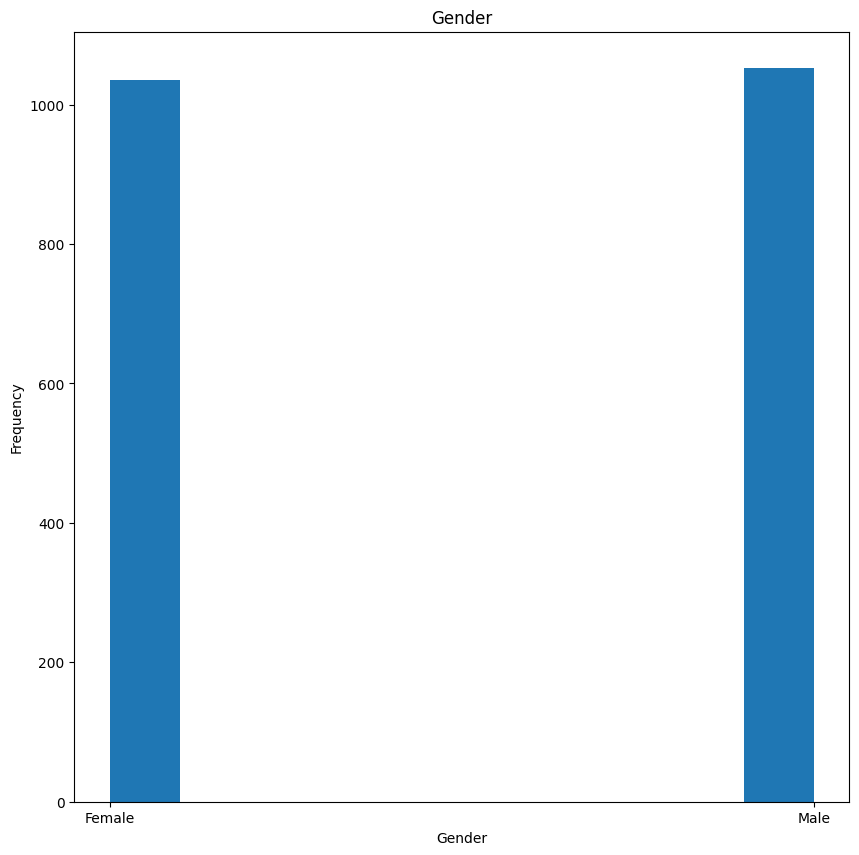

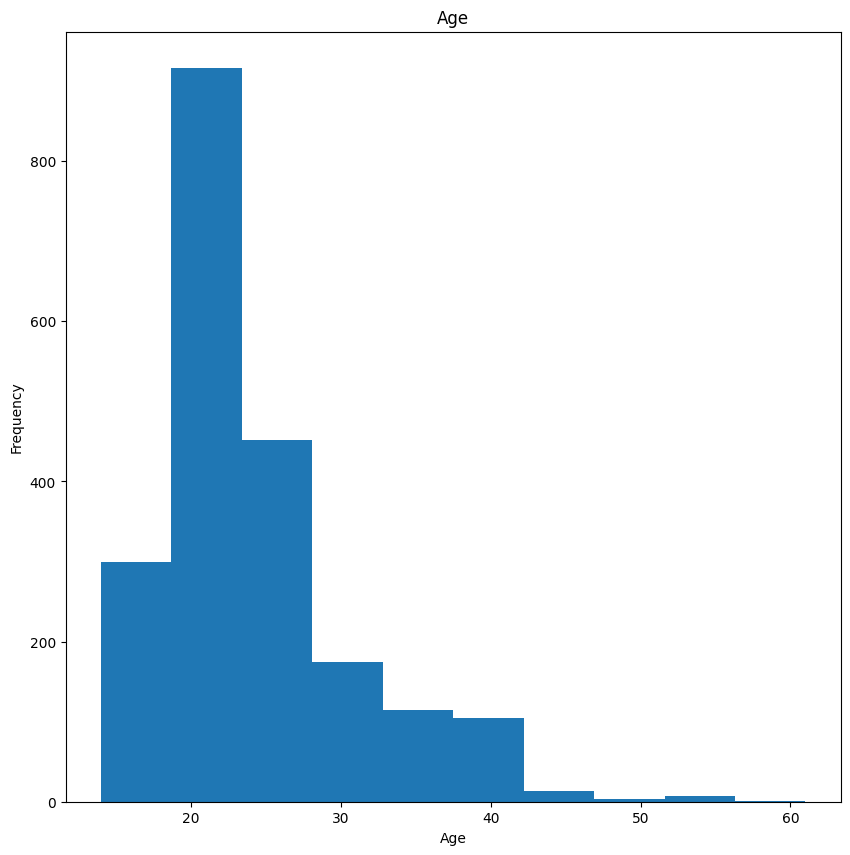

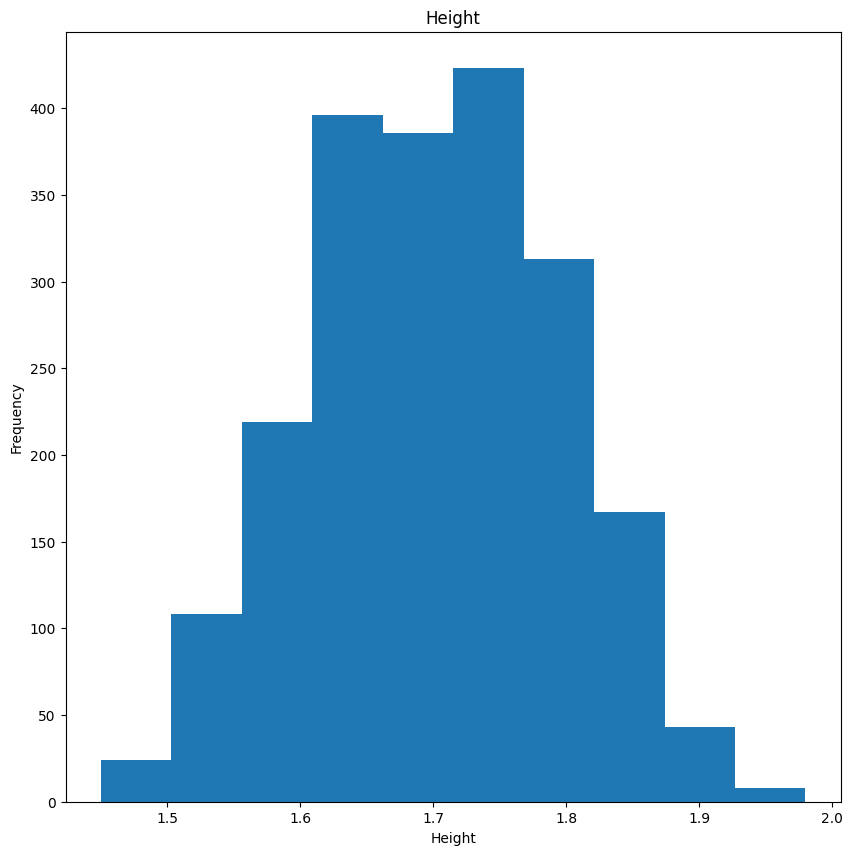

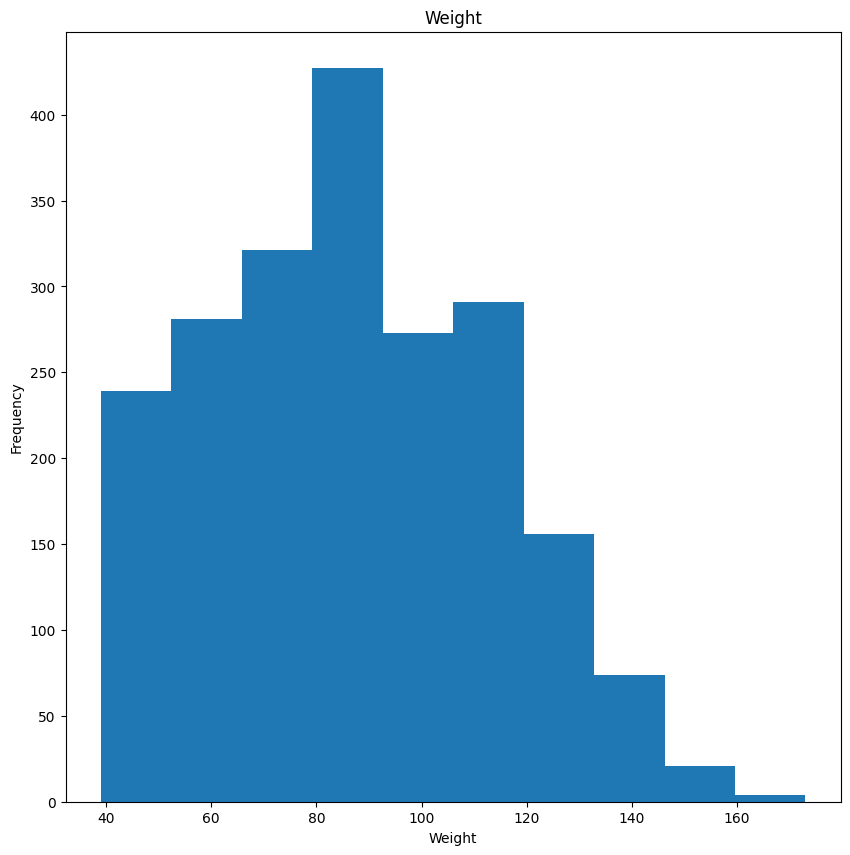

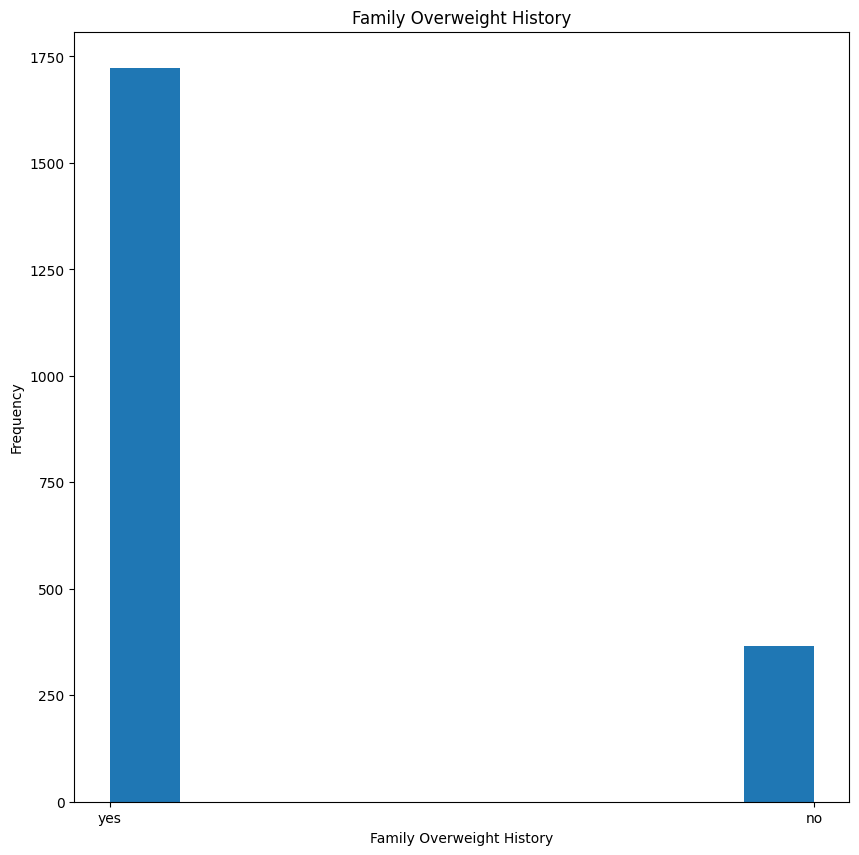

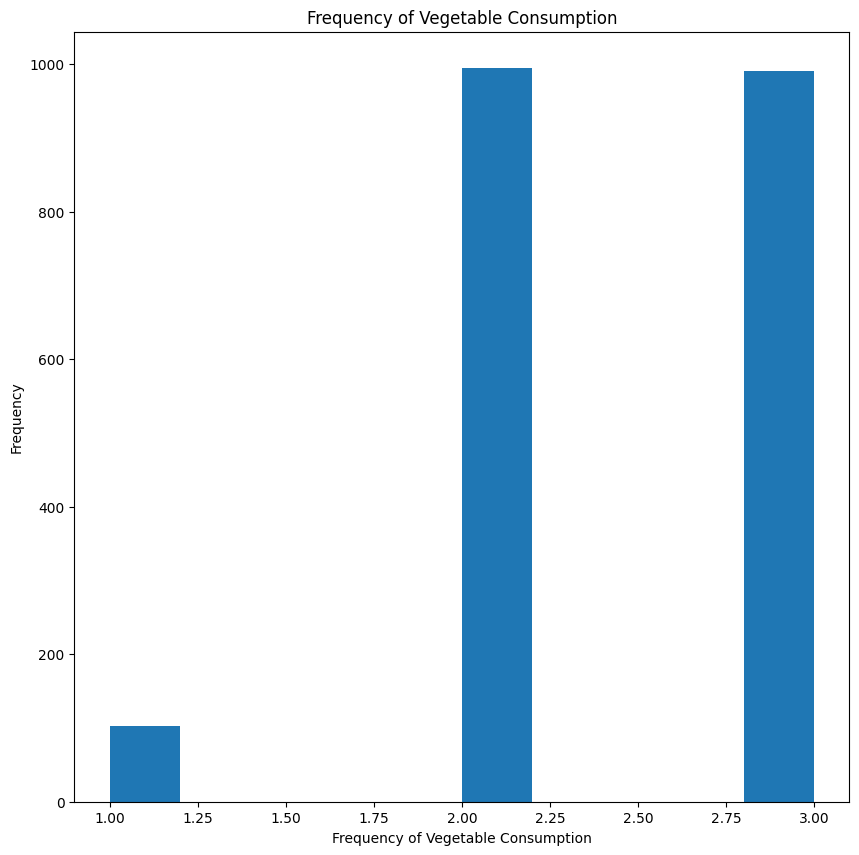

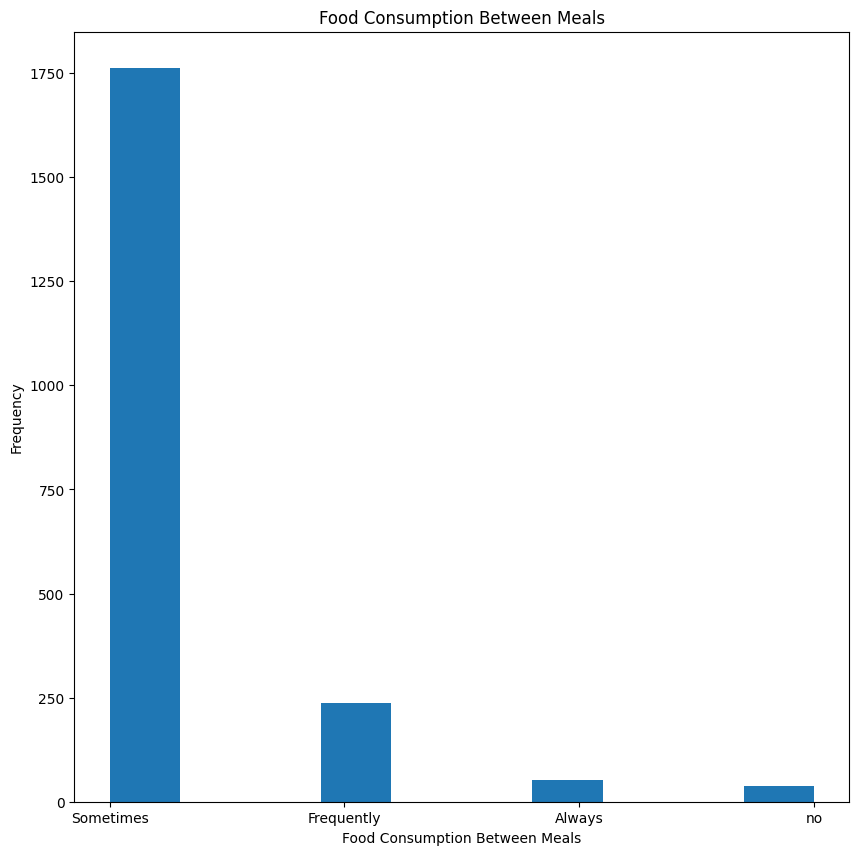

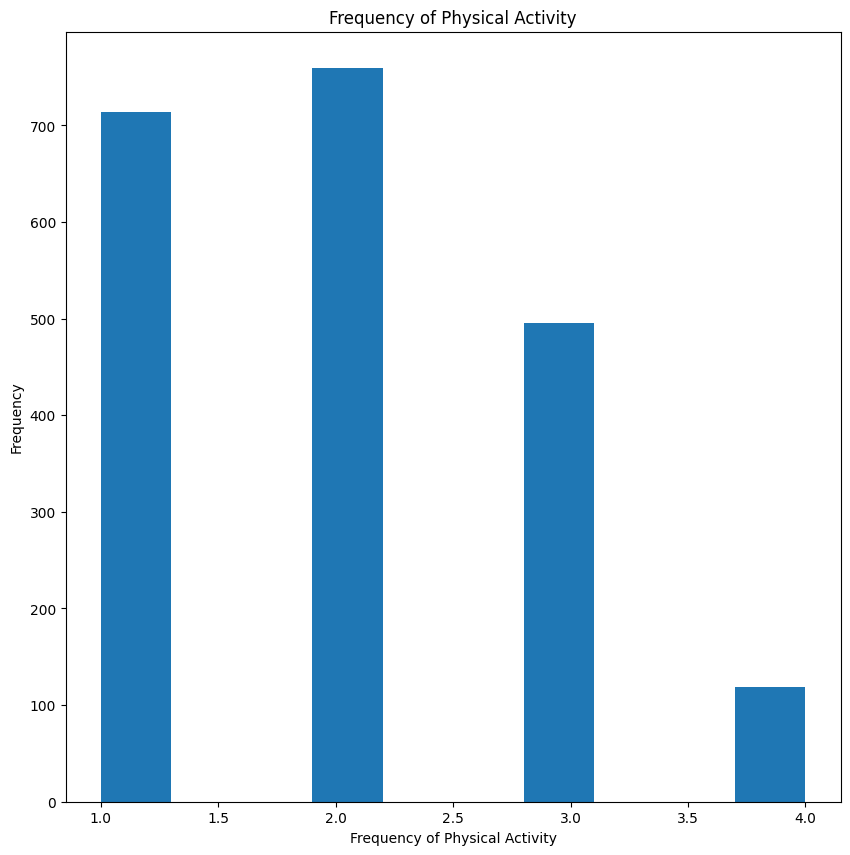

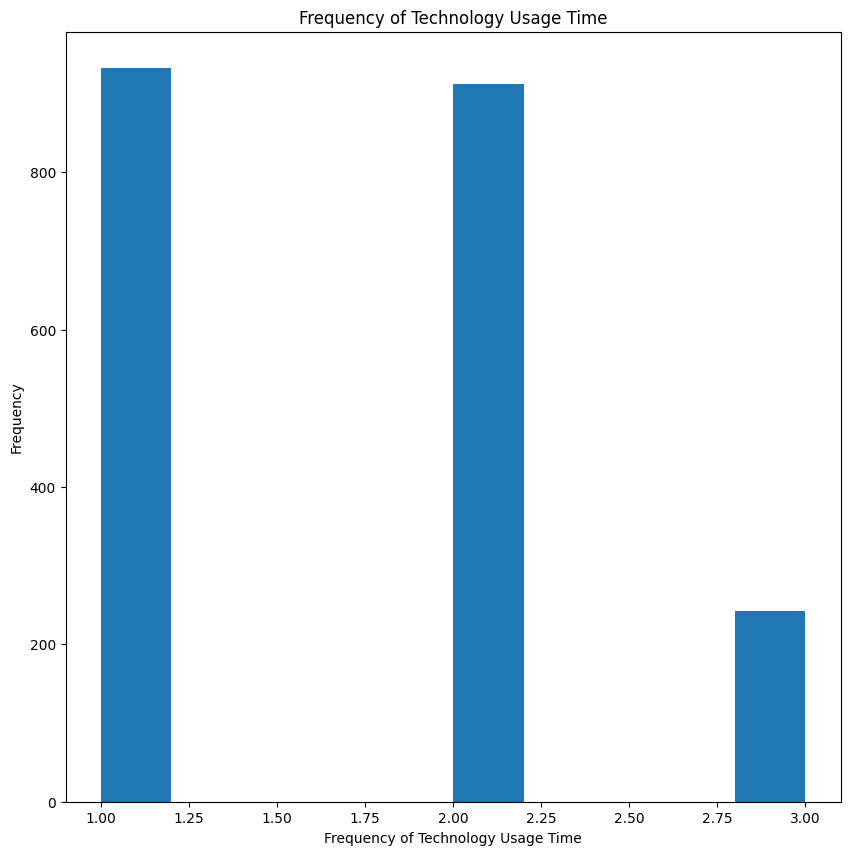

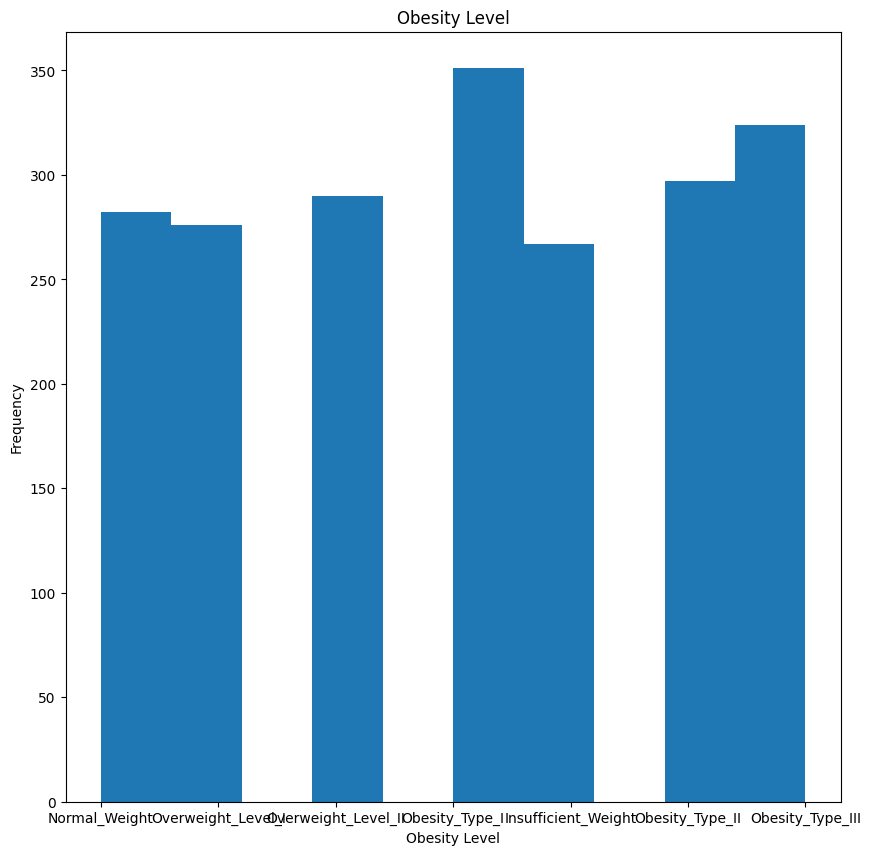

In [ ]:
# Plotting frequency

for i in df:
    plt.figure(figsize = (10, 10))
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title(f"{i}")
    plt.show()

Description and unique values check for the categorical values which needed to be encoded.

In [ ]:
print(df["Gender"].describe())
print(pd.unique(df['Gender']))
print("\n")
print(df["Family Overweight History"].describe())
print(pd.unique(df['Family Overweight History']))
print("\n")
print(df["Frequent High Calory Food Consumption"].describe())
print(pd.unique(df['Frequent High Calory Food Consumption']))
print("\n")
print(df["Food Consumption Between Meals"].describe())
print(pd.unique(df['Food Consumption Between Meals']))
print("\n")
print(df["Smoke"].describe())
print(pd.unique(df['Smoke']))
print("\n")
print(df["Monitor Calorie Consumption"].describe())
print(pd.unique(df['Monitor Calorie Consumption']))
print("\n")
print(df["Consumption of Alcohol"].describe())
print(pd.unique(df['Consumption of Alcohol']))
print("\n")
print(df["Type of Transportation Use"].describe())
print(pd.unique(df['Type of Transportation Use']))
print("\n")
print(df["Obesity Level"].describe())
print(pd.unique(df['Obesity Level']))

count     2087
unique       2
top       Male
freq      1052
Name: Gender, dtype: object
['Female' 'Male']


count     2087
unique       2
top        yes
freq      1722
Name: Family Overweight History, dtype: object
['yes' 'no']


count     2087
unique       2
top        yes
freq      1844
Name: Frequent High Calory Food Consumption, dtype: object
['no' 'yes']


count          2087
unique            4
top       Sometimes
freq           1761
Name: Food Consumption Between Meals, dtype: object
['Sometimes' 'Frequently' 'Always' 'no']


count     2087
unique       2
top         no
freq      2043
Name: Smoke, dtype: object
['no' 'yes']


count     2087
unique       2
top         no
freq      1991
Name: Monitor Calorie Consumption, dtype: object
['no' 'yes']


count          2087
unique            4
top       Sometimes
freq           1380
Name: Consumption of Alcohol, dtype: object
['no' 'Sometimes' 'Frequently' 'Always']


count                      2087
unique                        5
top 

Categorical encoding to the those remaining categorical feature variables

In [ ]:
temp1 = {'Female' : 0, 'Male' : 1}
df["Gender"] = df["Gender"].replace(temp1)

temp2 = {'yes' : 0, 'no' : 1}
df["Family Overweight History"] = df["Family Overweight History"].replace(temp2)
df["Frequent High Calory Food Consumption"] = df["Frequent High Calory Food Consumption"].replace(temp2)
df["Smoke"] = df["Smoke"].replace(temp2)
df["Monitor Calorie Consumption"] = df["Monitor Calorie Consumption"].replace(temp2)

temp3 = {'no' : 1, 'Sometimes' : 2, 'Frequently' : 3, 'Always' : 4}
df["Food Consumption Between Meals"] = df["Food Consumption Between Meals"].replace(temp3)
df["Consumption of Alcohol"] = df["Consumption of Alcohol"].replace(temp3)

temp4 = {'Walking' : 0, 'Public_Transportation' : 1, 'Bike' : 2, 'Motorbike' : 3, 'Automobile' : 4}
df["Type of Transportation Use"] = df["Type of Transportation Use"].replace(temp4)

Label encoding the target variable. Encoder does it in the following manner.
['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III'] = [1, 5, 6, 2, 0, 3, 4]

In [ ]:
label_encoder = process.LabelEncoder()
df["Obesity Level"]= label_encoder.fit_transform(df["Obesity Level"])

Checking the data types again after encoding is done.

In [ ]:
df.dtypes

Gender                                     int64
Age                                        int64
Height                                   float64
Weight                                   float64
Family Overweight History                  int64
Frequent High Calory Food Consumption      int64
Frequency of Vegetable Consumption       float64
Frequency of Main Meals Consumption      float64
Food Consumption Between Meals             int64
Smoke                                      int64
Frequency of Daily Water Consumption     float64
Monitor Calorie Consumption                int64
Frequency of Physical Activity           float64
Frequency of Technology Usage Time       float64
Consumption of Alcohol                     int64
Type of Transportation Use                 int64
Obesity Level                              int64
dtype: object

We see the correlation coeeficient matrix now. (Default: Pearson Correlation Coefficient Matrix)

<Axes: >

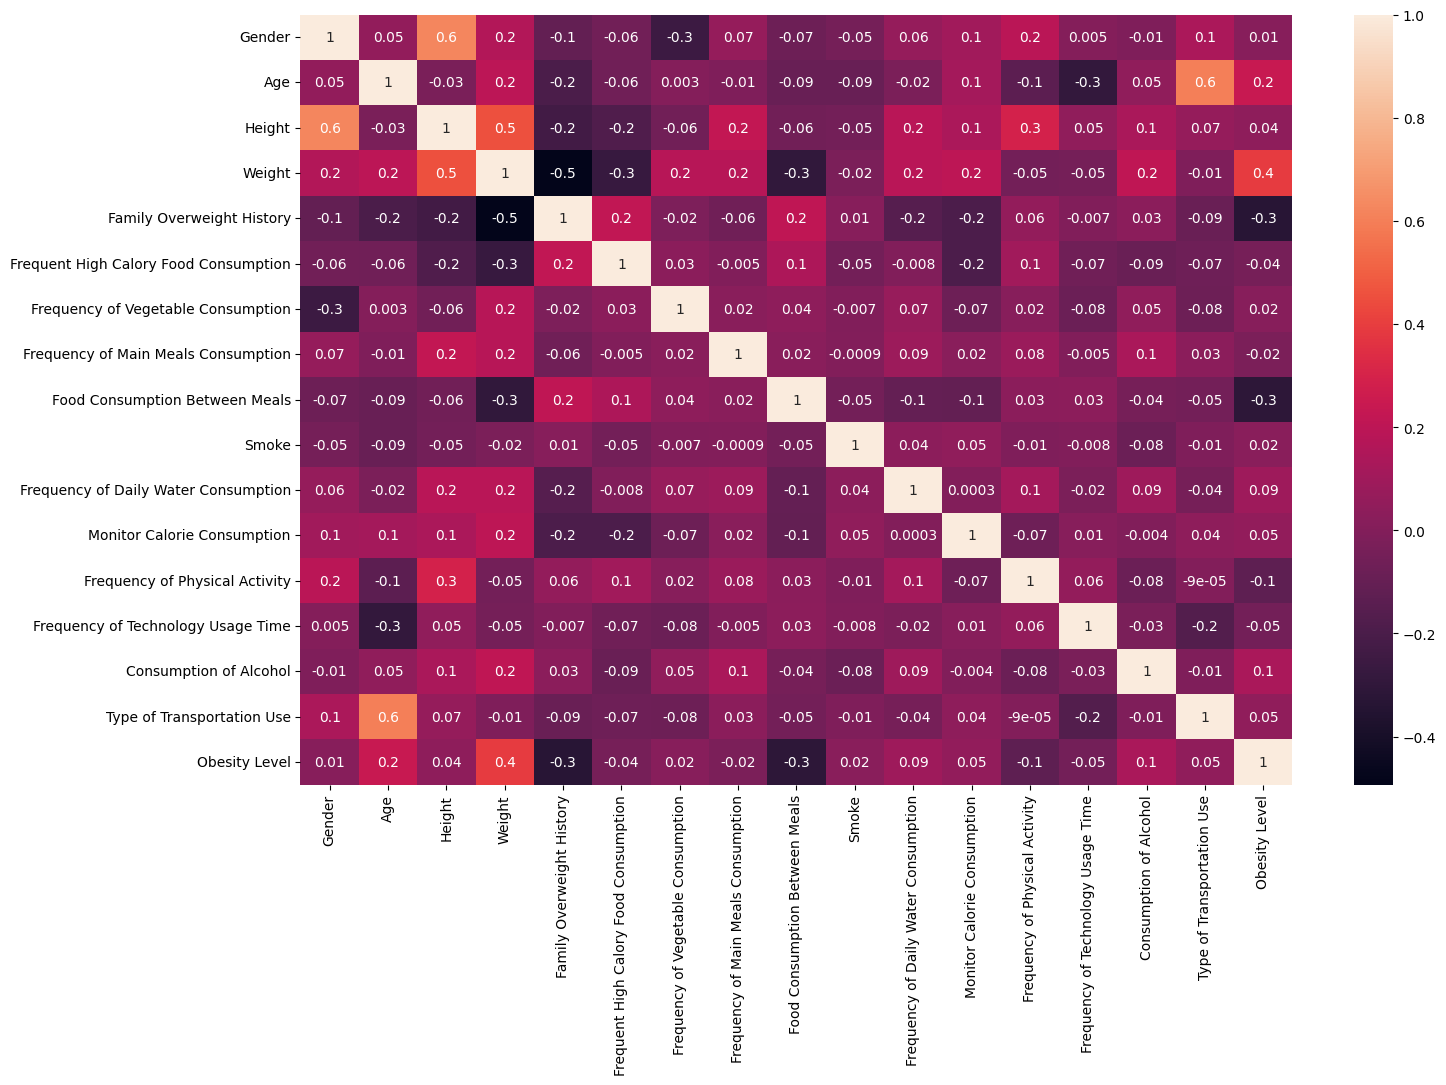

In [ ]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,10))
sb.heatmap(df.corr(method = "pearson"),annot=True, fmt='.1g')

Changing the other data types properly (to categorical data)

In [ ]:
df["Gender"] = df["Gender"].astype("category")
assert df["Gender"].dtype == "category"

df["Family Overweight History"] = df["Family Overweight History"].astype("category")
assert df["Family Overweight History"].dtype == "category"

df["Frequent High Calory Food Consumption"] = df["Frequent High Calory Food Consumption"].astype("category")
assert df["Frequent High Calory Food Consumption"].dtype == "category"

df["Food Consumption Between Meals"] = df["Food Consumption Between Meals"].astype("category")
assert df["Food Consumption Between Meals"].dtype == "category"

df["Smoke"] = df["Smoke"].astype("category")
assert df["Smoke"].dtype == "category"

df["Monitor Calorie Consumption"] = df["Monitor Calorie Consumption"].astype("category")
assert df["Monitor Calorie Consumption"].dtype == "category"

df["Consumption of Alcohol"] = df["Consumption of Alcohol"].astype("category")
assert df["Consumption of Alcohol"].dtype == "category"

df["Type of Transportation Use"] = df["Type of Transportation Use"].astype("category")
assert df["Type of Transportation Use"].dtype == "category"

df["Obesity Level"] = df["Obesity Level"].astype("category")
assert df["Obesity Level"].dtype == "category"

df["Frequency of Vegetable Consumption"] = df["Frequency of Vegetable Consumption"].astype("int")
assert df["Frequency of Vegetable Consumption"].dtype == "int"
df["Frequency of Vegetable Consumption"] = df["Frequency of Vegetable Consumption"].astype("category")
assert df["Frequency of Vegetable Consumption"].dtype == "category"

df["Frequency of Main Meals Consumption"] = df["Frequency of Main Meals Consumption"].astype("int")
assert df["Frequency of Main Meals Consumption"].dtype == "int"
df["Frequency of Main Meals Consumption"] = df["Frequency of Main Meals Consumption"].astype("category")
assert df["Frequency of Main Meals Consumption"].dtype == "category"

df["Frequency of Daily Water Consumption"] = df["Frequency of Daily Water Consumption"].astype("int")
assert df["Frequency of Daily Water Consumption"].dtype == "int"
df["Frequency of Daily Water Consumption"] = df["Frequency of Daily Water Consumption"].astype("category")
assert df["Frequency of Daily Water Consumption"].dtype == "category"

df["Frequency of Physical Activity"] = df["Frequency of Physical Activity"].astype("int")
assert df["Frequency of Physical Activity"].dtype == "int"
df["Frequency of Physical Activity"] = df["Frequency of Physical Activity"].astype("category")
assert df["Frequency of Physical Activity"].dtype == "category"

df["Frequency of Technology Usage Time"] = df["Frequency of Technology Usage Time"].astype("int")
assert df["Frequency of Technology Usage Time"].dtype == "int"
df["Frequency of Technology Usage Time"] = df["Frequency of Technology Usage Time"].astype("category")
assert df["Frequency of Technology Usage Time"].dtype == "category"

Checking the data types again. Everything should be correct now.

In [ ]:
df.dtypes

Gender                                   category
Age                                         int64
Height                                    float64
Weight                                    float64
Family Overweight History                category
Frequent High Calory Food Consumption    category
Frequency of Vegetable Consumption       category
Frequency of Main Meals Consumption      category
Food Consumption Between Meals           category
Smoke                                    category
Frequency of Daily Water Consumption     category
Monitor Calorie Consumption              category
Frequency of Physical Activity           category
Frequency of Technology Usage Time       category
Consumption of Alcohol                   category
Type of Transportation Use               category
Obesity Level                            category
dtype: object

Checking the first 5 instances of our dataframe after encoding is done.

In [ ]:
df.head()

Gender  Age  Height  Weight Family Overweight History  \
0      0   21    1.62    64.0                         0   
1      0   21    1.52    56.0                         0   
2      1   23    1.80    77.0                         0   
3      1   27    1.80    87.0                         1   
4      1   22    1.78    89.8                         1   

  Frequent High Calory Food Consumption Frequency of Vegetable Consumption  \
0                                     1                                  2   
1                                     1                                  3   
2                                     1                                  2   
3                                     1                                  3   
4                                     1                                  2   

  Frequency of Main Meals Consumption Food Consumption Between Meals Smoke  \
0                                   3                              2     1   
1                                   3                              2     0   
2                                   3                              2     1   
3                                   3                              2     1   
4                                   1                              2     1   

  Frequency of Daily Water Consumption Monitor Calorie Consumption  \
0                                    2                           1   
1                                    3                           0   
2                                    2                           1   
3                                    2                           1   
4                                    2                           1   

  Frequency of Physical Activity Frequency of Technology Usage Time  \
0                              1                                  2   
1                              4                                  1   
2                              3                                  2   
3                              3                                  1   
4                              1                                  1   

  Consumption of Alcohol Type of Transportation Use Obesity Level  
0                      1                          1             1  
1                      2                          1             1  
2                      3                          1             1  
3                      3                          0             5  
4                      2                          1             6

Description and unique values check after categorical encoding.

In [ ]:
print(df["Gender"].describe())
print(pd.unique(df['Gender']))
print("\n")
print(df["Family Overweight History"].describe())
print(pd.unique(df['Family Overweight History']))
print("\n")
print(df["Frequent High Calory Food Consumption"].describe())
print(pd.unique(df['Frequent High Calory Food Consumption']))
print("\n")
print(df["Frequency of Vegetable Consumption"].describe())
print(pd.unique(df['Frequency of Vegetable Consumption']))
print("\n")
print(df["Frequency of Main Meals Consumption"].describe())
print(pd.unique(df['Frequency of Main Meals Consumption']))
print("\n")
print(df["Food Consumption Between Meals"].describe())
print(pd.unique(df['Food Consumption Between Meals']))
print("\n")
print(df["Smoke"].describe())
print(pd.unique(df['Smoke']))
print("\n")
print(df["Frequency of Daily Water Consumption"].describe())
print(pd.unique(df['Frequency of Daily Water Consumption']))
print("\n")
print(df["Monitor Calorie Consumption"].describe())
print(pd.unique(df['Monitor Calorie Consumption']))
print("\n")
print(df["Frequency of Physical Activity"].describe())
print(pd.unique(df['Frequency of Physical Activity']))
print("\n")
print(df["Frequency of Technology Usage Time"].describe())
print(pd.unique(df['Frequency of Technology Usage Time']))
print("\n")
print(df["Consumption of Alcohol"].describe())
print(pd.unique(df['Consumption of Alcohol']))
print("\n")
print(df["Type of Transportation Use"].describe())
print(pd.unique(df['Type of Transportation Use']))
print("\n")
print(df["Obesity Level"].describe())
print(pd.unique(df['Obesity Level']))

count     2087
unique       2
top          1
freq      1052
Name: Gender, dtype: int64
[0, 1]
Categories (2, int64): [0, 1]


count     2087
unique       2
top          0
freq      1722
Name: Family Overweight History, dtype: int64
[0, 1]
Categories (2, int64): [0, 1]


count     2087
unique       2
top          0
freq      1844
Name: Frequent High Calory Food Consumption, dtype: int64
[1, 0]
Categories (2, int64): [0, 1]


count     2087
unique       3
top          2
freq       994
Name: Frequency of Vegetable Consumption, dtype: int64
[2, 3, 1]
Categories (3, int64): [1, 2, 3]


count     2087
unique       3
top          3
freq      1615
Name: Frequency of Main Meals Consumption, dtype: int64
[3, 1, 2]
Categories (3, int64): [1, 2, 3]


count     2087
unique       4
top          2
freq      1761
Name: Food Consumption Between Meals, dtype: int64
[2, 3, 4, 1]
Categories (4, int64): [1, 2, 3, 4]


count     2087
unique       2
top          1
freq      2043
Name: Smoke, dtype: int64
[1,

Describe all the variables now again.

In [ ]:
df.describe(include="all")

Gender          Age       Height       Weight  \
count   2087.0  2087.000000  2087.000000  2087.000000   
unique     2.0          NaN          NaN          NaN   
top        1.0          NaN          NaN          NaN   
freq    1052.0          NaN          NaN          NaN   
mean       NaN    24.356493     1.702674    86.858730   
std        NaN     6.379977     0.093186    26.190847   
min        NaN    14.000000     1.450000    39.000000   
25%        NaN    20.000000     1.630178    66.000000   
50%        NaN    23.000000     1.701584    83.101100   
75%        NaN    26.000000     1.769491   108.015907   
max        NaN    61.000000     1.980000   173.000000   

        Family Overweight History  Frequent High Calory Food Consumption  \
count                      2087.0                                 2087.0   
unique                        2.0                                    2.0   
top                           0.0                                    0.0   
freq                       1722.0                                 1844.0   
mean                          NaN                                    NaN   
std                           NaN                                    NaN   
min                           NaN                                    NaN   
25%                           NaN                                    NaN   
50%                           NaN                                    NaN   
75%                           NaN                                    NaN   
max                           NaN                                    NaN   

        Frequency of Vegetable Consumption  \
count                               2087.0   
unique                                 3.0   
top                                    2.0   
freq                                 994.0   
mean                                   NaN   
std                                    NaN   
min                                    NaN   
25%                                    NaN   
50%                                    NaN   
75%                                    NaN   
max                                    NaN   

        Frequency of Main Meals Consumption  Food Consumption Between Meals  \
count                                2087.0                          2087.0   
unique                                  3.0                             4.0   
top                                     3.0                             2.0   
freq                                 1615.0                          1761.0   
mean                                    NaN                             NaN   
std                                     NaN                             NaN   
min                                     NaN                             NaN   
25%                                     NaN                             NaN   
50%                                     NaN                             NaN   
75%                                     NaN                             NaN   
max                                     NaN                             NaN   

         Smoke  Frequency of Daily Water Consumption  \
count   2087.0                                2087.0   
unique     2.0                                   3.0   
top        1.0                                   2.0   
freq    2043.0                                1107.0   
mean       NaN                                   NaN   
std        NaN                                   NaN   
min        NaN                                   NaN   
25%        NaN                                   NaN   
50%        NaN                                   NaN   
75%        NaN                                   NaN   
max        NaN                                   NaN   

        Monitor Calorie Consumption  Frequency of Physical Activity  \
count                        2087.0                          2087.0   
unique                          2.0                             4.0   
top                   

Making a copy of the dataframe and scaling it with MinMax Scaler.

In [ ]:
df_scaled = df.copy()

scaler = process.MinMaxScaler()
df_scaled[["Age", "Height", "Weight"]] = scaler.fit_transform(df_scaled[["Age", "Height", "Weight"]])

df_scaled

Gender       Age    Height    Weight Family Overweight History  \
0         0  0.148936  0.320755  0.186567                         0   
1         0  0.148936  0.132075  0.126866                         0   
2         1  0.191489  0.660377  0.283582                         0   
3         1  0.276596  0.660377  0.358209                         1   
4         1  0.170213  0.622642  0.379104                         1   
...     ...       ...       ...       ...                       ...   
2106      0  0.148936  0.491943  0.689616                         0   
2107      0  0.170213  0.563366  0.707037                         0   
2108      0  0.191489  0.570200  0.706637                         0   
2109      0  0.212766  0.546132  0.704079                         0   
2110      0  0.212766  0.544974  0.705020                         0   

     Frequent High Calory Food Consumption Frequency of Vegetable Consumption  \
0                                        1                                  2   
1                                        1                                  3   
2                                        1                                  2   
3                                        1                                  3   
4                                        1                                  2   
...                                    ...                                ...   
2106                                     0                                  3   
2107                                     0                                  3   
2108                                     0                                  3   
2109                                     0                                  3   
2110                                     0                                  3   

     Frequency of Main Meals Consumption Food Consumption Between Meals Smoke  \
0                                      3                              2     1   
1                                      3                              2     0   
2                                      3                              2     1   
3                                      3                              2     1   
4                                      1                              2     1   
...                                  ...                            ...   ...   
2106                                   3                              2     1   
2107                                   3                              2     1   
2108                                   3                              2     1   
2109                                   3                              2     1   
2110                                   3                              2     1   

     Frequency of Daily Water Consumption Monitor Calorie Consumption  \
0                                       2                           1   
1                                       3                           0   
2                                       2                           1   
3                                       2                           1   
4                                       2                           1   
...                                   ...                         ...   
2106                                    2                           1   
2107                                    2                           1   
2108                                    2                           1   
2109                                    3                           1   
2110                                    3                           1   

     Frequency of Physical Activity Frequency of Technology Usage Time  \
0                                 1                                  2   
1                                 4                                  1   
2                                 3                                  2   
3                                

In [ ]:
plt.figure(figsize = (20, 15))

plt.subplot(3,2,1)
sb.countplot(x = 'Obesity Level', hue= 'Gender', palette='Set2', data = df)

plt.subplot(3,2,2)
sb.countplot(x = 'Obesity Level', hue= 'Family Overweight History', palette='Set2', data = df_scaled)

plt.subplot(3,2,3)
sb.countplot(x = 'Obesity Level', hue= 'Smoke', palette='Set2', data = df_scaled)

plt.subplot(3,2,4)
sb.countplot(x = 'Obesity Level', hue= 'Consumption of Alcohol', palette='Set2', data = df_scaled)

plt.subplot(3,2,5)
sb.countplot(x = 'Obesity Level', hue= 'Type of Transportation Use', palette='Set2', data = df_scaled)

plt.subplot(3,2,6)
sb.countplot(x = 'Obesity Level', hue= 'Frequent High Calory Food Consumption', palette='Set2', data = df_scaled)

<Axes: xlabel='Obesity Level', ylabel='count'>

Setting target and possible feature variables and splitting dataset into train and test split. (70:30)

In [ ]:
target = df_scaled[['Obesity Level']]
possible_features = df_scaled[['Gender', 'Age', 'Height', 'Weight', 'Family Overweight History', 'Frequent High Calory Food Consumption', 'Frequency of Vegetable Consumption', 'Frequency of Main Meals Consumption', 'Food Consumption Between Meals', 'Smoke', 'Frequency of Daily Water Consumption', 'Monitor Calorie Consumption', 'Frequency of Physical Activity', 'Frequency of Technology Usage Time', 'Consumption of Alcohol', 'Type of Transportation Use']]

x = possible_features
y = target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0, stratify = y)

print(x_train.shape)
print(y_train.shape)
print("\n")
print(x_test.shape)
print(y_test.shape)


target_labels = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


(1460, 16)
(1460, 1)


(627, 16)
(627, 1)


In [ ]:
x_train.to_csv('x_train.csv', encoding = 'utf-8-sig')
files.download('x_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_train.to_csv('y_train.csv', encoding = 'utf-8-sig')
files.download('y_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_test.to_csv('x_test.csv', encoding = 'utf-8-sig')
files.download('x_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_test.to_csv('y_test.csv', encoding = 'utf-8-sig')
files.download('y_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#PRE PROCESSING ENDS HERE

#Decision Tree Classifier (Including Weight)

Test Accuracy Score:  0.9234449760765551
Test Precision Score:  0.9238245311179518
Test Recall Score:  0.9234449760765551
Test F1 Score:  0.9224995421324033


                     precision    recall  f1-score   support

Insufficient_Weight       0.89      1.00      0.94        80
      Normal_Weight       0.88      0.80      0.84        85
     Obesity_Type_I       0.96      0.89      0.92       106
    Obesity_Type_II       0.93      1.00      0.96        89
   Obesity_Type_III       1.00      1.00      1.00        97
 Overweight_Level_I       0.88      0.87      0.87        83
Overweight_Level_II       0.91      0.91      0.91        87

           accuracy                           0.92       627
          macro avg       0.92      0.92      0.92       627
       weighted avg       0.92      0.92      0.92       627





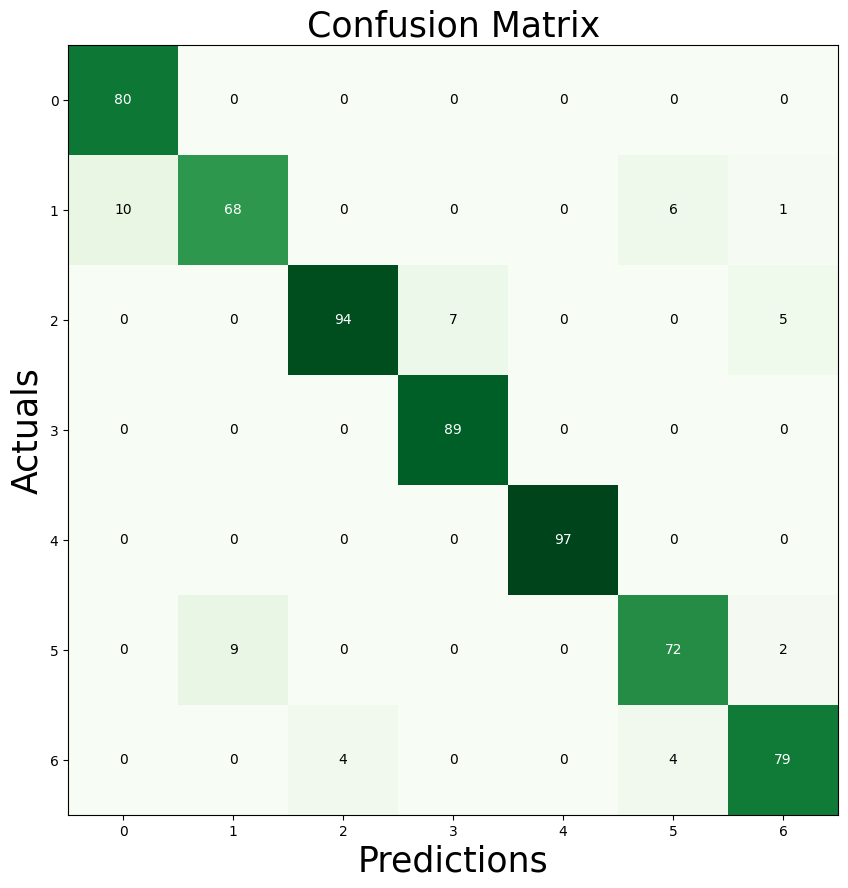

In [ ]:
#applying Decision Tree Classification

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

#working on test data
decision_tree_test_predict = decision_tree_model.predict(x_test)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_predict)
decision_tree_test_precision = precision_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_recall = recall_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_f1 = f1_score(y_test, decision_tree_test_predict, average = "weighted")

print("Test Accuracy Score: ",decision_tree_test_accuracy)
print("Test Precision Score: ",decision_tree_test_precision)
print("Test Recall Score: ",decision_tree_test_recall)
print("Test F1 Score: ",decision_tree_test_f1)
print("\n")

print(classification_report(y_test, decision_tree_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = decision_tree_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Hyperparameter Tuning (Decision Tree)

In [ ]:
#hyperparameter tuning (Decision Tree)

decision_params = [{'criterion': ["gini", "entropy", "log_loss"], 'max_depth': list(range(0, 15))}]

clf = GridSearchCV(decision_tree_model, decision_params, cv = 10, scoring='accuracy')

clf.fit(x_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'criterion': 'log_loss', 'max_depth': 14}
0.945890410958904


Applying the Best Fitted Model (Decision Tree)

Test Accuracy Score:  0.9425837320574163
Test Precision Score:  0.9430685181689039
Test Recall Score:  0.9425837320574163
Test F1 Score:  0.9422497646312583


                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.99      0.96        80
      Normal_Weight       0.90      0.89      0.90        85
     Obesity_Type_I       0.98      0.91      0.94       106
    Obesity_Type_II       0.94      1.00      0.97        89
   Obesity_Type_III       0.97      1.00      0.98        97
 Overweight_Level_I       0.89      0.89      0.89        83
Overweight_Level_II       0.96      0.92      0.94        87

           accuracy                           0.94       627
          macro avg       0.94      0.94      0.94       627
       weighted avg       0.94      0.94      0.94       627





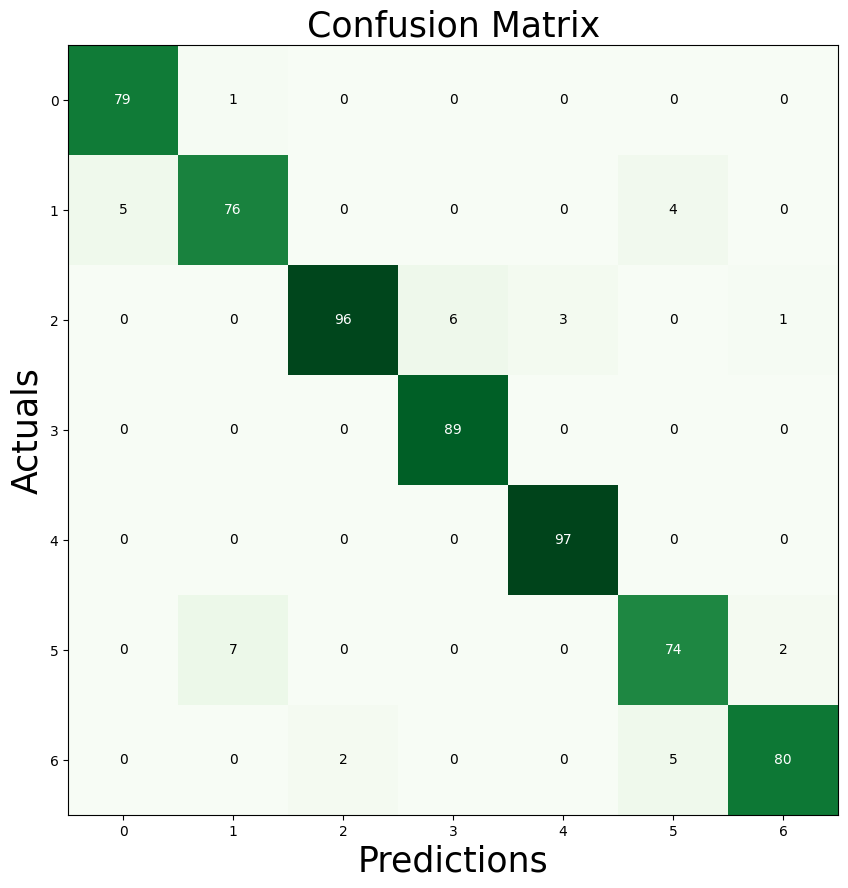

In [ ]:
#applying the best fitted hyperparameters (Decision Tree Model)

decision_tree_model = DecisionTreeClassifier(criterion = 'log_loss', max_depth = 14)
decision_tree_model.fit(x_train, y_train)

#working on test data
decision_tree_test_predict = decision_tree_model.predict(x_test)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_predict)
decision_tree_test_precision = precision_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_recall = recall_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_f1 = f1_score(y_test, decision_tree_test_predict, average = "weighted")

print("Test Accuracy Score: ",decision_tree_test_accuracy)
print("Test Precision Score: ",decision_tree_test_precision)
print("Test Recall Score: ",decision_tree_test_recall)
print("Test F1 Score: ",decision_tree_test_f1)
print("\n")

print(classification_report(y_test, decision_tree_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = decision_tree_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

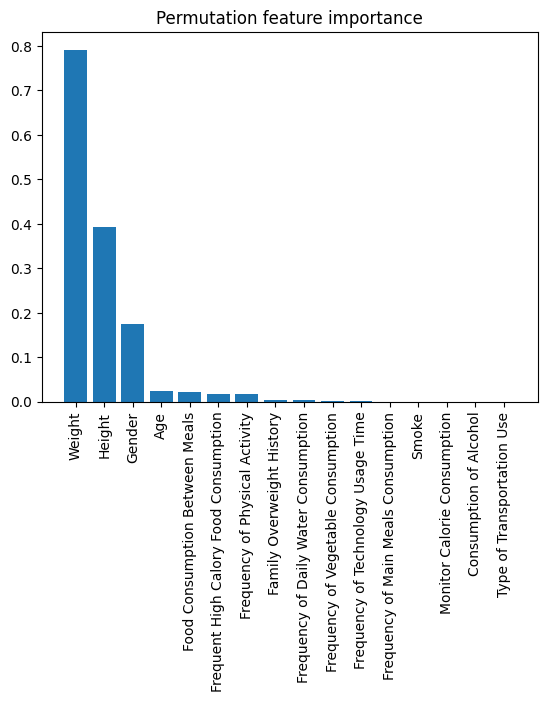

In [ ]:
idx = x_train.columns
pimp = permutation_importance(decision_tree_model, x_train, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

#Random Forest Classifier (Including Weight)

Test Accuracy Score:  0.9362041467304625
Test Precision Score:  0.9368304546746635
Test Recall Score:  0.9362041467304625
Test F1 Score:  0.9364379346158328


                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.95      0.94        80
      Normal_Weight       0.81      0.84      0.82        85
     Obesity_Type_I       0.99      0.97      0.98       106
    Obesity_Type_II       0.99      1.00      0.99        89
   Obesity_Type_III       1.00      1.00      1.00        97
 Overweight_Level_I       0.85      0.84      0.85        83
Overweight_Level_II       0.95      0.93      0.94        87

           accuracy                           0.94       627
          macro avg       0.93      0.93      0.93       627
       weighted avg       0.94      0.94      0.94       627





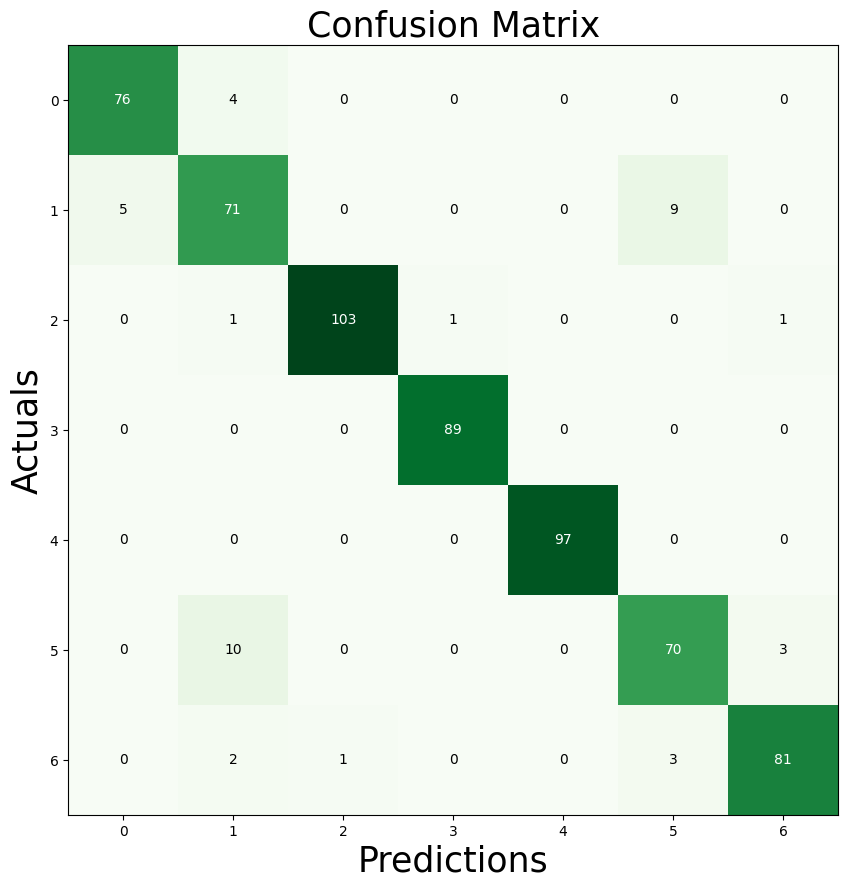

In [ ]:
#applying Random Forest Classification

random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train.values.ravel())

#working on test data (MinMax Scaled)
random_forest_test_predict = random_forest_model.predict(x_test)
random_forest_test_accuracy = accuracy_score(y_test, random_forest_test_predict)
random_forest_test_precision = precision_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_recall = recall_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_f1 = f1_score(y_test, random_forest_test_predict, average = "weighted")

print("Test Accuracy Score: ",random_forest_test_accuracy)
print("Test Precision Score: ",random_forest_test_precision)
print("Test Recall Score: ",random_forest_test_recall)
print("Test F1 Score: ",random_forest_test_f1)
print("\n")

print(classification_report(y_test, random_forest_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases (instances)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = random_forest_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Hyperparameter tuning (Random Forest)

In [ ]:
#hyperparameter tuning (Random Forest)

forest_params = [{'criterion': ["gini", "entropy", "log_loss"], 'max_depth': list(range(0, 15))}]

clf = GridSearchCV(random_forest_model, forest_params, cv = 10, scoring='accuracy')

clf.fit(x_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'criterion': 'entropy', 'max_depth': 11}
0.9486301369863014


Applying the best fitted Model (Random Forest Model)

Test Accuracy Score:  0.9553429027113237
Test Precision Score:  0.9554001376220906
Test Recall Score:  0.9553429027113237
Test F1 Score:  0.9552530052131547


                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.97      0.97        80
      Normal_Weight       0.86      0.89      0.88        85
     Obesity_Type_I       1.00      0.99      1.00       106
    Obesity_Type_II       1.00      1.00      1.00        89
   Obesity_Type_III       1.00      1.00      1.00        97
 Overweight_Level_I       0.89      0.84      0.86        83
Overweight_Level_II       0.95      0.97      0.96        87

           accuracy                           0.96       627
          macro avg       0.95      0.95      0.95       627
       weighted avg       0.96      0.96      0.96       627





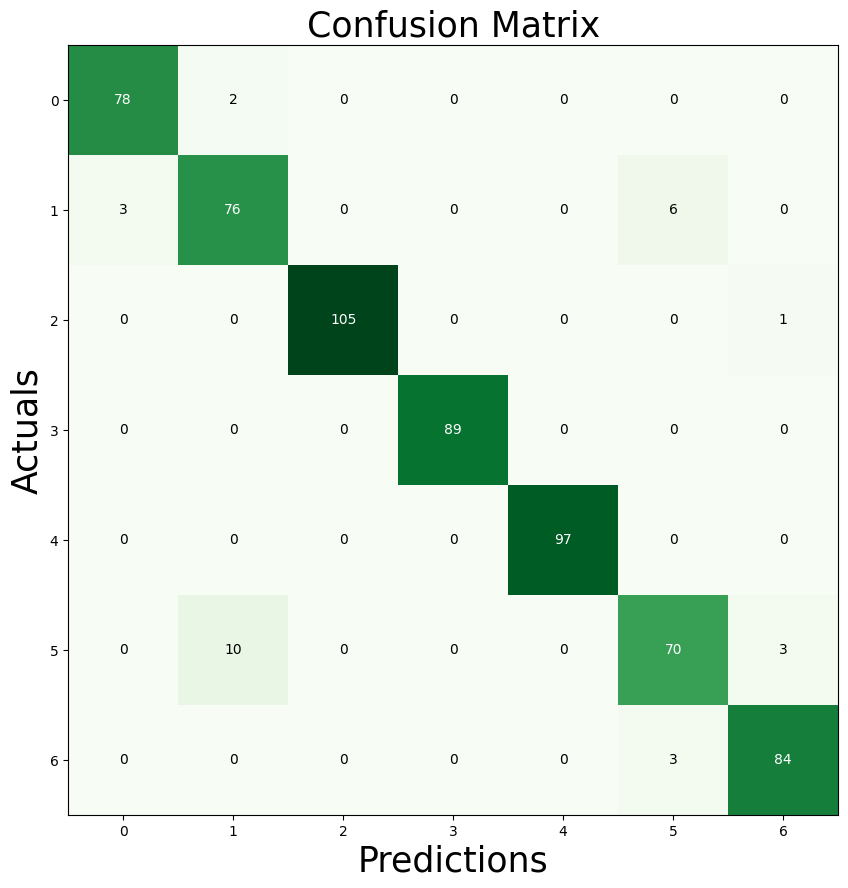

In [ ]:
#applying the best fitted hyperparameters (Random Forest Model)

random_forest_model = RandomForestClassifier(criterion = 'log_loss', max_depth = 13)
random_forest_model.fit(x_train, y_train.values.ravel())

#working on test data
random_forest_test_predict = random_forest_model.predict(x_test)
random_forest_test_accuracy = accuracy_score(y_test, random_forest_test_predict)
random_forest_test_precision = precision_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_recall = recall_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_f1 = f1_score(y_test, random_forest_test_predict, average = "weighted")

print("Test Accuracy Score: ",random_forest_test_accuracy)
print("Test Precision Score: ",random_forest_test_precision)
print("Test Recall Score: ",random_forest_test_recall)
print("Test F1 Score: ",random_forest_test_f1)
print("\n")

print(classification_report(y_test, random_forest_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases (instances)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = random_forest_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

In [ ]:
idx = x_train.columns
pimp = permutation_importance(random_forest_model, x_train, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

#Support Vector Classifier (Including Weight)

In [ ]:
#applying Support Vector Classification

svc_model = SVC()
svc_model.fit(x_train, y_train.values.ravel())

#working on test data
svc_test_predict = svc_model.predict(x_test)
svc_test_accuracy = accuracy_score(y_test, svc_test_predict)
svc_test_precision = precision_score(y_test, svc_test_predict, average = "weighted")
svc_test_recall = recall_score(y_test, svc_test_predict, average = "weighted")
svc_test_f1 = f1_score(y_test, svc_test_predict, average = "weighted")

print("Test Accuracy Score: ",svc_test_accuracy)
print("Test Precision Score: ",svc_test_precision)
print("Test Recall Score: ",svc_test_recall)
print("Test F1 Score: ",svc_test_f1)
print("\n")

print(classification_report(y_test, svc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = svc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.6746411483253588
Test Precision Score:  0.6700502109101506
Test Recall Score:  0.6746411483253588
Test F1 Score:  0.6517683854777283


                     precision    recall  f1-score   support

Insufficient_Weight       0.67      0.81      0.73        80
      Normal_Weight       0.73      0.47      0.57        85
     Obesity_Type_I       0.58      0.75      0.65       106
    Obesity_Type_II       0.63      0.98      0.77        89
   Obesity_Type_III       0.95      1.00      0.97        97
 Overweight_Level_I       0.55      0.29      0.38        83
Overweight_Level_II       0.57      0.36      0.44        87

           accuracy                           0.67       627
          macro avg       0.67      0.66      0.65       627
       weighted avg       0.67      0.67      0.65       627





Hyperparameter tuning (Support Vector)

In [ ]:
#hyperparameter tuning (Support Vector)

svc_params = [{'kernel': ["linear", "poly", "rbf", "sigmoid"], 'degree': list(range(0, 10)), 'gamma': ["scale", "auto"]}]

clf = GridSearchCV(svc_model, svc_params, cv = 10, scoring='accuracy')

clf.fit(x_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}
0.8767123287671232


Applying the best fitted Model (Support Vector)

In [ ]:
#applying the best fitted hyperparameters (Support Vector Model)

svc_model = SVC(degree = 5, gamma = 'auto', kernel = 'poly')
svc_model.fit(x_train, y_train.values.ravel())

#working on test data
svc_test_predict = svc_model.predict(x_test)
svc_test_accuracy = accuracy_score(y_test, svc_test_predict)
svc_test_precision = precision_score(y_test, svc_test_predict, average = "weighted")
svc_test_recall = recall_score(y_test, svc_test_predict, average = "weighted")
svc_test_f1 = f1_score(y_test, svc_test_predict, average = "weighted")

print("Test Accuracy Score: ",svc_test_accuracy)
print("Test Precision Score: ",svc_test_precision)
print("Test Recall Score: ",svc_test_recall)
print("Test F1 Score: ",svc_test_f1)
print("\n")

print(classification_report(y_test, svc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = svc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.9027113237639554
Test Precision Score:  0.9000769246992569
Test Recall Score:  0.9027113237639554
Test F1 Score:  0.9005826763075415


                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.97      0.92        80
      Normal_Weight       0.78      0.73      0.75        85
     Obesity_Type_I       0.95      0.99      0.97       106
    Obesity_Type_II       1.00      1.00      1.00        89
   Obesity_Type_III       1.00      1.00      1.00        97
 Overweight_Level_I       0.78      0.70      0.74        83
Overweight_Level_II       0.88      0.89      0.88        87

           accuracy                           0.90       627
          macro avg       0.89      0.90      0.90       627
       weighted avg       0.90      0.90      0.90       627





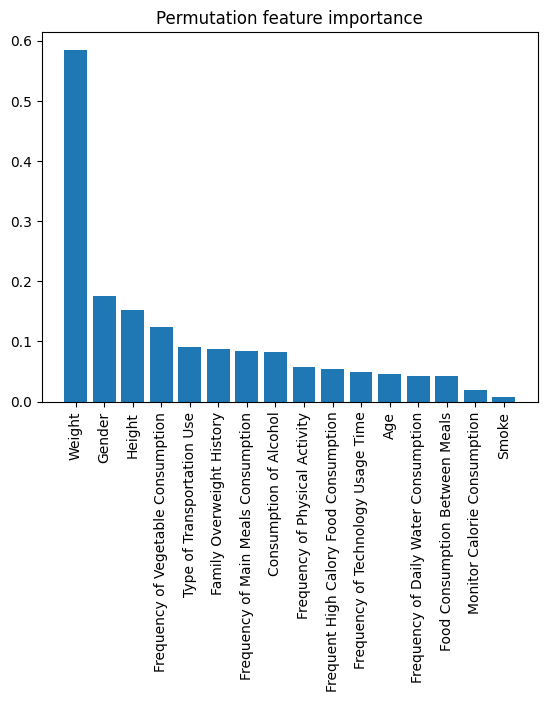

In [ ]:
idx = x_train.columns
pimp = permutation_importance(svc_model, x_train, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

#K Nearest Neighbour Classifier (Including Weight)

Test Accuracy Score:  0.7543859649122807
Test Precision Score:  0.742880539996452
Test Recall Score:  0.7543859649122807
Test F1 Score:  0.7414547169909772


                     precision    recall  f1-score   support

Insufficient_Weight       0.72      0.89      0.80        80
      Normal_Weight       0.62      0.39      0.48        85
     Obesity_Type_I       0.74      0.86      0.79       106
    Obesity_Type_II       0.82      0.96      0.88        89
   Obesity_Type_III       0.96      1.00      0.98        97
 Overweight_Level_I       0.60      0.54      0.57        83
Overweight_Level_II       0.70      0.59      0.64        87

           accuracy                           0.75       627
          macro avg       0.74      0.75      0.73       627
       weighted avg       0.74      0.75      0.74       627





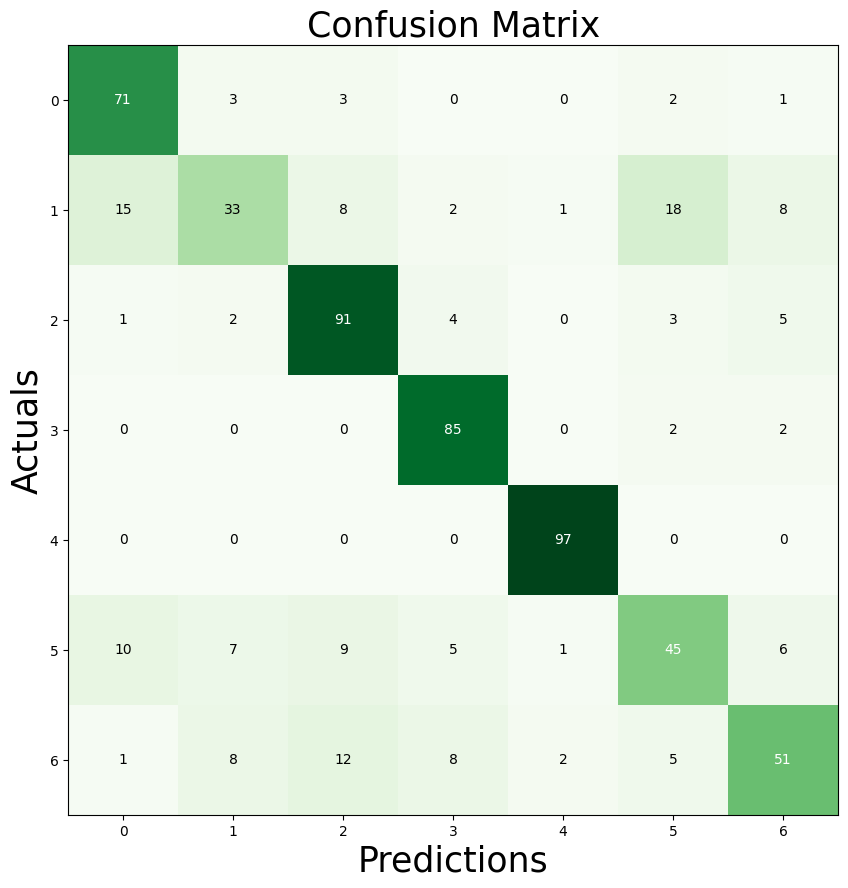

In [ ]:
#applying K Nearest Neighbour Classification

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train.values.ravel())

#working on test data
knn_test_predict = knn_model.predict(x_test)
knn_test_accuracy = accuracy_score(y_test, knn_test_predict)
knn_test_precision = precision_score(y_test, knn_test_predict, average = "weighted")
knn_test_recall = recall_score(y_test, knn_test_predict, average = "weighted")
knn_test_f1 = f1_score(y_test, knn_test_predict, average = "weighted")

print("Test Accuracy Score: ",knn_test_accuracy)
print("Test Precision Score: ",knn_test_precision)
print("Test Recall Score: ",knn_test_recall)
print("Test F1 Score: ",knn_test_f1)
print("\n")

print(classification_report(y_test, knn_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = knn_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Hyperparameter Tuning (K Nearest Neighbour)

In [ ]:
#hyperparameter tuning (K Nearest Neighbour)

knn_params = [{'metric': ["cosine", "euclidean", "manhattan"], 'n_neighbors': list(range(0, 10)), 'weights': ["uniform", "distance"]}]

clf = GridSearchCV(knn_model, knn_params, cv = 10, scoring='accuracy')

clf.fit(x_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.7821917808219176


Applying the best fitted Model (K Nearest Neighbour Model)

Test Accuracy Score:  0.8038277511961722
Test Precision Score:  0.7983470926526072
Test Recall Score:  0.8038277511961722
Test F1 Score:  0.7986160145494479


                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.90      0.85        80
      Normal_Weight       0.70      0.53      0.60        85
     Obesity_Type_I       0.80      0.84      0.82       106
    Obesity_Type_II       0.89      0.96      0.92        89
   Obesity_Type_III       0.97      1.00      0.98        97
 Overweight_Level_I       0.71      0.66      0.69        83
Overweight_Level_II       0.69      0.70      0.69        87

           accuracy                           0.80       627
          macro avg       0.79      0.80      0.79       627
       weighted avg       0.80      0.80      0.80       627





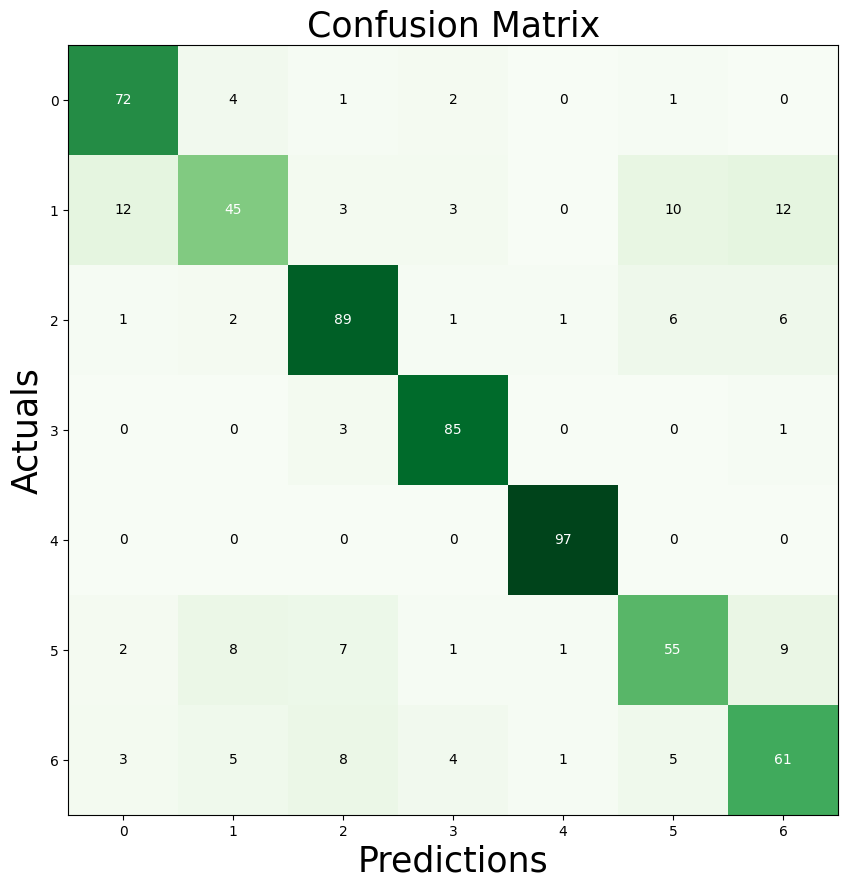

In [ ]:
#applying the best fitted hyperparameters (K Nearest Neighbour Model)

knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1, weights = 'uniform')
knn_model.fit(x_train, y_train.values.ravel())

#working on test data
knn_test_predict = knn_model.predict(x_test)
knn_test_accuracy = accuracy_score(y_test, knn_test_predict)
knn_test_precision = precision_score(y_test, knn_test_predict, average = "weighted")
knn_test_recall = recall_score(y_test, knn_test_predict, average = "weighted")
knn_test_f1 = f1_score(y_test, knn_test_predict, average = "weighted")

print("Test Accuracy Score: ",knn_test_accuracy)
print("Test Precision Score: ",knn_test_precision)
print("Test Recall Score: ",knn_test_recall)
print("Test F1 Score: ",knn_test_f1)
print("\n")

print(classification_report(y_test, knn_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = knn_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

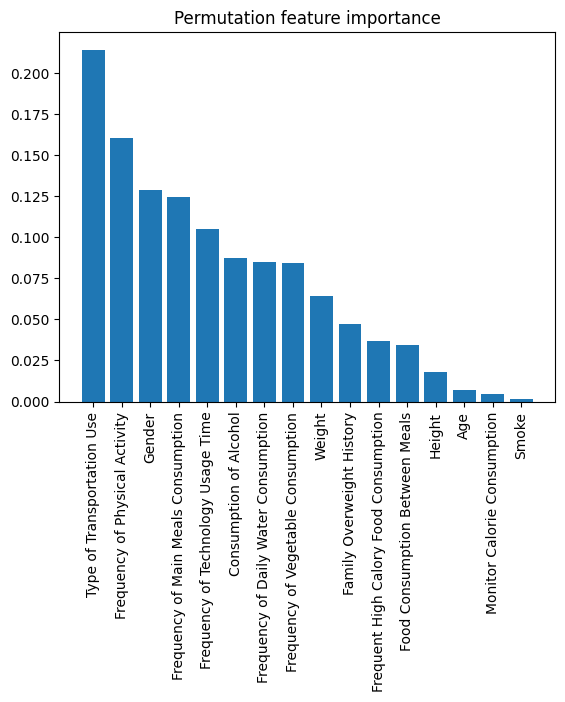

In [ ]:
idx = x_train.columns
pimp = permutation_importance(knn_model, x_train, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

#Ada Boost Classifier (Including Weight)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Test Accuracy Score:  0.26953748006379585
Test Precision Score:  0.3602826357869862
Test Recall Score:  0.26953748006379585
Test F1 Score:  0.20922928820575554


                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.03      0.05        80
      Normal_Weight       0.36      0.64      0.46        85
     Obesity_Type_I       0.12      0.22      0.16       106
    Obesity_Type_II       0.62      0.15      0.24        89
   Obesity_Type_III       0.00      0.00      0.00        97
 Overweight_Level_I       0.30      0.80      0.43        83
Overweight_Level_II       0.26      0.13      0.17        87

           accuracy                           0.27       627
          macro avg       0.38      0.28      0.21       627
       weighted avg       0.36      0.27      0.21       627





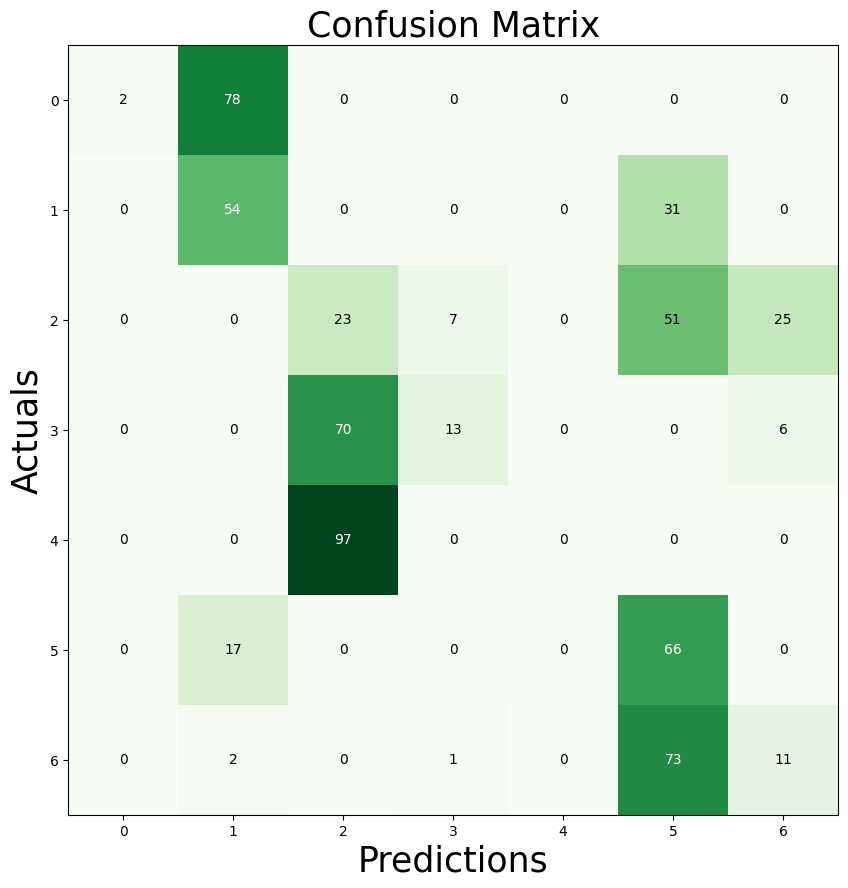

In [ ]:
#applying Ada Boost Classification

abc_model = AdaBoostClassifier()
abc_model.fit(x_train, y_train.values.ravel())

#working on test data
abc_test_predict = abc_model.predict(x_test)
abc_test_accuracy = accuracy_score(y_test, abc_test_predict)
abc_test_precision = precision_score(y_test, abc_test_predict, average = "weighted")
abc_test_recall = recall_score(y_test, abc_test_predict, average = "weighted")
abc_test_f1 = f1_score(y_test, abc_test_predict, average = "weighted")

print("Test Accuracy Score: ",abc_test_accuracy)
print("Test Precision Score: ",abc_test_precision)
print("Test Recall Score: ",abc_test_recall)
print("Test F1 Score: ",abc_test_f1)
print("\n")

print(classification_report(y_test, abc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = abc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Hyperparameter Tuning (Ada Boost)

In [ ]:
#hyperparameter tuning (Ada Boost)

abc_params = [{'n_estimators': list(range(0, 100)), 'learning_rate': [1, 0.1, 0.01, 0.001]}]

clf = GridSearchCV(abc_model, abc_params, cv = 10, scoring='accuracy')

clf.fit(x_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

{'learning_rate': 0.01, 'n_estimators': 7}
0.45273972602739726


Applying the best fitted Model (Ada Boost Model)

Test Accuracy Score:  0.9441786283891547
Test Precision Score:  0.9450205280512638
Test Recall Score:  0.9441786283891547
Test F1 Score:  0.9444195336672225


                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.96      0.96        80
      Normal_Weight       0.82      0.87      0.85        85
     Obesity_Type_I       1.00      0.97      0.99       106
    Obesity_Type_II       0.99      1.00      0.99        89
   Obesity_Type_III       1.00      1.00      1.00        97
 Overweight_Level_I       0.88      0.84      0.86        83
Overweight_Level_II       0.95      0.94      0.95        87

           accuracy                           0.94       627
          macro avg       0.94      0.94      0.94       627
       weighted avg       0.95      0.94      0.94       627





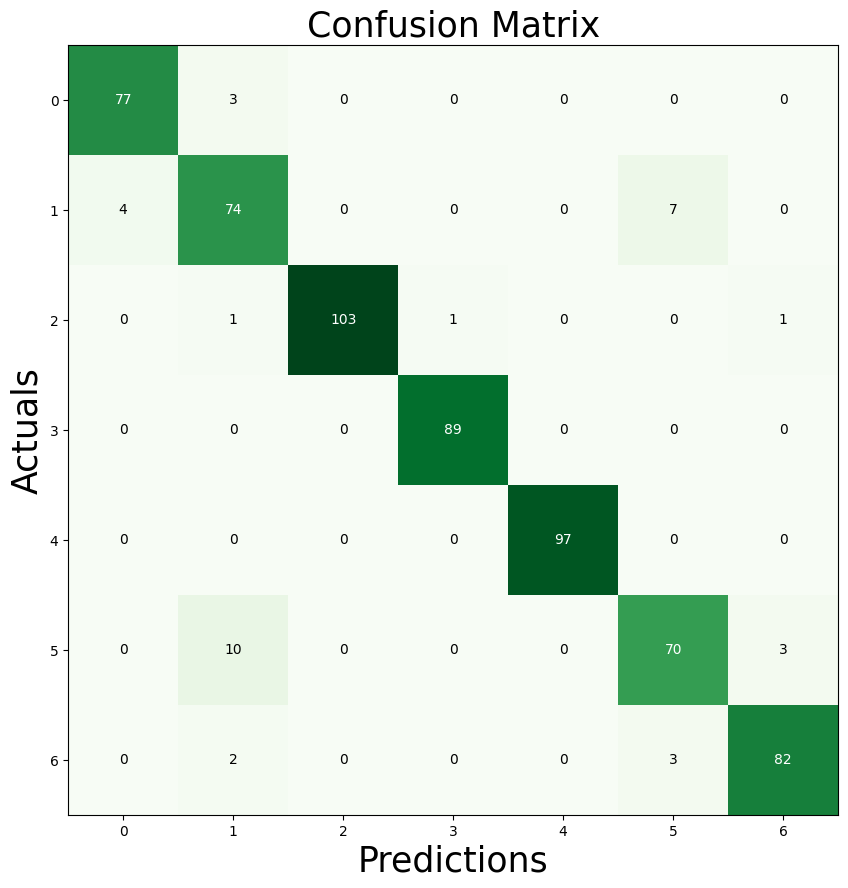

In [ ]:
#applying the best fitted hyperparameters (Ada Boost Model)

abc_model = AdaBoostClassifier(learning_rate = 0.01, n_estimators = 7, estimator = random_forest_model)
abc_model.fit(x_train, y_train.values.ravel())

#working on test data
abc_test_predict = abc_model.predict(x_test)
abc_test_accuracy = accuracy_score(y_test, abc_test_predict)
abc_test_precision = precision_score(y_test, abc_test_predict, average = "weighted")
abc_test_recall = recall_score(y_test, abc_test_predict, average = "weighted")
abc_test_f1 = f1_score(y_test, abc_test_predict, average = "weighted")

print("Test Accuracy Score: ",abc_test_accuracy)
print("Test Precision Score: ",abc_test_precision)
print("Test Recall Score: ",abc_test_recall)
print("Test F1 Score: ",abc_test_f1)
print("\n")

print(classification_report(y_test, abc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = abc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

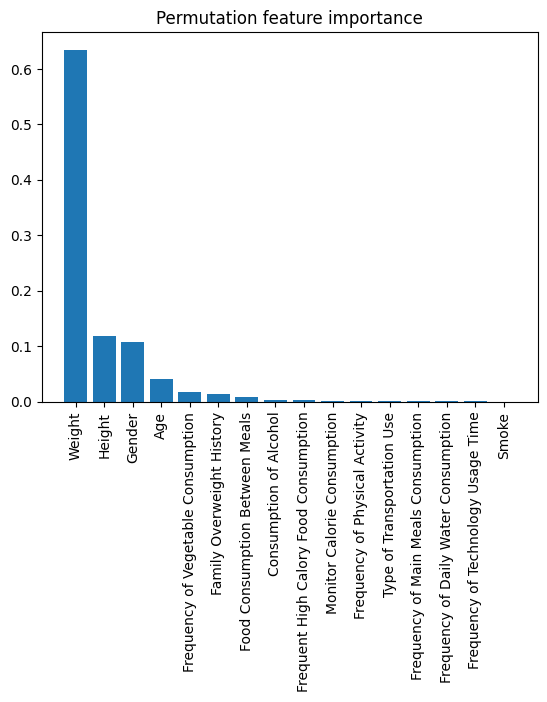

In [ ]:
idx = x_train.columns
pimp = permutation_importance(abc_model, x_train, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

#Gradient Boosting Classifier (Including Weight)

In [ ]:
#applying Gradient Boosting Classification

gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train.values.ravel())

#working on test data
gb_test_predict = gb_model.predict(x_test)
gb_test_accuracy = accuracy_score(y_test, gb_test_predict)
gb_test_precision = precision_score(y_test, gb_test_predict, average = "weighted")
gb_test_recall = recall_score(y_test, gb_test_predict, average = "weighted")
gb_test_f1 = f1_score(y_test, gb_test_predict, average = "weighted")

print("Test Accuracy Score: ",gb_test_accuracy)
print("Test Precision Score: ",gb_test_precision)
print("Test Recall Score: ",gb_test_recall)
print("Test F1 Score: ",gb_test_f1)
print("\n")

print(classification_report(y_test, gb_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = gb_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.9585326953748007
Test Precision Score:  0.9587589575637018
Test Recall Score:  0.9585326953748007
Test F1 Score:  0.9581653654191642


                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.99      0.95        80
      Normal_Weight       0.94      0.86      0.90        85
     Obesity_Type_I       0.98      0.97      0.98       106
    Obesity_Type_II       0.98      1.00      0.99        89
   Obesity_Type_III       1.00      1.00      1.00        97
 Overweight_Level_I       0.94      0.92      0.93        83
Overweight_Level_II       0.95      0.97      0.96        87

           accuracy                           0.96       627
          macro avg       0.96      0.96      0.96       627
       weighted avg       0.96      0.96      0.96       627





Hyperparameter tuning (Gradient Boost). Took a long time, that's why left.

In [ ]:
#hyperparameter tuning (Gradient Boost)

gb_params = [{'n_estimators': list(range(70, 100)), 'max_depth': list(range(0, 10)), 'learning_rate': [0.1, 0.01, 0.001]}]

clf = GridSearchCV(gb_model, gb_params, cv = 10, scoring='accuracy')

clf.fit(x_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

KeyboardInterrupt: ignored

Applying the best fitted Model (Gradient Boosting Model)

In [ ]:
#applying the best fitted hyperparameters (Gradient Model)

gb_model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 6, n_estimators = 75)
gb_model.fit(x_train, y_train.values.ravel())

#working on test data
gb_test_predict = gb_model.predict(x_test)
gb_test_accuracy = accuracy_score(y_test, gb_test_predict)
gb_test_precision = precision_score(y_test, gb_test_predict, average = "weighted")
gb_test_recall = recall_score(y_test, gb_test_predict, average = "weighted")
gb_test_f1 = f1_score(y_test, gb_test_predict, average = "weighted")

print("Test Accuracy Score: ",gb_test_accuracy)
print("Test Precision Score: ",gb_test_precision)
print("Test Recall Score: ",gb_test_recall)
print("Test F1 Score: ",gb_test_f1)
print("\n")

print(classification_report(y_test, gb_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = gb_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.9633173843700159
Test Precision Score:  0.9638332162255607
Test Recall Score:  0.9633173843700159
Test F1 Score:  0.9629756208703576


                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.99      0.94        80
      Normal_Weight       0.94      0.85      0.89        85
     Obesity_Type_I       0.99      0.97      0.98       106
    Obesity_Type_II       0.98      1.00      0.99        89
   Obesity_Type_III       1.00      1.00      1.00        97
 Overweight_Level_I       0.95      0.95      0.95        83
Overweight_Level_II       0.98      0.98      0.98        87

           accuracy                           0.96       627
          macro avg       0.96      0.96      0.96       627
       weighted avg       0.96      0.96      0.96       627





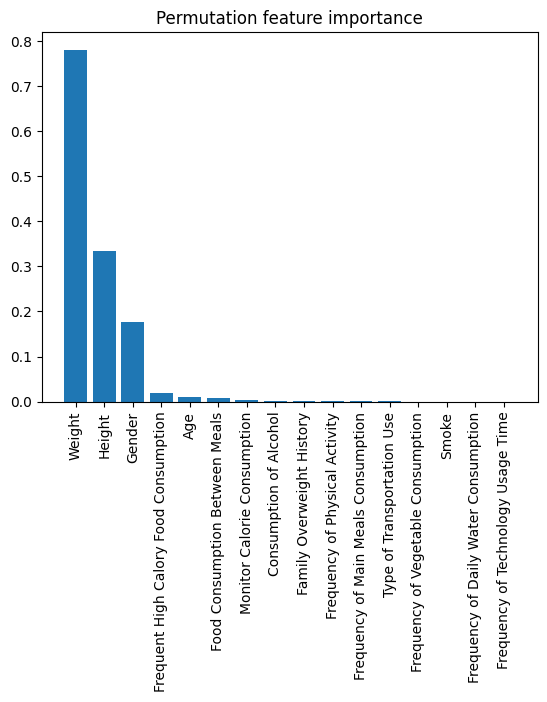

In [ ]:
idx = x_train.columns
pimp = permutation_importance(gb_model, x_train, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

#Now we will check every model excluding the weight column

We exlude the weight column from train and test split

In [ ]:
x_train_new = x_train[['Gender', 'Age', 'Height', 'Family Overweight History', 'Frequent High Calory Food Consumption', 'Frequency of Vegetable Consumption', 'Frequency of Main Meals Consumption', 'Food Consumption Between Meals', 'Smoke', 'Frequency of Daily Water Consumption', 'Monitor Calorie Consumption', 'Frequency of Physical Activity', 'Frequency of Technology Usage Time', 'Consumption of Alcohol', 'Type of Transportation Use']]
x_test_new = x_test[['Gender', 'Age', 'Height', 'Family Overweight History', 'Frequent High Calory Food Consumption', 'Frequency of Vegetable Consumption', 'Frequency of Main Meals Consumption', 'Food Consumption Between Meals', 'Smoke', 'Frequency of Daily Water Consumption', 'Monitor Calorie Consumption', 'Frequency of Physical Activity', 'Frequency of Technology Usage Time', 'Consumption of Alcohol', 'Type of Transportation Use']]

#Decision Tree Classifier (Excluding Weight)

Test Accuracy Score:  0.7368421052631579
Test Precision Score:  0.7299014052811847
Test Recall Score:  0.7368421052631579
Test F1 Score:  0.7301285946849473


                     precision    recall  f1-score   support

Insufficient_Weight       0.78      0.88      0.82        80
      Normal_Weight       0.55      0.38      0.45        85
     Obesity_Type_I       0.70      0.69      0.69       106
    Obesity_Type_II       0.85      0.85      0.85        89
   Obesity_Type_III       0.96      1.00      0.98        97
 Overweight_Level_I       0.65      0.64      0.64        83
Overweight_Level_II       0.60      0.70      0.65        87

           accuracy                           0.74       627
          macro avg       0.73      0.73      0.73       627
       weighted avg       0.73      0.74      0.73       627





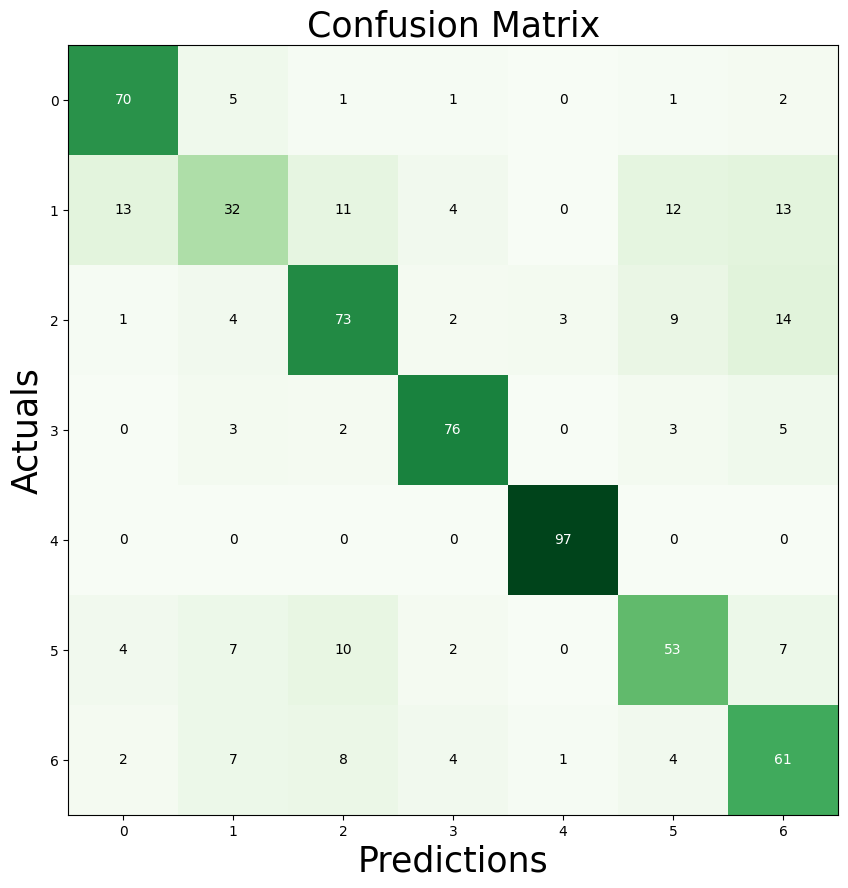

In [ ]:
#applying Decision Tree Classification

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train_new, y_train)

#working on test data
decision_tree_test_predict = decision_tree_model.predict(x_test_new)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_predict)
decision_tree_test_precision = precision_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_recall = recall_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_f1 = f1_score(y_test, decision_tree_test_predict, average = "weighted")

print("Test Accuracy Score: ",decision_tree_test_accuracy)
print("Test Precision Score: ",decision_tree_test_precision)
print("Test Recall Score: ",decision_tree_test_recall)
print("Test F1 Score: ",decision_tree_test_f1)
print("\n")

print(classification_report(y_test, decision_tree_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = decision_tree_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Applying the Best Fitted Model (Decision Tree)

In [ ]:
#applying the best fitted hyperparameters (Decision Tree Model)

decision_tree_model = DecisionTreeClassifier(criterion = 'log_loss', max_depth = 14)
decision_tree_model.fit(x_train_new, y_train)

#working on test data
decision_tree_test_predict = decision_tree_model.predict(x_test_new)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_predict)
decision_tree_test_precision = precision_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_recall = recall_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_f1 = f1_score(y_test, decision_tree_test_predict, average = "weighted")

print("Test Accuracy Score: ",decision_tree_test_accuracy)
print("Test Precision Score: ",decision_tree_test_precision)
print("Test Recall Score: ",decision_tree_test_recall)
print("Test F1 Score: ",decision_tree_test_f1)
print("\n")

print(classification_report(y_test, decision_tree_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = decision_tree_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.7543859649122807
Test Precision Score:  0.7488689625584989
Test Recall Score:  0.7543859649122807
Test F1 Score:  0.7502254594835286


                     precision    recall  f1-score   support

Insufficient_Weight       0.77      0.76      0.77        80
      Normal_Weight       0.54      0.46      0.50        85
     Obesity_Type_I       0.75      0.80      0.78       106
    Obesity_Type_II       0.84      0.89      0.86        89
   Obesity_Type_III       0.95      1.00      0.97        97
 Overweight_Level_I       0.63      0.69      0.66        83
Overweight_Level_II       0.72      0.63      0.67        87

           accuracy                           0.75       627
          macro avg       0.74      0.75      0.74       627
       weighted avg       0.75      0.75      0.75       627





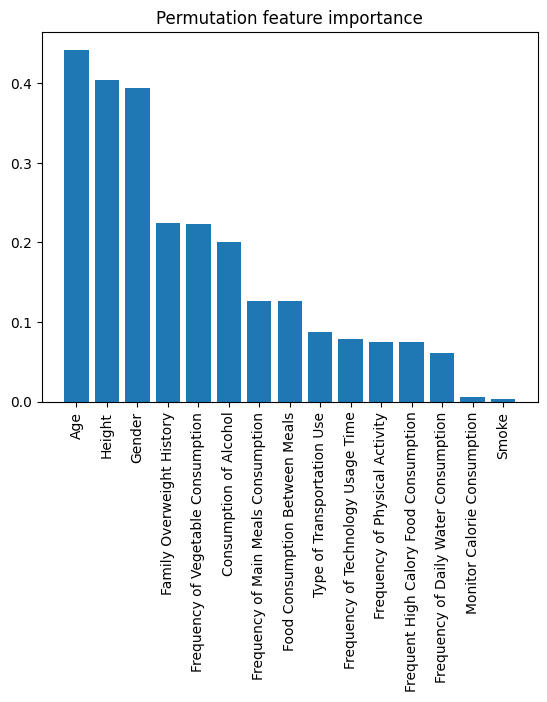

In [ ]:
idx = x_train_new.columns
pimp = permutation_importance(decision_tree_model, x_train_new, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

#Random Forest Classifier (Excluding Weight)

In [ ]:
#applying Random Forest Classification

random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train_new, y_train.values.ravel())

#working on test data (MinMax Scaled)
random_forest_test_predict = random_forest_model.predict(x_test_new)
random_forest_test_accuracy = accuracy_score(y_test, random_forest_test_predict)
random_forest_test_precision = precision_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_recall = recall_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_f1 = f1_score(y_test, random_forest_test_predict, average = "weighted")

print("Test Accuracy Score: ",random_forest_test_accuracy)
print("Test Precision Score: ",random_forest_test_precision)
print("Test Recall Score: ",random_forest_test_recall)
print("Test F1 Score: ",random_forest_test_f1)
print("\n")

print(classification_report(y_test, random_forest_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases (instances)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = random_forest_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.8548644338118022
Test Precision Score:  0.8529049540729251
Test Recall Score:  0.8548644338118022
Test F1 Score:  0.8523342629332163


                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.93      0.90        80
      Normal_Weight       0.69      0.69      0.69        85
     Obesity_Type_I       0.87      0.91      0.89       106
    Obesity_Type_II       0.89      0.98      0.93        89
   Obesity_Type_III       0.97      1.00      0.98        97
 Overweight_Level_I       0.81      0.69      0.75        83
Overweight_Level_II       0.85      0.76      0.80        87

           accuracy                           0.85       627
          macro avg       0.85      0.85      0.85       627
       weighted avg       0.85      0.85      0.85       627





Applying the best fitted Model (Random Forest Model)

Test Accuracy Score:  0.8452950558213717
Test Precision Score:  0.8407209757130885
Test Recall Score:  0.8452950558213717
Test F1 Score:  0.8418906658115952


                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.93      0.91        80
      Normal_Weight       0.71      0.64      0.67        85
     Obesity_Type_I       0.88      0.90      0.89       106
    Obesity_Type_II       0.86      0.97      0.91        89
   Obesity_Type_III       0.96      1.00      0.98        97
 Overweight_Level_I       0.76      0.69      0.72        83
Overweight_Level_II       0.80      0.77      0.78        87

           accuracy                           0.85       627
          macro avg       0.84      0.84      0.84       627
       weighted avg       0.84      0.85      0.84       627





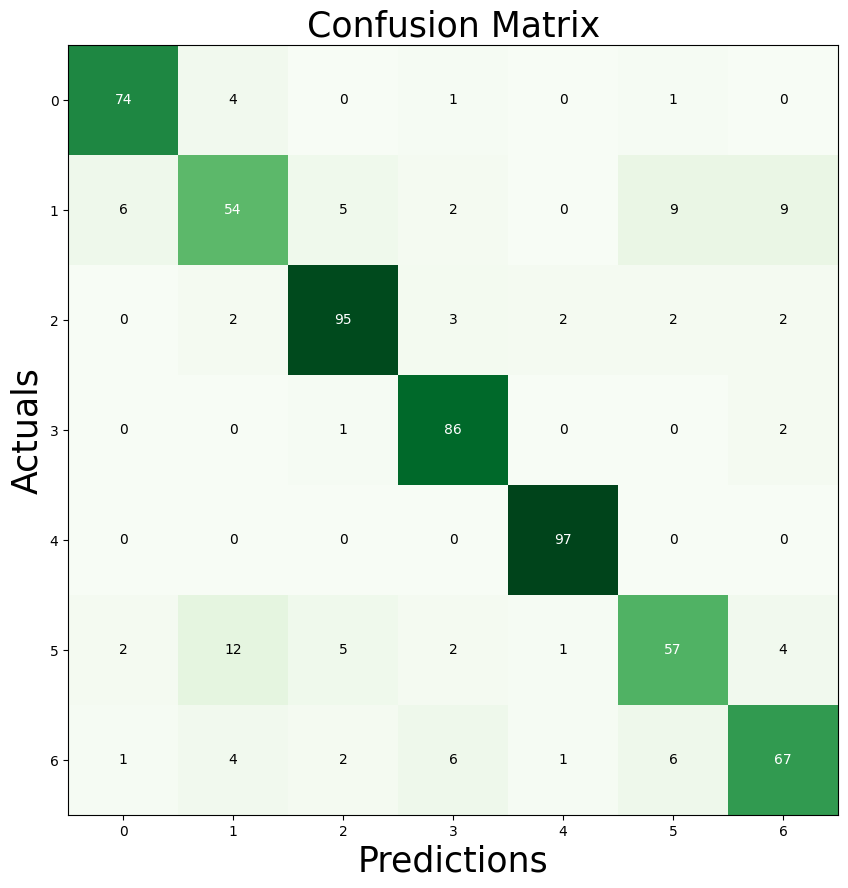

In [ ]:
#applying the best fitted hyperparameters (Random Forest Model)

random_forest_model = RandomForestClassifier(criterion = 'log_loss', max_depth = 13)
random_forest_model.fit(x_train_new, y_train.values.ravel())

#working on test data
random_forest_test_predict = random_forest_model.predict(x_test_new)
random_forest_test_accuracy = accuracy_score(y_test, random_forest_test_predict)
random_forest_test_precision = precision_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_recall = recall_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_f1 = f1_score(y_test, random_forest_test_predict, average = "weighted")

print("Test Accuracy Score: ",random_forest_test_accuracy)
print("Test Precision Score: ",random_forest_test_precision)
print("Test Recall Score: ",random_forest_test_recall)
print("Test F1 Score: ",random_forest_test_f1)
print("\n")

print(classification_report(y_test, random_forest_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases (instances)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = random_forest_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

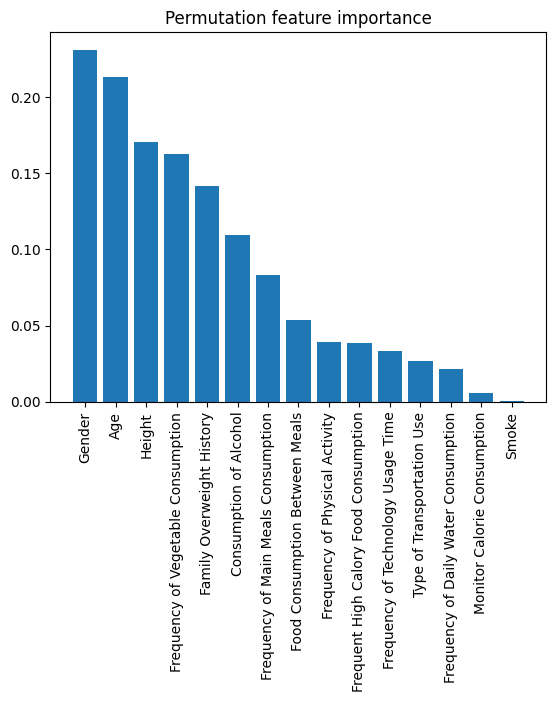

In [ ]:
idx = x_train_new.columns
pimp = permutation_importance(random_forest_model, x_train_new, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

#Support Vector Classifier (Excluding Weight)

Test Accuracy Score:  0.6475279106858054
Test Precision Score:  0.66022170239386
Test Recall Score:  0.6475279106858054
Test F1 Score:  0.6197580186799745


                     precision    recall  f1-score   support

Insufficient_Weight       0.63      0.80      0.71        80
      Normal_Weight       0.69      0.45      0.54        85
     Obesity_Type_I       0.56      0.69      0.62       106
    Obesity_Type_II       0.54      0.98      0.69        89
   Obesity_Type_III       0.93      1.00      0.97        97
 Overweight_Level_I       0.58      0.23      0.33        83
Overweight_Level_II       0.68      0.32      0.44        87

           accuracy                           0.65       627
          macro avg       0.66      0.64      0.61       627
       weighted avg       0.66      0.65      0.62       627





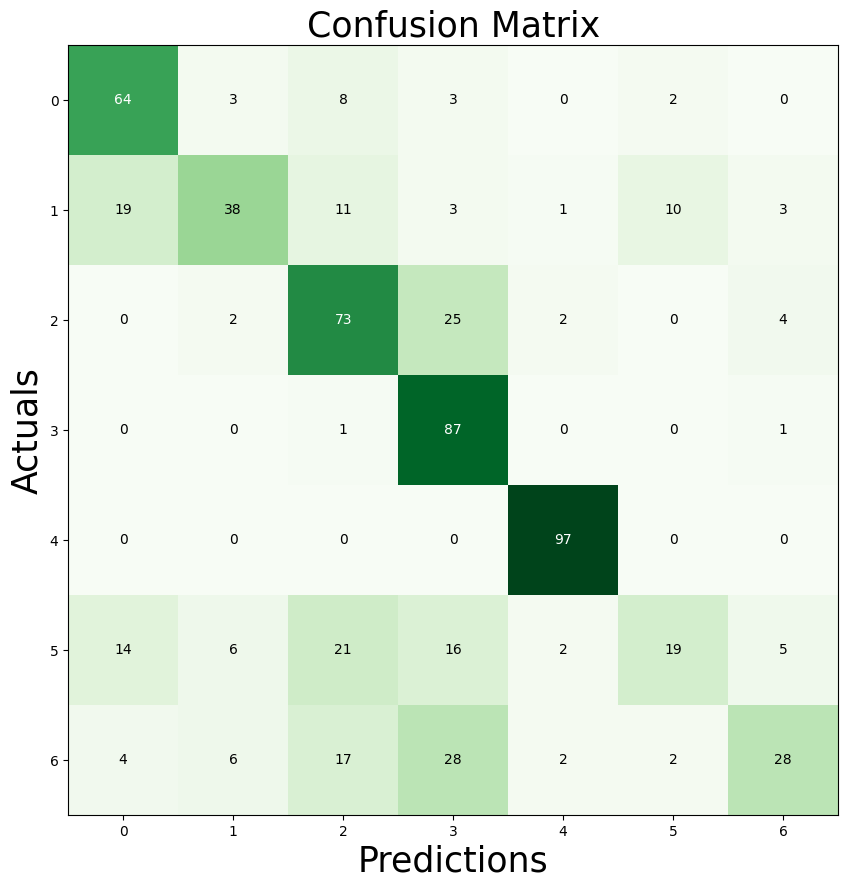

In [ ]:
#applying Support Vector Classification

svc_model = SVC()
svc_model.fit(x_train_new, y_train.values.ravel())

#working on test data
svc_test_predict = svc_model.predict(x_test_new)
svc_test_accuracy = accuracy_score(y_test, svc_test_predict)
svc_test_precision = precision_score(y_test, svc_test_predict, average = "weighted")
svc_test_recall = recall_score(y_test, svc_test_predict, average = "weighted")
svc_test_f1 = f1_score(y_test, svc_test_predict, average = "weighted")

print("Test Accuracy Score: ",svc_test_accuracy)
print("Test Precision Score: ",svc_test_precision)
print("Test Recall Score: ",svc_test_recall)
print("Test F1 Score: ",svc_test_f1)
print("\n")

print(classification_report(y_test, svc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = svc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.7464114832535885
Test Precision Score:  0.7388462610282324
Test Recall Score:  0.7464114832535885
Test F1 Score:  0.739161428658842


                     precision    recall  f1-score   support

Insufficient_Weight       0.74      0.82      0.78        80
      Normal_Weight       0.62      0.58      0.60        85
     Obesity_Type_I       0.73      0.77      0.75       106
    Obesity_Type_II       0.79      0.94      0.86        89
   Obesity_Type_III       0.94      0.99      0.96        97
 Overweight_Level_I       0.62      0.53      0.57        83
Overweight_Level_II       0.70      0.54      0.61        87

           accuracy                           0.75       627
          macro avg       0.73      0.74      0.73       627
       weighted avg       0.74      0.75      0.74       627





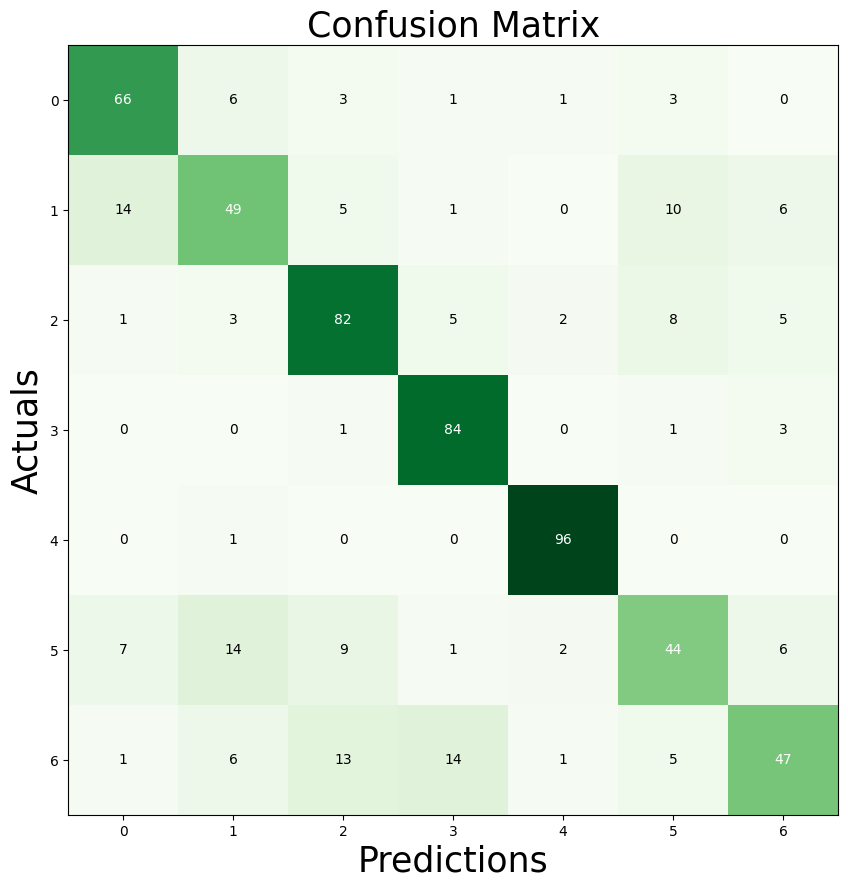

In [ ]:
#applying the best fitted hyperparameters (Support Vector Model)

svc_model = SVC(degree = 5, gamma = 'auto', kernel = 'poly')
svc_model.fit(x_train_new, y_train.values.ravel())

#working on test data
svc_test_predict = svc_model.predict(x_test_new)
svc_test_accuracy = accuracy_score(y_test, svc_test_predict)
svc_test_precision = precision_score(y_test, svc_test_predict, average = "weighted")
svc_test_recall = recall_score(y_test, svc_test_predict, average = "weighted")
svc_test_f1 = f1_score(y_test, svc_test_predict, average = "weighted")

print("Test Accuracy Score: ",svc_test_accuracy)
print("Test Precision Score: ",svc_test_precision)
print("Test Recall Score: ",svc_test_recall)
print("Test F1 Score: ",svc_test_f1)
print("\n")

print(classification_report(y_test, svc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = svc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

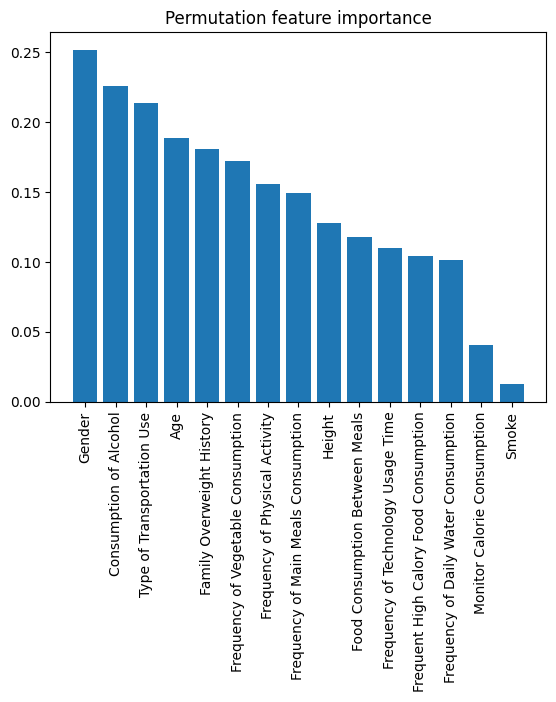

In [ ]:
idx = x_train_new.columns
pimp = permutation_importance(svc_model, x_train_new, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

#K Nearest Neighbour Classifier (Excluding Weight)

In [ ]:
#applying K Nearest Neighbour Classification

knn_model = KNeighborsClassifier()
knn_model.fit(x_train_new, y_train.values.ravel())

#working on test data
knn_test_predict = knn_model.predict(x_test_new)
knn_test_accuracy = accuracy_score(y_test, knn_test_predict)
knn_test_precision = precision_score(y_test, knn_test_predict, average = "weighted")
knn_test_recall = recall_score(y_test, knn_test_predict, average = "weighted")
knn_test_f1 = f1_score(y_test, knn_test_predict, average = "weighted")

print("Test Accuracy Score: ",knn_test_accuracy)
print("Test Precision Score: ",knn_test_precision)
print("Test Recall Score: ",knn_test_recall)
print("Test F1 Score: ",knn_test_f1)
print("\n")

print(classification_report(y_test, knn_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = knn_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.7288676236044657
Test Precision Score:  0.7200292688547929
Test Recall Score:  0.7288676236044657
Test F1 Score:  0.7109761748433933


                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.88      0.81        80
      Normal_Weight       0.65      0.38      0.48        85
     Obesity_Type_I       0.67      0.84      0.75       106
    Obesity_Type_II       0.71      0.94      0.81        89
   Obesity_Type_III       0.89      1.00      0.94        97
 Overweight_Level_I       0.65      0.47      0.55        83
Overweight_Level_II       0.70      0.53      0.60        87

           accuracy                           0.73       627
          macro avg       0.72      0.72      0.70       627
       weighted avg       0.72      0.73      0.71       627





In [ ]:
#applying the best fitted hyperparameters (K Nearest Neighbour Model)

knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1, weights = 'uniform')
knn_model.fit(x_train_new, y_train.values.ravel())

#working on test data
knn_test_predict = knn_model.predict(x_test_new)
knn_test_accuracy = accuracy_score(y_test, knn_test_predict)
knn_test_precision = precision_score(y_test, knn_test_predict, average = "weighted")
knn_test_recall = recall_score(y_test, knn_test_predict, average = "weighted")
knn_test_f1 = f1_score(y_test, knn_test_predict, average = "weighted")

print("Test Accuracy Score: ",knn_test_accuracy)
print("Test Precision Score: ",knn_test_precision)
print("Test Recall Score: ",knn_test_recall)
print("Test F1 Score: ",knn_test_f1)
print("\n")

print(classification_report(y_test, knn_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = knn_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.7830940988835726
Test Precision Score:  0.7777478109260436
Test Recall Score:  0.7830940988835726
Test F1 Score:  0.7765590460909005


                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.90      0.86        80
      Normal_Weight       0.70      0.51      0.59        85
     Obesity_Type_I       0.75      0.79      0.77       106
    Obesity_Type_II       0.82      0.94      0.87        89
   Obesity_Type_III       0.95      1.00      0.97        97
 Overweight_Level_I       0.73      0.63      0.68        83
Overweight_Level_II       0.65      0.68      0.66        87

           accuracy                           0.78       627
          macro avg       0.78      0.78      0.77       627
       weighted avg       0.78      0.78      0.78       627





In [ ]:
idx = x_train_new.columns
pimp = permutation_importance(knn_model, x_train_new, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

#Ada Boost Classifier (Excluding Weight)

In [ ]:
#applying Ada Boost Classification

abc_model = AdaBoostClassifier()
abc_model.fit(x_train_new, y_train.values.ravel())

#working on test data
abc_test_predict = abc_model.predict(x_test_new)
abc_test_accuracy = accuracy_score(y_test, abc_test_predict)
abc_test_precision = precision_score(y_test, abc_test_predict, average = "weighted")
abc_test_recall = recall_score(y_test, abc_test_predict, average = "weighted")
abc_test_f1 = f1_score(y_test, abc_test_predict, average = "weighted")

print("Test Accuracy Score: ",abc_test_accuracy)
print("Test Precision Score: ",abc_test_precision)
print("Test Recall Score: ",abc_test_recall)
print("Test F1 Score: ",abc_test_f1)
print("\n")

print(classification_report(y_test, abc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = abc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.3939393939393939
Test Precision Score:  0.37430000819267817
Test Recall Score:  0.3939393939393939
Test F1 Score:  0.37394646175657126


                     precision    recall  f1-score   support

Insufficient_Weight       0.45      0.25      0.32        80
      Normal_Weight       0.27      0.33      0.29        85
     Obesity_Type_I       0.25      0.32      0.28       106
    Obesity_Type_II       0.43      0.52      0.47        89
   Obesity_Type_III       0.78      1.00      0.88        97
 Overweight_Level_I       0.25      0.13      0.17        83
Overweight_Level_II       0.16      0.13      0.14        87

           accuracy                           0.39       627
          macro avg       0.37      0.38      0.37       627
       weighted avg       0.37      0.39      0.37       627





Test Accuracy Score:  0.8708133971291866
Test Precision Score:  0.8699193043384621
Test Recall Score:  0.8708133971291866
Test F1 Score:  0.868799649244907


                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.93      0.91        80
      Normal_Weight       0.72      0.71      0.71        85
     Obesity_Type_I       0.91      0.92      0.91       106
    Obesity_Type_II       0.85      0.99      0.91        89
   Obesity_Type_III       0.98      1.00      0.99        97
 Overweight_Level_I       0.85      0.73      0.79        83
Overweight_Level_II       0.86      0.79      0.83        87

           accuracy                           0.87       627
          macro avg       0.87      0.87      0.86       627
       weighted avg       0.87      0.87      0.87       627





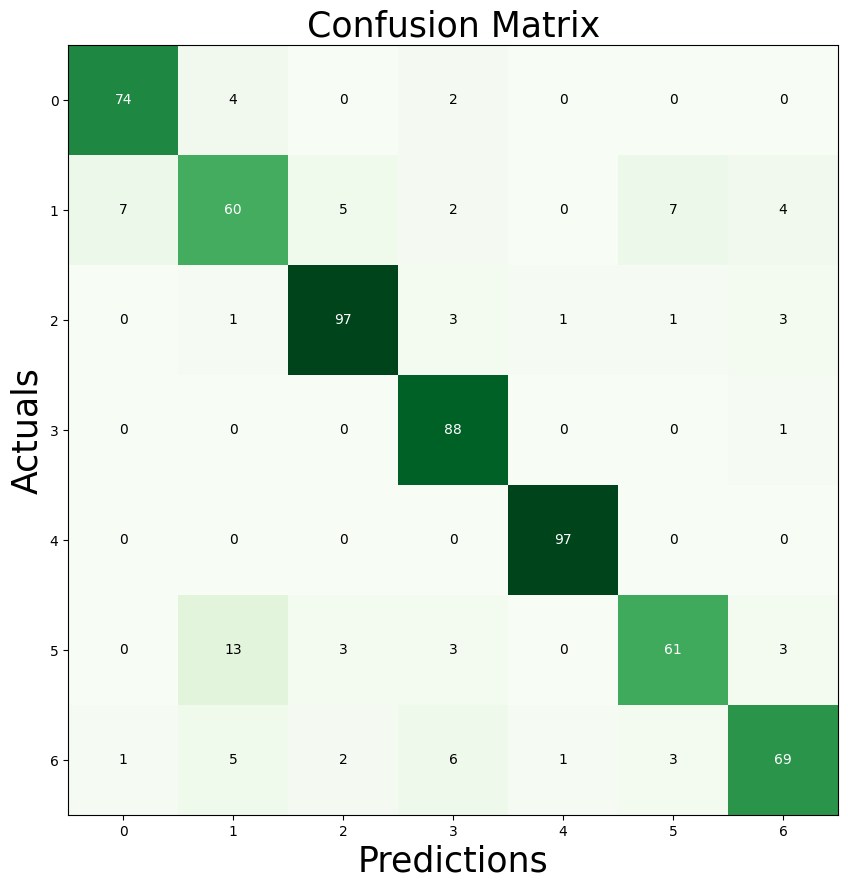

In [ ]:
#applying the best fitted hyperparameters (Ada Boost Model)

abc_model = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 97, estimator = random_forest_model)
abc_model.fit(x_train_new, y_train.values.ravel())

#working on test data
abc_test_predict = abc_model.predict(x_test_new)
abc_test_accuracy = accuracy_score(y_test, abc_test_predict)
abc_test_precision = precision_score(y_test, abc_test_predict, average = "weighted")
abc_test_recall = recall_score(y_test, abc_test_predict, average = "weighted")
abc_test_f1 = f1_score(y_test, abc_test_predict, average = "weighted")

print("Test Accuracy Score: ",abc_test_accuracy)
print("Test Precision Score: ",abc_test_precision)
print("Test Recall Score: ",abc_test_recall)
print("Test F1 Score: ",abc_test_f1)
print("\n")

print(classification_report(y_test, abc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = abc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

In [ ]:
idx = x_train_new.columns
pimp = permutation_importance(abc_model, x_train_new, y_train, n_repeats=2,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

#Gradient Boosting Classifier (Excluding Weight)

Test Accuracy Score:  0.7990430622009569
Test Precision Score:  0.7958296937726427
Test Recall Score:  0.7990430622009569
Test F1 Score:  0.7941594751031205


                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.90      0.87        80
      Normal_Weight       0.70      0.67      0.69        85
     Obesity_Type_I       0.75      0.81      0.78       106
    Obesity_Type_II       0.79      0.94      0.86        89
   Obesity_Type_III       0.96      1.00      0.98        97
 Overweight_Level_I       0.71      0.59      0.64        83
Overweight_Level_II       0.80      0.64      0.71        87

           accuracy                           0.80       627
          macro avg       0.79      0.79      0.79       627
       weighted avg       0.80      0.80      0.79       627





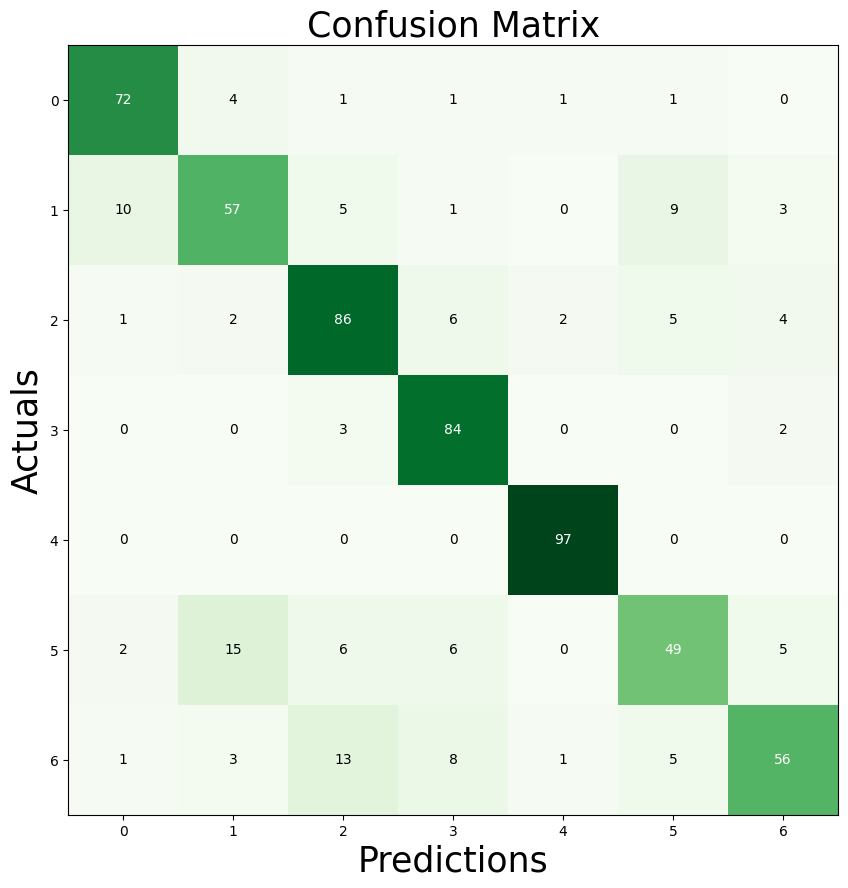

In [ ]:
#applying Gradient Boosting Classification

gb_model = GradientBoostingClassifier()
gb_model.fit(x_train_new, y_train.values.ravel())

#working on test data
gb_test_predict = gb_model.predict(x_test_new)
gb_test_accuracy = accuracy_score(y_test, gb_test_predict)
gb_test_precision = precision_score(y_test, gb_test_predict, average = "weighted")
gb_test_recall = recall_score(y_test, gb_test_predict, average = "weighted")
gb_test_f1 = f1_score(y_test, gb_test_predict, average = "weighted")

print("Test Accuracy Score: ",gb_test_accuracy)
print("Test Precision Score: ",gb_test_precision)
print("Test Recall Score: ",gb_test_recall)
print("Test F1 Score: ",gb_test_f1)
print("\n")

print(classification_report(y_test, gb_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = gb_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.8500797448165869
Test Precision Score:  0.8487907122950785
Test Recall Score:  0.8500797448165869
Test F1 Score:  0.8475982598755879


                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.91      0.90        80
      Normal_Weight       0.73      0.72      0.72        85
     Obesity_Type_I       0.84      0.87      0.85       106
    Obesity_Type_II       0.88      0.96      0.91        89
   Obesity_Type_III       0.94      1.00      0.97        97
 Overweight_Level_I       0.86      0.69      0.77        83
Overweight_Level_II       0.81      0.78      0.80        87

           accuracy                           0.85       627
          macro avg       0.85      0.85      0.84       627
       weighted avg       0.85      0.85      0.85       627





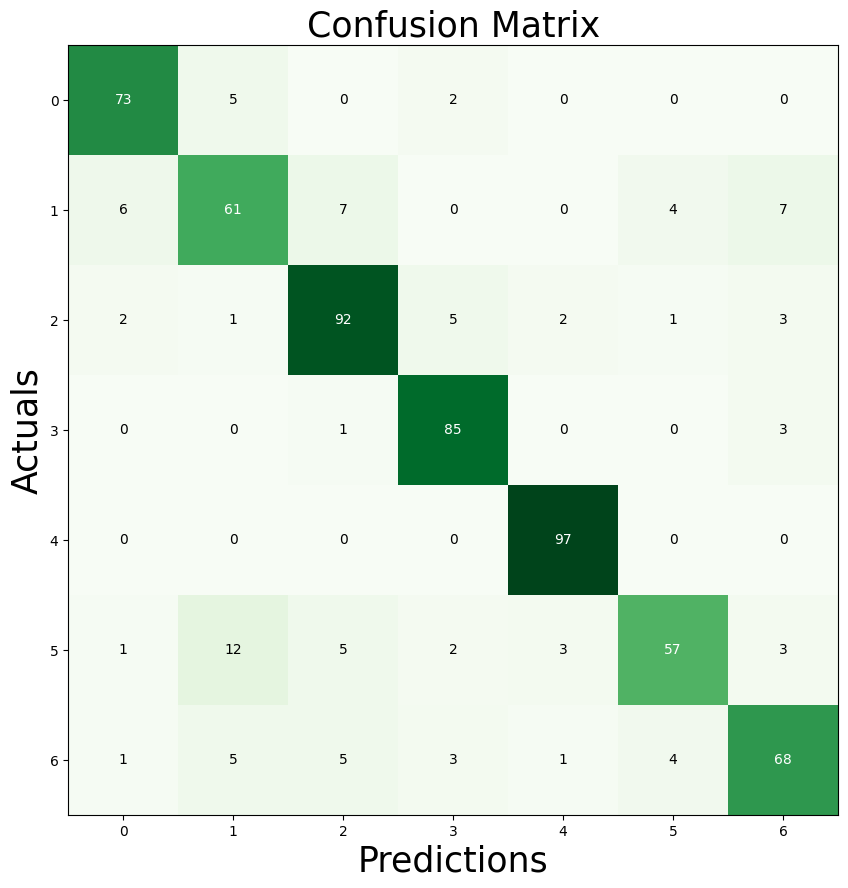

In [ ]:
#applying the best fitted hyperparameters (Gradient Boosting Model)

gb_model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 6, n_estimators = 75)
gb_model.fit(x_train_new, y_train.values.ravel())

#working on test data
gb_test_predict = gb_model.predict(x_test_new)
gb_test_accuracy = accuracy_score(y_test, gb_test_predict)
gb_test_precision = precision_score(y_test, gb_test_predict, average = "weighted")
gb_test_recall = recall_score(y_test, gb_test_predict, average = "weighted")
gb_test_f1 = f1_score(y_test, gb_test_predict, average = "weighted")

print("Test Accuracy Score: ",gb_test_accuracy)
print("Test Precision Score: ",gb_test_precision)
print("Test Recall Score: ",gb_test_recall)
print("Test F1 Score: ",gb_test_f1)
print("\n")

print(classification_report(y_test, gb_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = gb_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

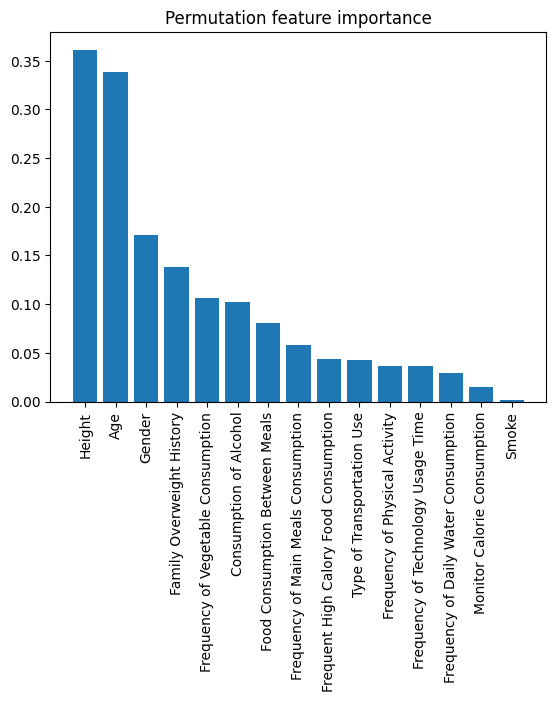

In [ ]:
idx = x_train_new.columns
pimp = permutation_importance(gb_model, x_train_new, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

#Now we will check every model excluding the Age column.

In [ ]:
#x_train_pc = x_train[['Family Overweight History', 'Monitor Calorie Consumption', 'Frequency of Physical Activity', 'Frequency of Technology Usage Time', 'Type of Transportation Use']]
#x_test_pc = x_test[['Family Overweight History', 'Monitor Calorie Consumption', 'Frequency of Physical Activity', 'Frequency of Technology Usage Time', 'Type of Transportation Use']]

x_train_age = x_train[['Gender', 'Age', 'Family Overweight History', 'Frequent High Calory Food Consumption', 'Frequency of Vegetable Consumption', 'Frequency of Main Meals Consumption', 'Food Consumption Between Meals', 'Smoke', 'Frequency of Daily Water Consumption', 'Monitor Calorie Consumption', 'Frequency of Physical Activity', 'Frequency of Technology Usage Time', 'Consumption of Alcohol', 'Type of Transportation Use']]
x_test_age = x_test[['Gender', 'Age', 'Family Overweight History', 'Frequent High Calory Food Consumption', 'Frequency of Vegetable Consumption', 'Frequency of Main Meals Consumption', 'Food Consumption Between Meals', 'Smoke', 'Frequency of Daily Water Consumption', 'Monitor Calorie Consumption', 'Frequency of Physical Activity', 'Frequency of Technology Usage Time', 'Consumption of Alcohol', 'Type of Transportation Use']]

In [ ]:
#applying Decision Tree Classification

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train_age, y_train)

#working on test data
decision_tree_test_predict = decision_tree_model.predict(x_test_age)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_predict)
decision_tree_test_precision = precision_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_recall = recall_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_f1 = f1_score(y_test, decision_tree_test_predict, average = "weighted")

print("Test Accuracy Score: ",decision_tree_test_accuracy)
print("Test Precision Score: ",decision_tree_test_precision)
print("Test Recall Score: ",decision_tree_test_recall)
print("Test F1 Score: ",decision_tree_test_f1)
print("\n")

print(classification_report(y_test, decision_tree_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = decision_tree_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.7575757575757576
Test Precision Score:  0.7519278752051733
Test Recall Score:  0.7575757575757576
Test F1 Score:  0.7534635502780449


                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.86      0.87        80
      Normal_Weight       0.52      0.47      0.49        85
     Obesity_Type_I       0.78      0.77      0.78       106
    Obesity_Type_II       0.80      0.93      0.86        89
   Obesity_Type_III       0.97      1.00      0.98        97
 Overweight_Level_I       0.61      0.63      0.62        83
Overweight_Level_II       0.68      0.60      0.63        87

           accuracy                           0.76       627
          macro avg       0.75      0.75      0.75       627
       weighted avg       0.75      0.76      0.75       627





Test Accuracy Score:  0.74481658692185
Test Precision Score:  0.7394224674940412
Test Recall Score:  0.74481658692185
Test F1 Score:  0.738234013705958


                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.88      0.87        80
      Normal_Weight       0.48      0.46      0.47        85
     Obesity_Type_I       0.73      0.75      0.74       106
    Obesity_Type_II       0.77      0.97      0.86        89
   Obesity_Type_III       0.96      1.00      0.98        97
 Overweight_Level_I       0.62      0.58      0.60        83
Overweight_Level_II       0.73      0.54      0.62        87

           accuracy                           0.74       627
          macro avg       0.74      0.74      0.73       627
       weighted avg       0.74      0.74      0.74       627





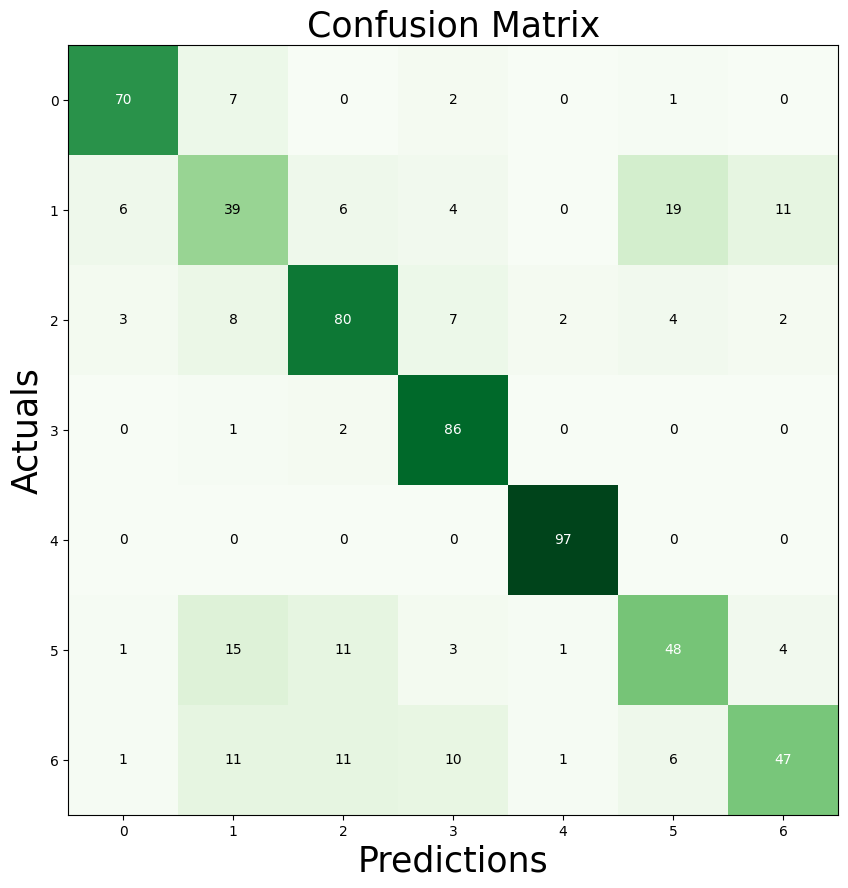

In [ ]:
#applying the best fitted hyperparameters (Decision Tree Model)

decision_tree_model = DecisionTreeClassifier(criterion = 'log_loss', max_depth = 14)
decision_tree_model.fit(x_train_age, y_train)

#working on test data
decision_tree_test_predict = decision_tree_model.predict(x_test_age)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_predict)
decision_tree_test_precision = precision_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_recall = recall_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_f1 = f1_score(y_test, decision_tree_test_predict, average = "weighted")

print("Test Accuracy Score: ",decision_tree_test_accuracy)
print("Test Precision Score: ",decision_tree_test_precision)
print("Test Recall Score: ",decision_tree_test_recall)
print("Test F1 Score: ",decision_tree_test_f1)
print("\n")

print(classification_report(y_test, decision_tree_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = decision_tree_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

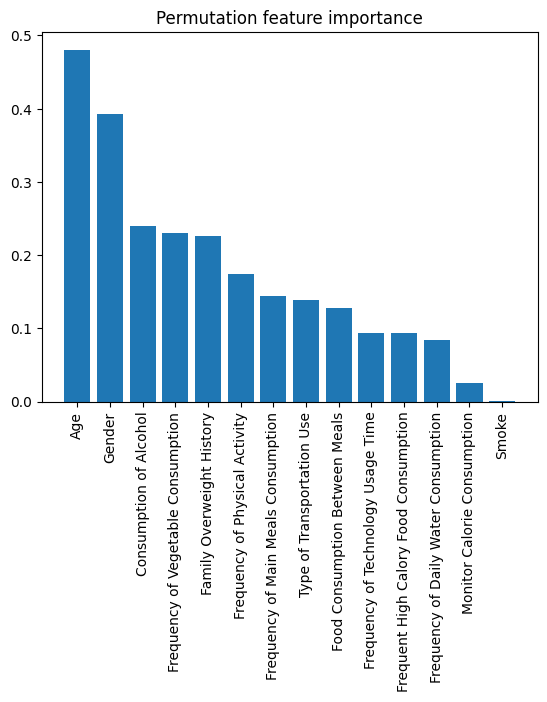

In [ ]:
idx = x_train_age.columns
pimp = permutation_importance(decision_tree_model, x_train_age, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

In [ ]:
#applying Random Forest Classification

random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train_age, y_train.values.ravel())

#working on test data (MinMax Scaled)
random_forest_test_predict = random_forest_model.predict(x_test_age)
random_forest_test_accuracy = accuracy_score(y_test, random_forest_test_predict)
random_forest_test_precision = precision_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_recall = recall_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_f1 = f1_score(y_test, random_forest_test_predict, average = "weighted")

print("Test Accuracy Score: ",random_forest_test_accuracy)
print("Test Precision Score: ",random_forest_test_precision)
print("Test Recall Score: ",random_forest_test_recall)
print("Test F1 Score: ",random_forest_test_f1)
print("\n")

print(classification_report(y_test, random_forest_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases (instances)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = random_forest_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.8213716108452951
Test Precision Score:  0.8181026598608069
Test Recall Score:  0.8213716108452951
Test F1 Score:  0.818353615994388


                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.93      0.90        80
      Normal_Weight       0.68      0.64      0.65        85
     Obesity_Type_I       0.87      0.83      0.85       106
    Obesity_Type_II       0.83      0.96      0.89        89
   Obesity_Type_III       0.96      1.00      0.98        97
 Overweight_Level_I       0.71      0.70      0.70        83
Overweight_Level_II       0.78      0.68      0.72        87

           accuracy                           0.82       627
          macro avg       0.81      0.82      0.81       627
       weighted avg       0.82      0.82      0.82       627





Test Accuracy Score:  0.8229665071770335
Test Precision Score:  0.8202922730063711
Test Recall Score:  0.8229665071770335
Test F1 Score:  0.8190660362231686


                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.93      0.89        80
      Normal_Weight       0.70      0.61      0.65        85
     Obesity_Type_I       0.84      0.82      0.83       106
    Obesity_Type_II       0.81      0.97      0.88        89
   Obesity_Type_III       0.96      1.00      0.98        97
 Overweight_Level_I       0.72      0.73      0.73        83
Overweight_Level_II       0.82      0.68      0.74        87

           accuracy                           0.82       627
          macro avg       0.82      0.82      0.82       627
       weighted avg       0.82      0.82      0.82       627





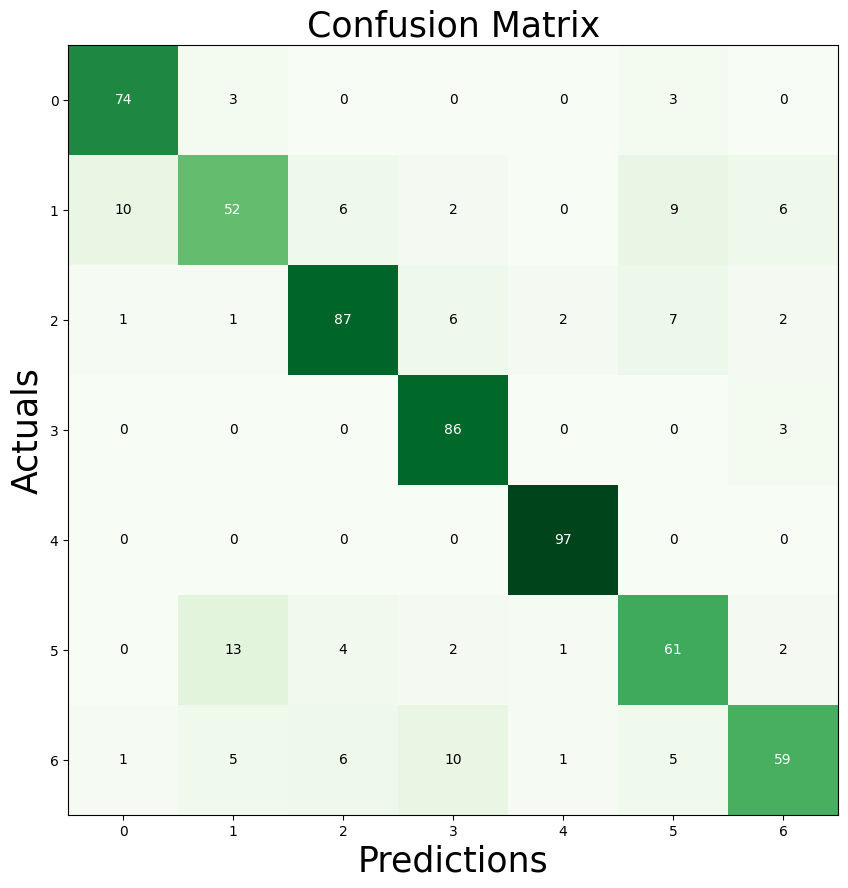

In [ ]:
#applying the best fitted hyperparameters (Random Forest Model)

random_forest_model = RandomForestClassifier(criterion = 'log_loss', max_depth = 13)
random_forest_model.fit(x_train_age, y_train.values.ravel())

#working on test data
random_forest_test_predict = random_forest_model.predict(x_test_age)
random_forest_test_accuracy = accuracy_score(y_test, random_forest_test_predict)
random_forest_test_precision = precision_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_recall = recall_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_f1 = f1_score(y_test, random_forest_test_predict, average = "weighted")

print("Test Accuracy Score: ",random_forest_test_accuracy)
print("Test Precision Score: ",random_forest_test_precision)
print("Test Recall Score: ",random_forest_test_recall)
print("Test F1 Score: ",random_forest_test_f1)
print("\n")

print(classification_report(y_test, random_forest_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases (instances)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = random_forest_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

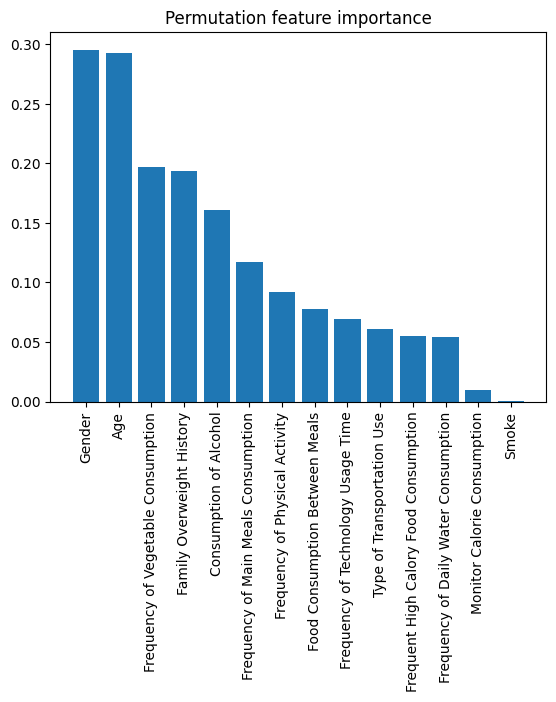

In [ ]:
idx = x_train_age.columns
pimp = permutation_importance(random_forest_model, x_train_age, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.6443381180223285
Test Precision Score:  0.6538049461974299
Test Recall Score:  0.6443381180223285
Test F1 Score:  0.6151689292537074


                     precision    recall  f1-score   support

Insufficient_Weight       0.62      0.80      0.70        80
      Normal_Weight       0.71      0.42      0.53        85
     Obesity_Type_I       0.56      0.70      0.62       106
    Obesity_Type_II       0.54      0.98      0.70        89
   Obesity_Type_III       0.93      1.00      0.97        97
 Overweight_Level_I       0.58      0.23      0.33        83
Overweight_Level_II       0.63      0.31      0.42        87

           accuracy                           0.64       627
          macro avg       0.65      0.63      0.61       627
       weighted avg       0.65      0.64      0.62       627





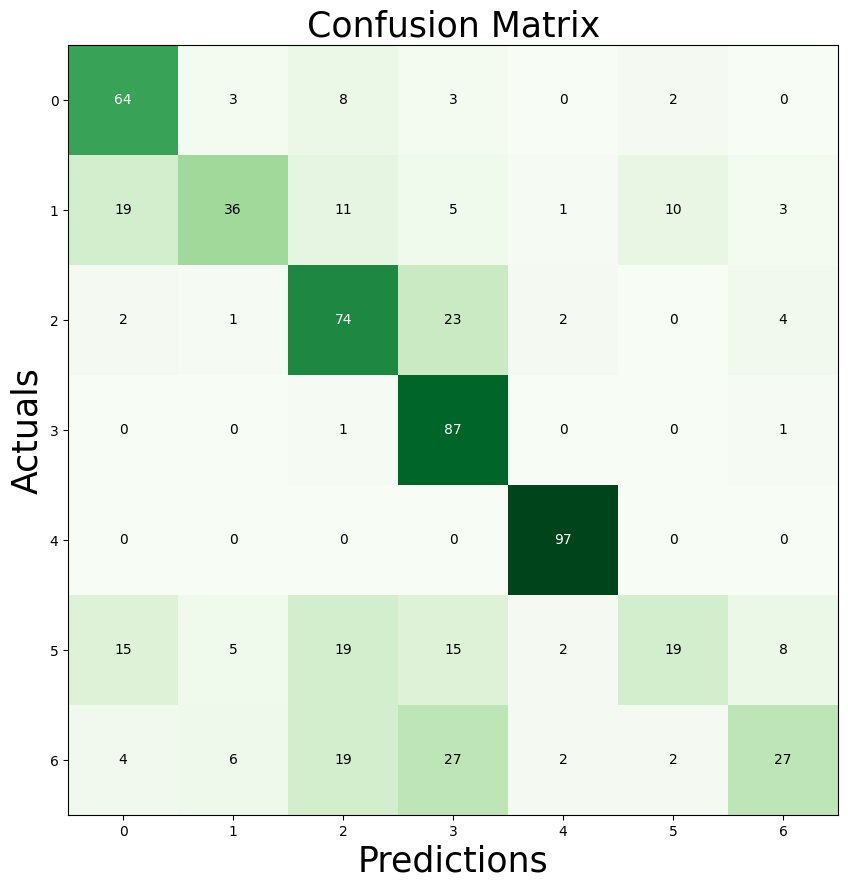

In [ ]:
#applying Support Vector Classification

svc_model = SVC()
svc_model.fit(x_train_age, y_train.values.ravel())

#working on test data
svc_test_predict = svc_model.predict(x_test_age)
svc_test_accuracy = accuracy_score(y_test, svc_test_predict)
svc_test_precision = precision_score(y_test, svc_test_predict, average = "weighted")
svc_test_recall = recall_score(y_test, svc_test_predict, average = "weighted")
svc_test_f1 = f1_score(y_test, svc_test_predict, average = "weighted")

print("Test Accuracy Score: ",svc_test_accuracy)
print("Test Precision Score: ",svc_test_precision)
print("Test Recall Score: ",svc_test_recall)
print("Test F1 Score: ",svc_test_f1)
print("\n")

print(classification_report(y_test, svc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = svc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.7400318979266348
Test Precision Score:  0.7298841099527568
Test Recall Score:  0.7400318979266348
Test F1 Score:  0.7312981734753695


                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.84      0.80        80
      Normal_Weight       0.64      0.53      0.58        85
     Obesity_Type_I       0.69      0.77      0.73       106
    Obesity_Type_II       0.79      0.94      0.86        89
   Obesity_Type_III       0.94      1.00      0.97        97
 Overweight_Level_I       0.62      0.52      0.57        83
Overweight_Level_II       0.63      0.53      0.58        87

           accuracy                           0.74       627
          macro avg       0.73      0.73      0.73       627
       weighted avg       0.73      0.74      0.73       627





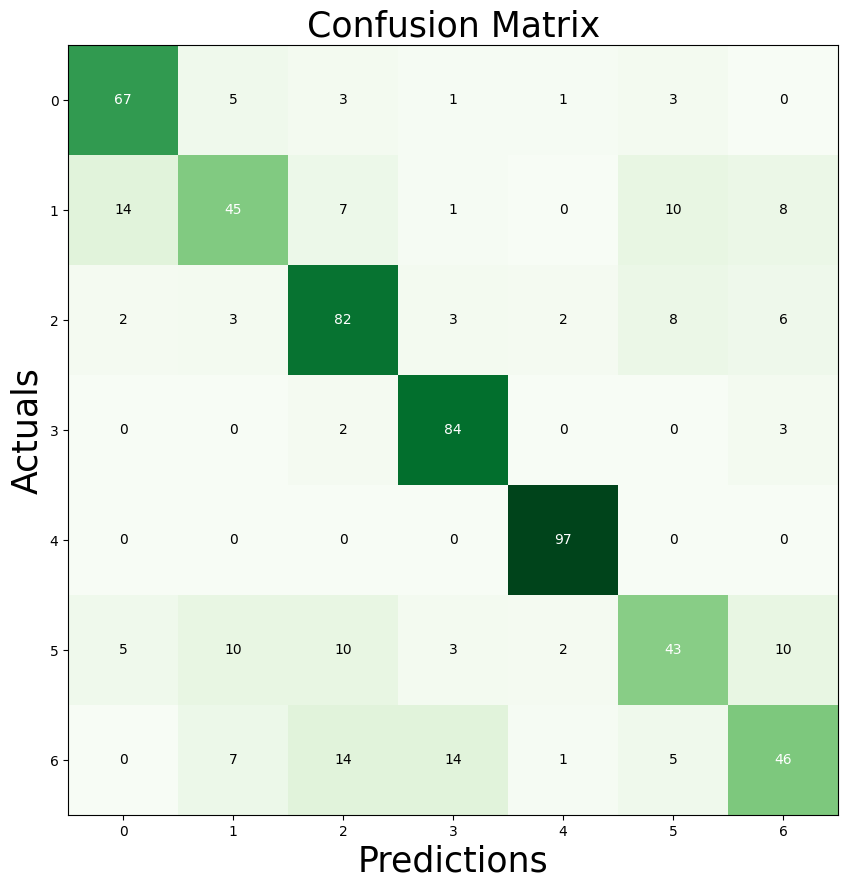

In [ ]:
#applying the best fitted hyperparameters (Support Vector Model)

svc_model = SVC(degree = 5, gamma = 'auto', kernel = 'poly')
svc_model.fit(x_train_age, y_train.values.ravel())

#working on test data
svc_test_predict = svc_model.predict(x_test_age)
svc_test_accuracy = accuracy_score(y_test, svc_test_predict)
svc_test_precision = precision_score(y_test, svc_test_predict, average = "weighted")
svc_test_recall = recall_score(y_test, svc_test_predict, average = "weighted")
svc_test_f1 = f1_score(y_test, svc_test_predict, average = "weighted")

print("Test Accuracy Score: ",svc_test_accuracy)
print("Test Precision Score: ",svc_test_precision)
print("Test Recall Score: ",svc_test_recall)
print("Test F1 Score: ",svc_test_f1)
print("\n")

print(classification_report(y_test, svc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = svc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

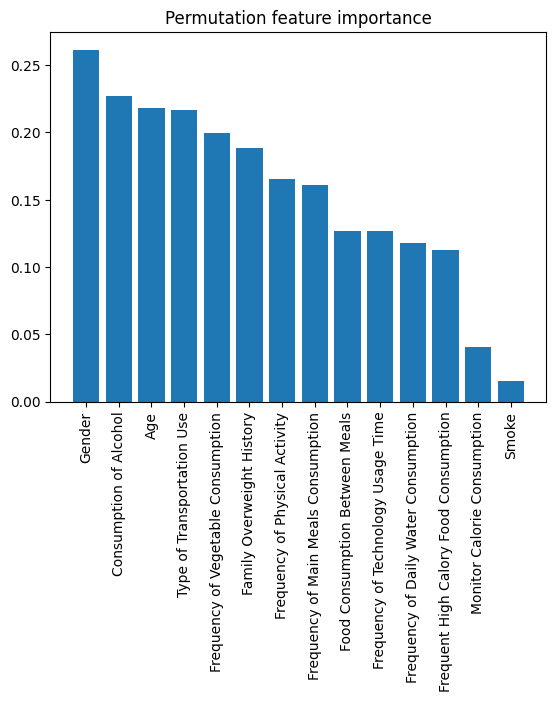

In [ ]:
idx = x_train_age.columns
pimp = permutation_importance(svc_model, x_train_age, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.7208931419457735
Test Precision Score:  0.7112409559875468
Test Recall Score:  0.7208931419457735
Test F1 Score:  0.7010015357508512


                     precision    recall  f1-score   support

Insufficient_Weight       0.74      0.88      0.80        80
      Normal_Weight       0.64      0.34      0.45        85
     Obesity_Type_I       0.65      0.82      0.73       106
    Obesity_Type_II       0.72      0.96      0.82        89
   Obesity_Type_III       0.87      1.00      0.93        97
 Overweight_Level_I       0.63      0.47      0.54        83
Overweight_Level_II       0.70      0.52      0.60        87

           accuracy                           0.72       627
          macro avg       0.71      0.71      0.70       627
       weighted avg       0.71      0.72      0.70       627





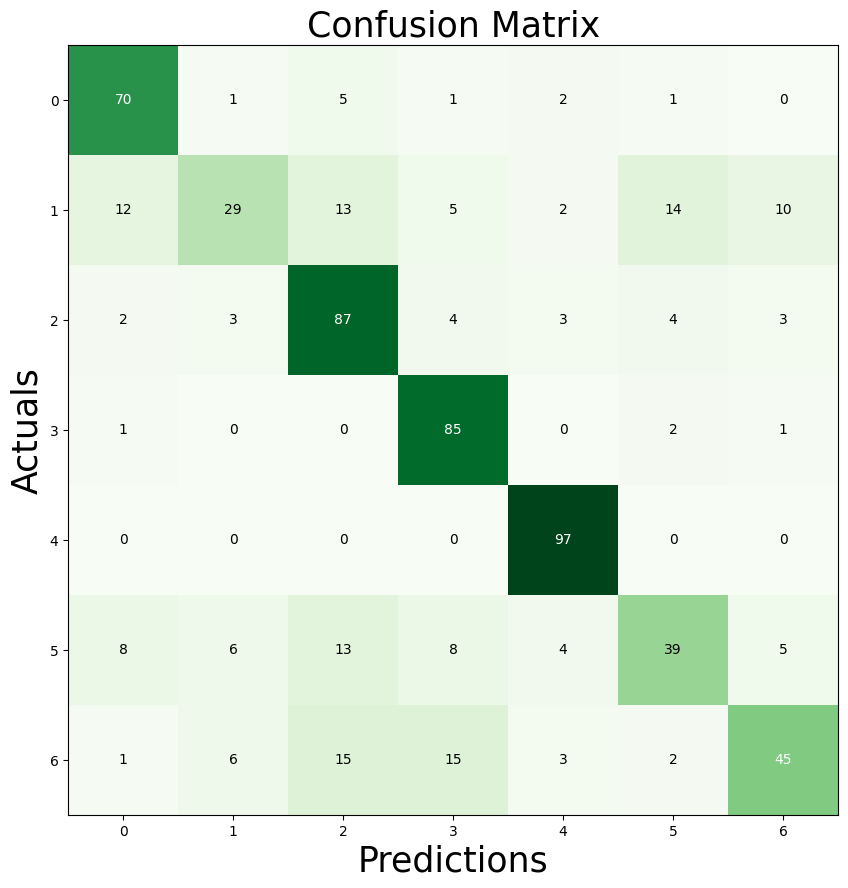

In [ ]:
#applying K Nearest Neighbour Classification

knn_model = KNeighborsClassifier()
knn_model.fit(x_train_age, y_train.values.ravel())

#working on test data
knn_test_predict = knn_model.predict(x_test_age)
knn_test_accuracy = accuracy_score(y_test, knn_test_predict)
knn_test_precision = precision_score(y_test, knn_test_predict, average = "weighted")
knn_test_recall = recall_score(y_test, knn_test_predict, average = "weighted")
knn_test_f1 = f1_score(y_test, knn_test_predict, average = "weighted")

print("Test Accuracy Score: ",knn_test_accuracy)
print("Test Precision Score: ",knn_test_precision)
print("Test Recall Score: ",knn_test_recall)
print("Test F1 Score: ",knn_test_f1)
print("\n")

print(classification_report(y_test, knn_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = knn_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.7639553429027113
Test Precision Score:  0.7606066956550931
Test Recall Score:  0.7639553429027113
Test F1 Score:  0.7566559597145094


                     precision    recall  f1-score   support

Insufficient_Weight       0.77      0.88      0.82        80
      Normal_Weight       0.72      0.45      0.55        85
     Obesity_Type_I       0.79      0.77      0.78       106
    Obesity_Type_II       0.82      0.90      0.86        89
   Obesity_Type_III       0.91      1.00      0.95        97
 Overweight_Level_I       0.59      0.65      0.62        83
Overweight_Level_II       0.71      0.67      0.69        87

           accuracy                           0.76       627
          macro avg       0.76      0.76      0.75       627
       weighted avg       0.76      0.76      0.76       627





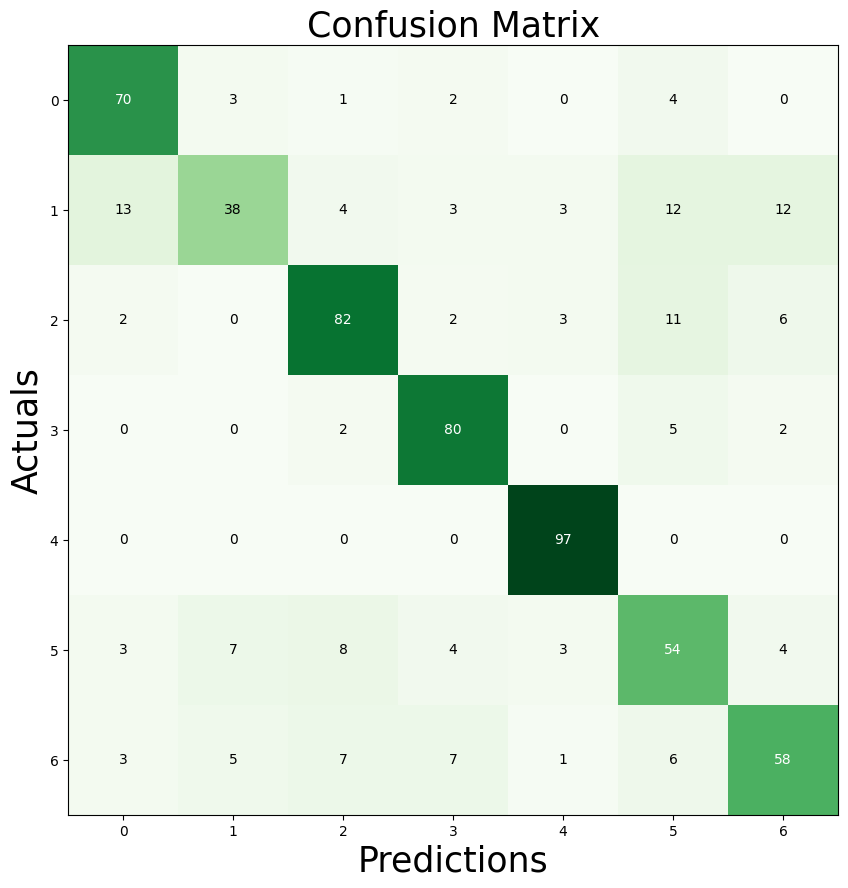

In [ ]:
#applying the best fitted hyperparameters (K Nearest Neighbour Model)

knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1, weights = 'uniform')
knn_model.fit(x_train_age, y_train.values.ravel())

#working on test data
knn_test_predict = knn_model.predict(x_test_age)
knn_test_accuracy = accuracy_score(y_test, knn_test_predict)
knn_test_precision = precision_score(y_test, knn_test_predict, average = "weighted")
knn_test_recall = recall_score(y_test, knn_test_predict, average = "weighted")
knn_test_f1 = f1_score(y_test, knn_test_predict, average = "weighted")

print("Test Accuracy Score: ",knn_test_accuracy)
print("Test Precision Score: ",knn_test_precision)
print("Test Recall Score: ",knn_test_recall)
print("Test F1 Score: ",knn_test_f1)
print("\n")

print(classification_report(y_test, knn_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = knn_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

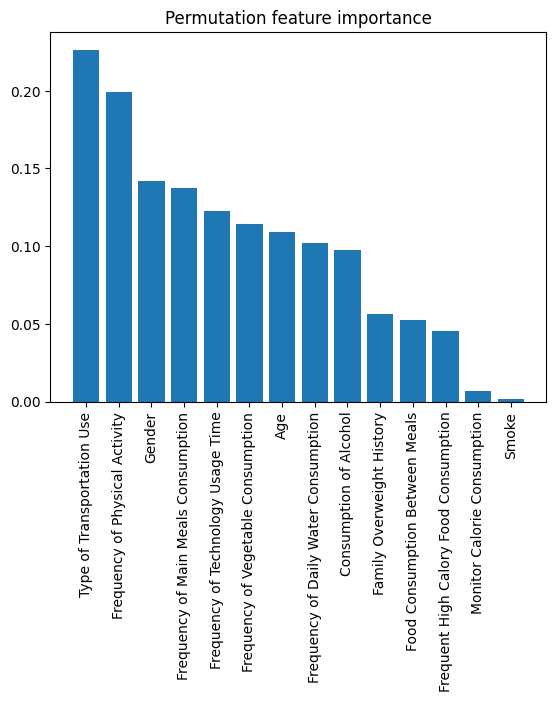

In [ ]:
idx = x_train_age.columns
pimp = permutation_importance(knn_model, x_train_age, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.34609250398724084
Test Precision Score:  0.3231799777949897
Test Recall Score:  0.34609250398724084
Test F1 Score:  0.313108570931028


                     precision    recall  f1-score   support

Insufficient_Weight       0.50      0.21      0.30        80
      Normal_Weight       0.22      0.15      0.18        85
     Obesity_Type_I       0.25      0.45      0.32       106
    Obesity_Type_II       0.34      0.27      0.30        89
   Obesity_Type_III       0.64      1.00      0.78        97
 Overweight_Level_I       0.17      0.14      0.15        83
Overweight_Level_II       0.13      0.07      0.09        87

           accuracy                           0.35       627
          macro avg       0.32      0.33      0.30       627
       weighted avg       0.32      0.35      0.31       627





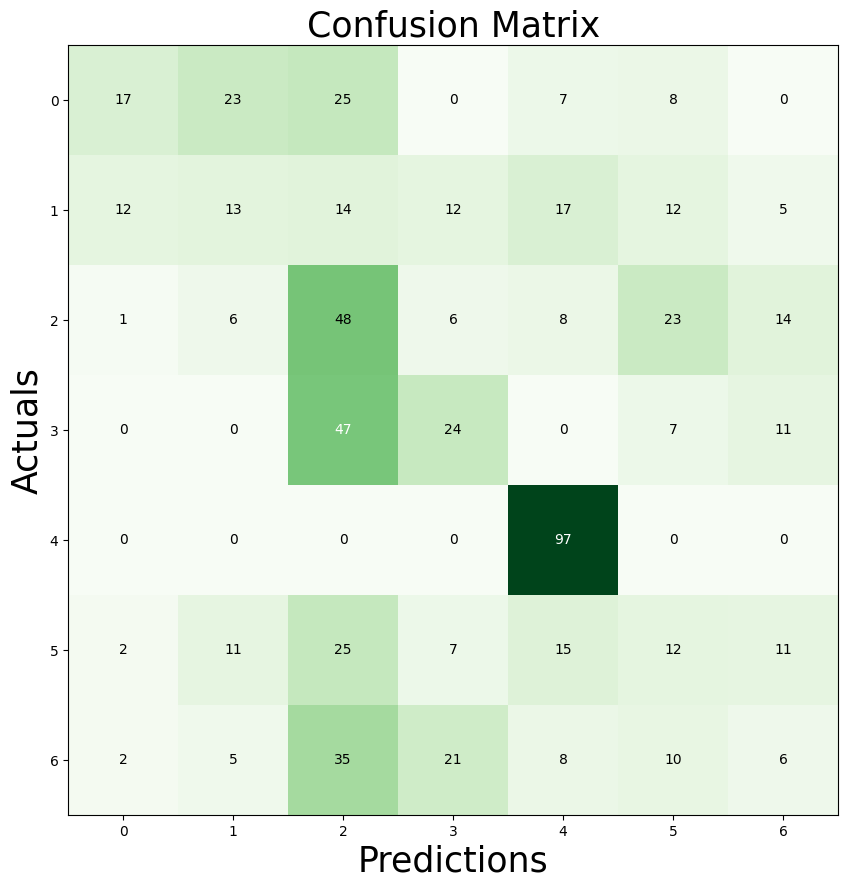

In [ ]:
#applying Ada Boost Classification

abc_model = AdaBoostClassifier()
abc_model.fit(x_train_age, y_train.values.ravel())

#working on test data
abc_test_predict = abc_model.predict(x_test_age)
abc_test_accuracy = accuracy_score(y_test, abc_test_predict)
abc_test_precision = precision_score(y_test, abc_test_predict, average = "weighted")
abc_test_recall = recall_score(y_test, abc_test_predict, average = "weighted")
abc_test_f1 = f1_score(y_test, abc_test_predict, average = "weighted")

print("Test Accuracy Score: ",abc_test_accuracy)
print("Test Precision Score: ",abc_test_precision)
print("Test Recall Score: ",abc_test_recall)
print("Test F1 Score: ",abc_test_f1)
print("\n")

print(classification_report(y_test, abc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = abc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.8325358851674641
Test Precision Score:  0.830509436452721
Test Recall Score:  0.8325358851674641
Test F1 Score:  0.8297526020053118


                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.91      0.89        80
      Normal_Weight       0.71      0.66      0.68        85
     Obesity_Type_I       0.89      0.83      0.86       106
    Obesity_Type_II       0.83      0.98      0.90        89
   Obesity_Type_III       0.96      1.00      0.98        97
 Overweight_Level_I       0.72      0.72      0.72        83
Overweight_Level_II       0.80      0.70      0.75        87

           accuracy                           0.83       627
          macro avg       0.83      0.83      0.83       627
       weighted avg       0.83      0.83      0.83       627





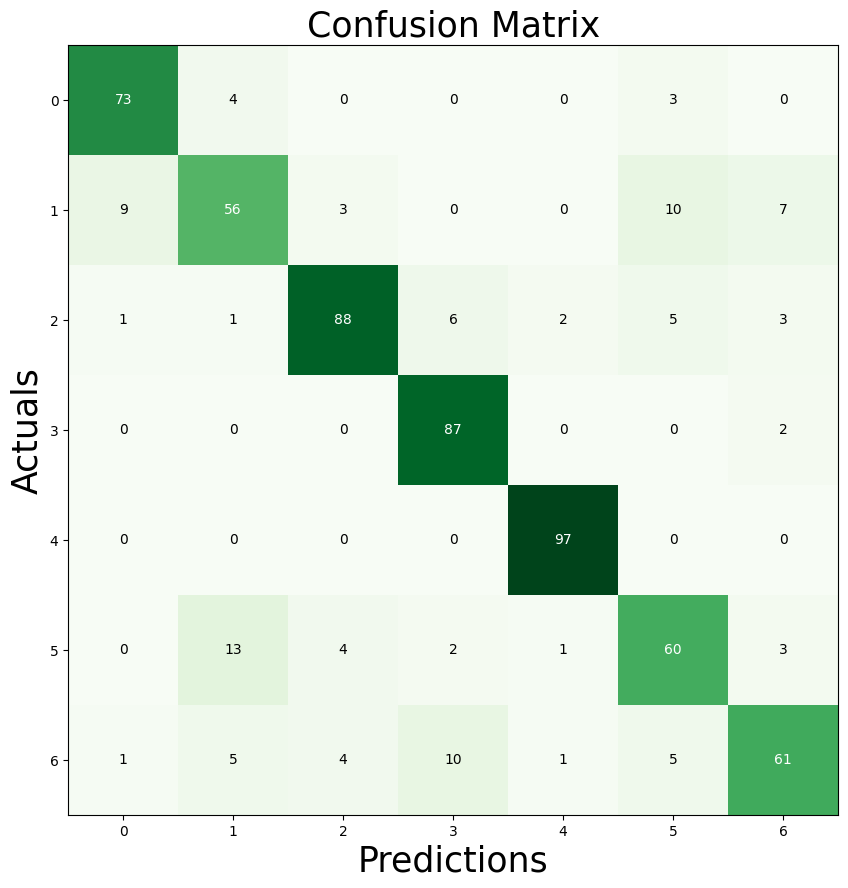

In [ ]:
#applying the best fitted hyperparameters (Ada Boost Model)

abc_model = AdaBoostClassifier(learning_rate = 0.01, n_estimators = 7, estimator = random_forest_model)
abc_model.fit(x_train_age, y_train.values.ravel())

#working on test data
abc_test_predict = abc_model.predict(x_test_age)
abc_test_accuracy = accuracy_score(y_test, abc_test_predict)
abc_test_precision = precision_score(y_test, abc_test_predict, average = "weighted")
abc_test_recall = recall_score(y_test, abc_test_predict, average = "weighted")
abc_test_f1 = f1_score(y_test, abc_test_predict, average = "weighted")

print("Test Accuracy Score: ",abc_test_accuracy)
print("Test Precision Score: ",abc_test_precision)
print("Test Recall Score: ",abc_test_recall)
print("Test F1 Score: ",abc_test_f1)
print("\n")

print(classification_report(y_test, abc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = abc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

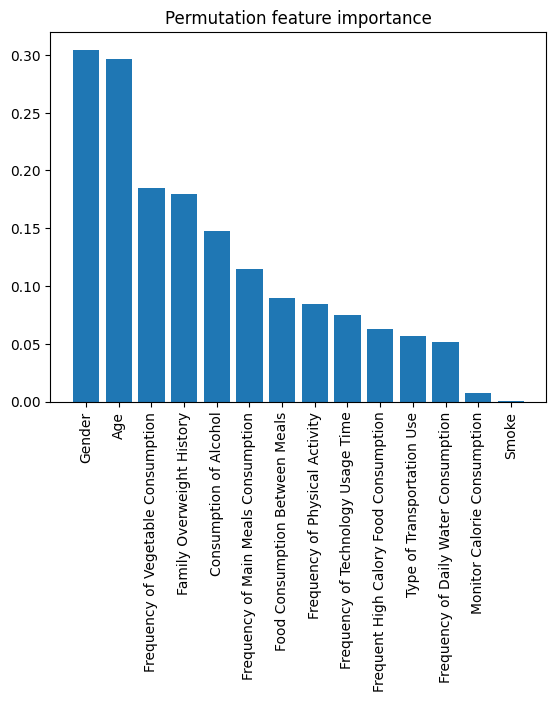

In [ ]:
idx = x_train_age.columns
pimp = permutation_importance(abc_model, x_train_age, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.7639553429027113
Test Precision Score:  0.7599186019231517
Test Recall Score:  0.7639553429027113
Test F1 Score:  0.7576555059672259


                     precision    recall  f1-score   support

Insufficient_Weight       0.81      0.85      0.83        80
      Normal_Weight       0.67      0.58      0.62        85
     Obesity_Type_I       0.70      0.74      0.72       106
    Obesity_Type_II       0.74      0.97      0.84        89
   Obesity_Type_III       0.96      1.00      0.98        97
 Overweight_Level_I       0.69      0.60      0.65        83
Overweight_Level_II       0.73      0.59      0.65        87

           accuracy                           0.76       627
          macro avg       0.76      0.76      0.75       627
       weighted avg       0.76      0.76      0.76       627





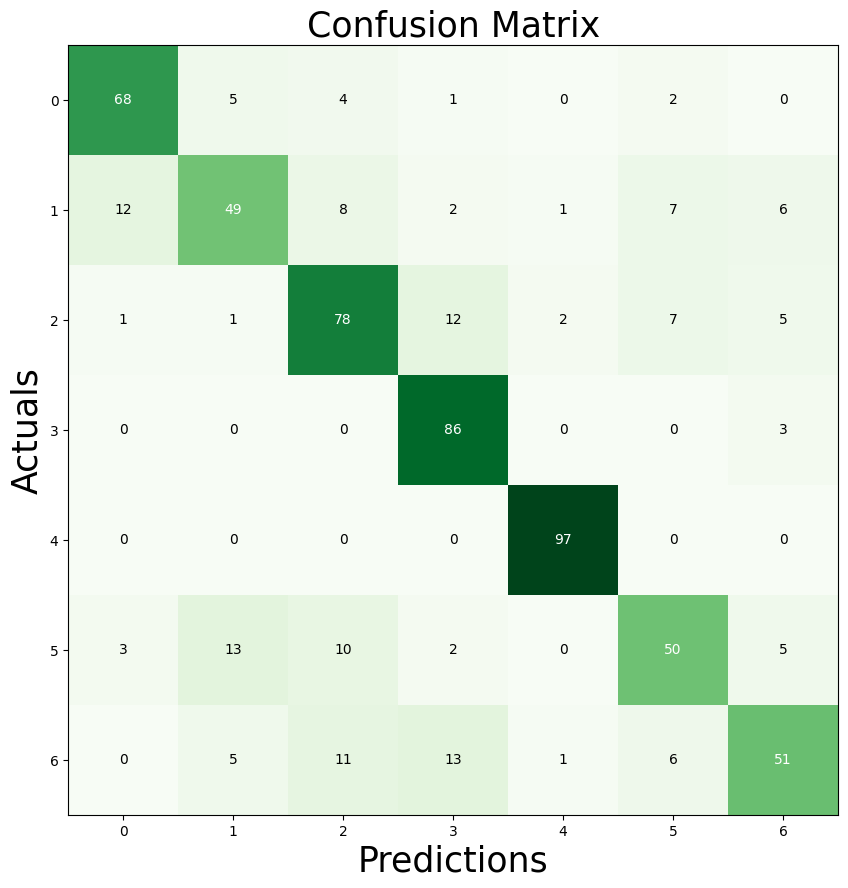

In [ ]:
#applying Gradient Boosting Classification

gb_model = GradientBoostingClassifier()
gb_model.fit(x_train_age, y_train.values.ravel())

#working on test data
gb_test_predict = gb_model.predict(x_test_age)
gb_test_accuracy = accuracy_score(y_test, gb_test_predict)
gb_test_precision = precision_score(y_test, gb_test_predict, average = "weighted")
gb_test_recall = recall_score(y_test, gb_test_predict, average = "weighted")
gb_test_f1 = f1_score(y_test, gb_test_predict, average = "weighted")

print("Test Accuracy Score: ",gb_test_accuracy)
print("Test Precision Score: ",gb_test_precision)
print("Test Recall Score: ",gb_test_recall)
print("Test F1 Score: ",gb_test_f1)
print("\n")

print(classification_report(y_test, gb_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = gb_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.8181818181818182
Test Precision Score:  0.8186009634478274
Test Recall Score:  0.8181818181818182
Test F1 Score:  0.8150796746860333


                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.90      0.87        80
      Normal_Weight       0.67      0.71      0.69        85
     Obesity_Type_I       0.85      0.82      0.84       106
    Obesity_Type_II       0.81      0.96      0.88        89
   Obesity_Type_III       0.96      1.00      0.98        97
 Overweight_Level_I       0.73      0.70      0.72        83
Overweight_Level_II       0.83      0.62      0.71        87

           accuracy                           0.82       627
          macro avg       0.81      0.81      0.81       627
       weighted avg       0.82      0.82      0.82       627





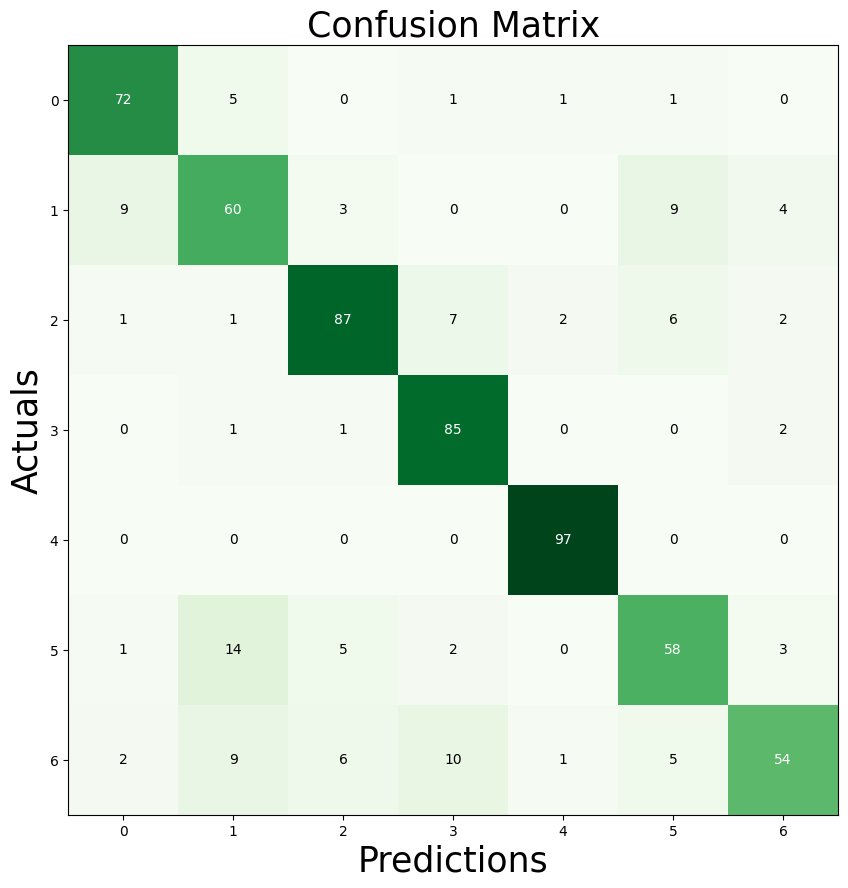

In [ ]:
#applying the best fitted hyperparameters (Gradient Model)

gb_model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 6, n_estimators = 75)
gb_model.fit(x_train_age, y_train.values.ravel())

#working on test data
gb_test_predict = gb_model.predict(x_test_age)
gb_test_accuracy = accuracy_score(y_test, gb_test_predict)
gb_test_precision = precision_score(y_test, gb_test_predict, average = "weighted")
gb_test_recall = recall_score(y_test, gb_test_predict, average = "weighted")
gb_test_f1 = f1_score(y_test, gb_test_predict, average = "weighted")

print("Test Accuracy Score: ",gb_test_accuracy)
print("Test Precision Score: ",gb_test_precision)
print("Test Recall Score: ",gb_test_recall)
print("Test F1 Score: ",gb_test_f1)
print("\n")

print(classification_report(y_test, gb_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = gb_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

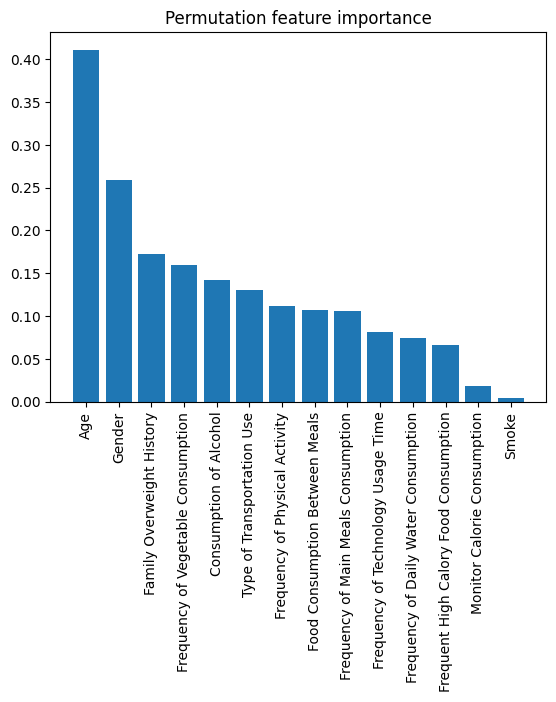

In [ ]:
idx = x_train_age.columns
pimp = permutation_importance(gb_model, x_train_age, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

In [ ]:
x_train_pc = x_train[['Family Overweight History', 'Monitor Calorie Consumption', 'Frequency of Physical Activity', 'Frequency of Technology Usage Time', 'Type of Transportation Use']]
x_test_pc = x_test[['Family Overweight History', 'Monitor Calorie Consumption', 'Frequency of Physical Activity', 'Frequency of Technology Usage Time', 'Type of Transportation Use']]

Test Accuracy Score:  0.41148325358851673
Test Precision Score:  0.41828221618550504
Test Recall Score:  0.41148325358851673
Test F1 Score:  0.37429360795666844


                     precision    recall  f1-score   support

Insufficient_Weight       0.49      0.36      0.42        80
      Normal_Weight       0.62      0.33      0.43        85
     Obesity_Type_I       0.38      0.38      0.38       106
    Obesity_Type_II       0.39      0.48      0.43        89
   Obesity_Type_III       0.40      1.00      0.57        97
 Overweight_Level_I       0.50      0.18      0.27        83
Overweight_Level_II       0.17      0.07      0.10        87

           accuracy                           0.41       627
          macro avg       0.42      0.40      0.37       627
       weighted avg       0.42      0.41      0.37       627





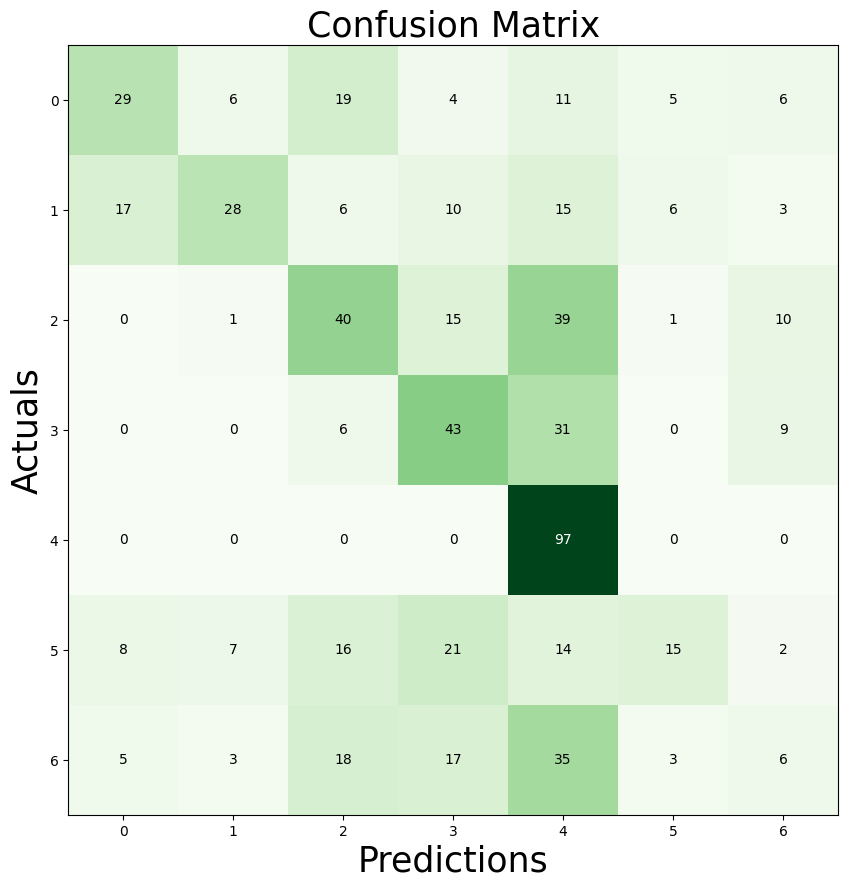

In [ ]:
#applying the best fitted hyperparameters (Decision Tree Model)

decision_tree_model = DecisionTreeClassifier(criterion = 'log_loss', max_depth = 14)
decision_tree_model.fit(x_train_pc, y_train)

#working on test data
decision_tree_test_predict = decision_tree_model.predict(x_test_pc)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_predict)
decision_tree_test_precision = precision_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_recall = recall_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_f1 = f1_score(y_test, decision_tree_test_predict, average = "weighted")

print("Test Accuracy Score: ",decision_tree_test_accuracy)
print("Test Precision Score: ",decision_tree_test_precision)
print("Test Recall Score: ",decision_tree_test_recall)
print("Test F1 Score: ",decision_tree_test_f1)
print("\n")

print(classification_report(y_test, decision_tree_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = decision_tree_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

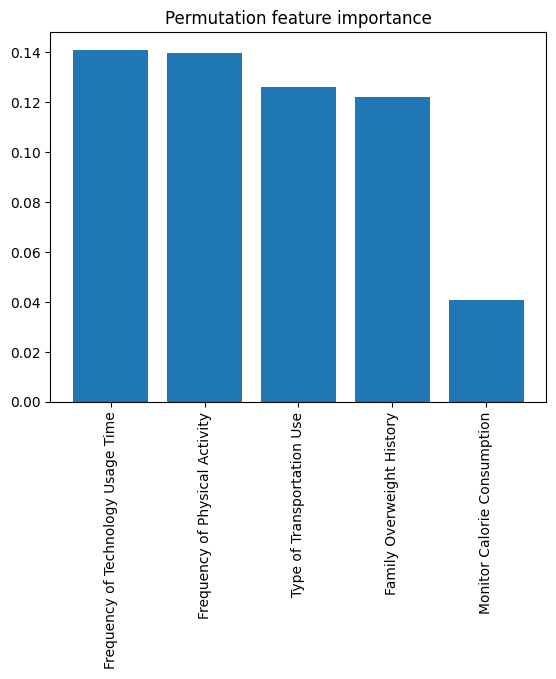

In [ ]:
idx = x_train_pc.columns
pimp = permutation_importance(decision_tree_model, x_train_pc, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.41467304625199364
Test Precision Score:  0.4345099102221078
Test Recall Score:  0.41467304625199364
Test F1 Score:  0.3814590982835377


                     precision    recall  f1-score   support

Insufficient_Weight       0.54      0.35      0.42        80
      Normal_Weight       0.61      0.27      0.37        85
     Obesity_Type_I       0.39      0.37      0.38       106
    Obesity_Type_II       0.40      0.52      0.45        89
   Obesity_Type_III       0.40      1.00      0.57        97
 Overweight_Level_I       0.59      0.24      0.34        83
Overweight_Level_II       0.15      0.08      0.10        87

           accuracy                           0.41       627
          macro avg       0.44      0.40      0.38       627
       weighted avg       0.43      0.41      0.38       627





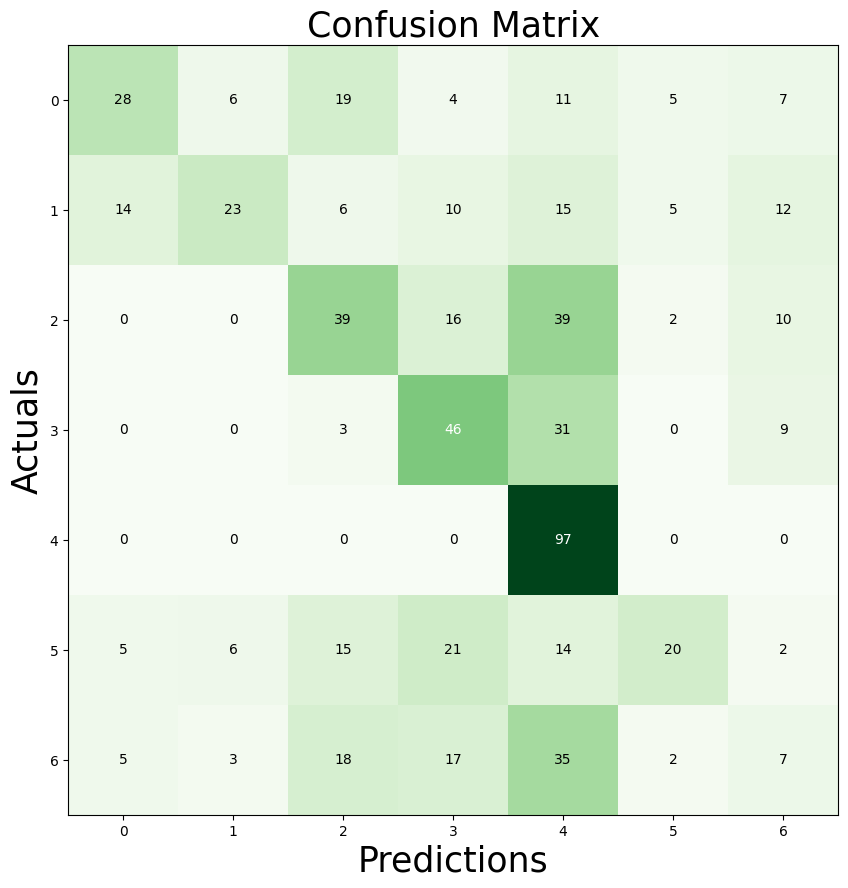

In [ ]:
#applying the best fitted hyperparameters (Random Forest Model)

random_forest_model = RandomForestClassifier(criterion = 'log_loss', max_depth = 13)
random_forest_model.fit(x_train_pc, y_train.values.ravel())

#working on test data
random_forest_test_predict = random_forest_model.predict(x_test_pc)
random_forest_test_accuracy = accuracy_score(y_test, random_forest_test_predict)
random_forest_test_precision = precision_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_recall = recall_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_f1 = f1_score(y_test, random_forest_test_predict, average = "weighted")

print("Test Accuracy Score: ",random_forest_test_accuracy)
print("Test Precision Score: ",random_forest_test_precision)
print("Test Recall Score: ",random_forest_test_recall)
print("Test F1 Score: ",random_forest_test_f1)
print("\n")

print(classification_report(y_test, random_forest_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases (instances)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = random_forest_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

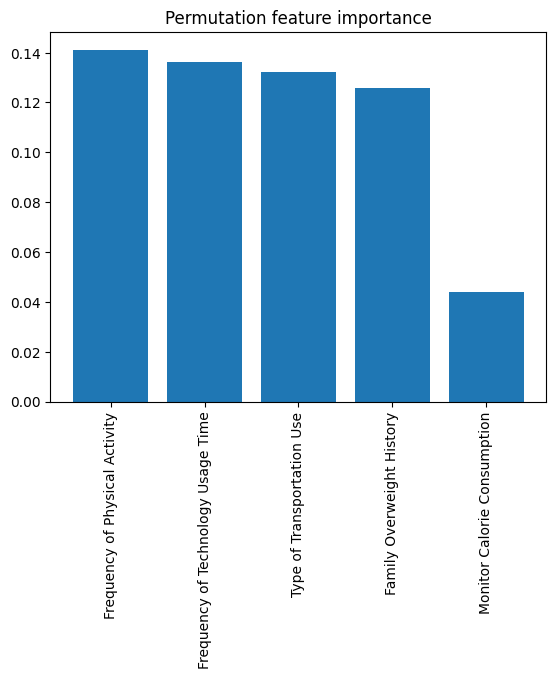

In [ ]:
idx = x_train_pc.columns
pimp = permutation_importance(random_forest_model, x_train_pc, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.3939393939393939
Test Precision Score:  0.4170717032296331
Test Recall Score:  0.3939393939393939
Test F1 Score:  0.3570638800990686


                     precision    recall  f1-score   support

Insufficient_Weight       0.48      0.39      0.43        80
      Normal_Weight       0.48      0.24      0.31        85
     Obesity_Type_I       0.38      0.31      0.34       106
    Obesity_Type_II       0.39      0.48      0.43        89
   Obesity_Type_III       0.39      1.00      0.56        97
 Overweight_Level_I       0.67      0.17      0.27        83
Overweight_Level_II       0.16      0.10      0.13        87

           accuracy                           0.39       627
          macro avg       0.42      0.38      0.35       627
       weighted avg       0.42      0.39      0.36       627





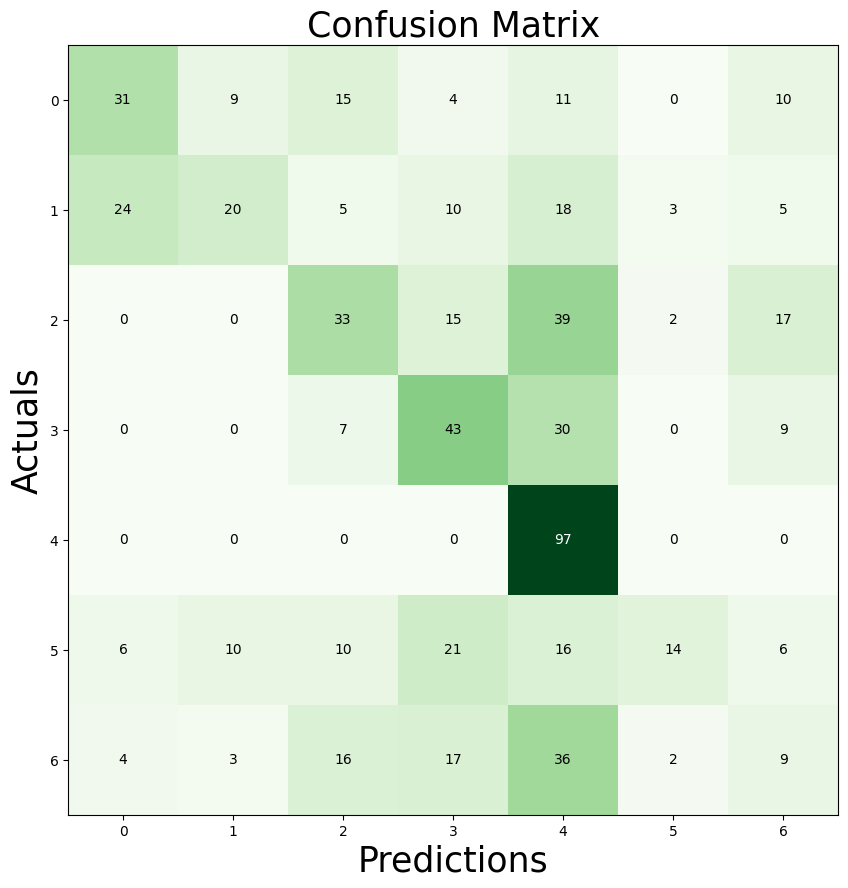

In [ ]:
#applying the best fitted hyperparameters (Support Vector Model)

svc_model = SVC(degree = 5, gamma = 'auto', kernel = 'poly')
svc_model.fit(x_train_pc, y_train.values.ravel())

#working on test data
svc_test_predict = svc_model.predict(x_test_pc)
svc_test_accuracy = accuracy_score(y_test, svc_test_predict)
svc_test_precision = precision_score(y_test, svc_test_predict, average = "weighted")
svc_test_recall = recall_score(y_test, svc_test_predict, average = "weighted")
svc_test_f1 = f1_score(y_test, svc_test_predict, average = "weighted")

print("Test Accuracy Score: ",svc_test_accuracy)
print("Test Precision Score: ",svc_test_precision)
print("Test Recall Score: ",svc_test_recall)
print("Test F1 Score: ",svc_test_f1)
print("\n")

print(classification_report(y_test, svc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = svc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

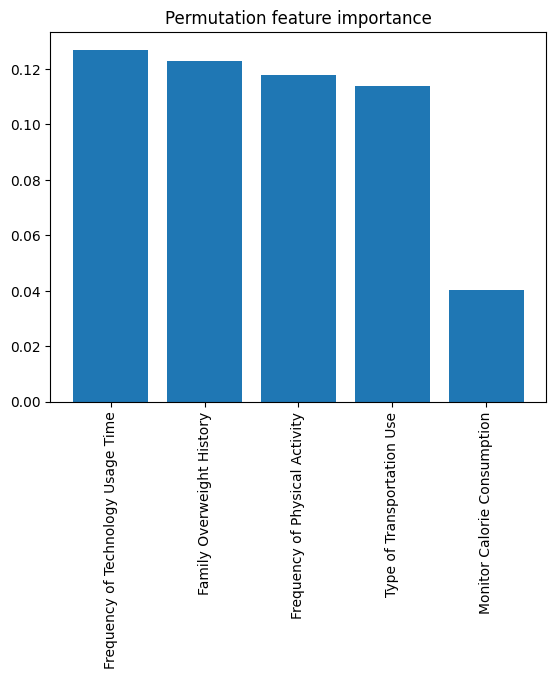

In [ ]:
idx = x_train_pc.columns
pimp = permutation_importance(svc_model, x_train_pc, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.2503987240829346
Test Precision Score:  0.28043665023781117
Test Recall Score:  0.2503987240829346
Test F1 Score:  0.23667498315017005


                     precision    recall  f1-score   support

Insufficient_Weight       0.25      0.42      0.32        80
      Normal_Weight       0.16      0.34      0.22        85
     Obesity_Type_I       0.29      0.41      0.34       106
    Obesity_Type_II       0.33      0.08      0.13        89
   Obesity_Type_III       0.53      0.27      0.36        97
 Overweight_Level_I       0.29      0.18      0.22        83
Overweight_Level_II       0.07      0.03      0.05        87

           accuracy                           0.25       627
          macro avg       0.28      0.25      0.23       627
       weighted avg       0.28      0.25      0.24       627





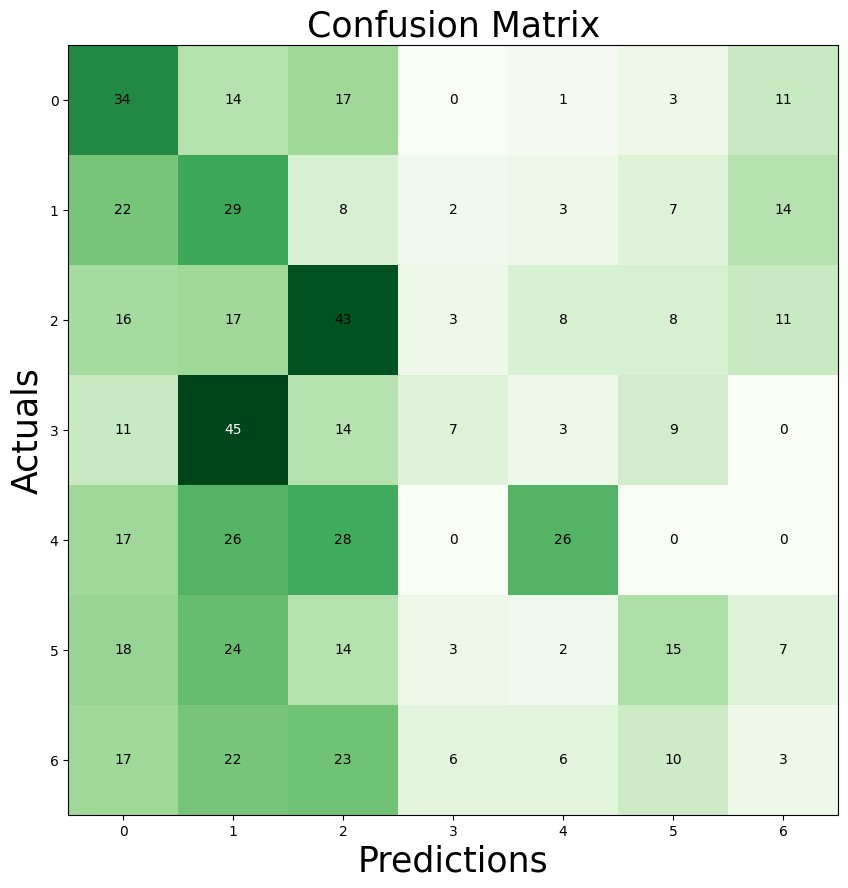

In [ ]:
#applying the best fitted hyperparameters (K Nearest Neighbour Model)

knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1, weights = 'uniform')
knn_model.fit(x_train_pc, y_train.values.ravel())

#working on test data
knn_test_predict = knn_model.predict(x_test_pc)
knn_test_accuracy = accuracy_score(y_test, knn_test_predict)
knn_test_precision = precision_score(y_test, knn_test_predict, average = "weighted")
knn_test_recall = recall_score(y_test, knn_test_predict, average = "weighted")
knn_test_f1 = f1_score(y_test, knn_test_predict, average = "weighted")

print("Test Accuracy Score: ",knn_test_accuracy)
print("Test Precision Score: ",knn_test_precision)
print("Test Recall Score: ",knn_test_recall)
print("Test F1 Score: ",knn_test_f1)
print("\n")

print(classification_report(y_test, knn_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = knn_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

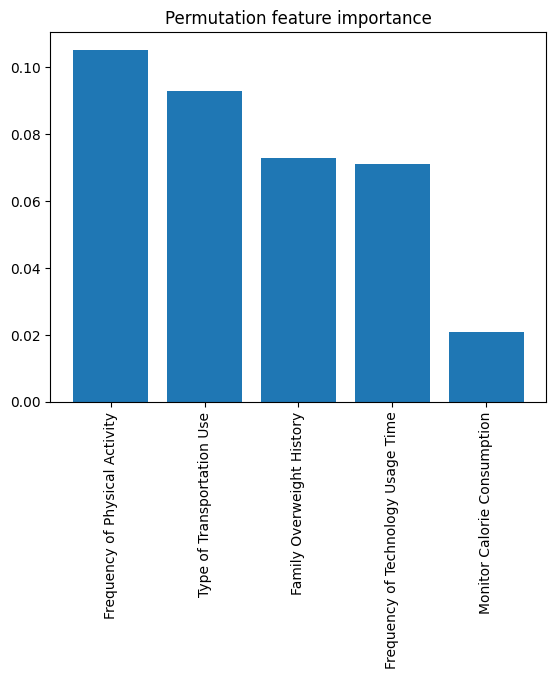

In [ ]:
idx = x_train_pc.columns
pimp = permutation_importance(knn_model, x_train_pc, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.41626794258373206
Test Precision Score:  0.43869129992570927
Test Recall Score:  0.41626794258373206
Test F1 Score:  0.38412056055438665


                     precision    recall  f1-score   support

Insufficient_Weight       0.52      0.36      0.43        80
      Normal_Weight       0.64      0.27      0.38        85
     Obesity_Type_I       0.38      0.38      0.38       106
    Obesity_Type_II       0.39      0.48      0.43        89
   Obesity_Type_III       0.40      1.00      0.57        97
 Overweight_Level_I       0.61      0.27      0.37        83
Overweight_Level_II       0.16      0.08      0.11        87

           accuracy                           0.42       627
          macro avg       0.44      0.41      0.38       627
       weighted avg       0.44      0.42      0.38       627





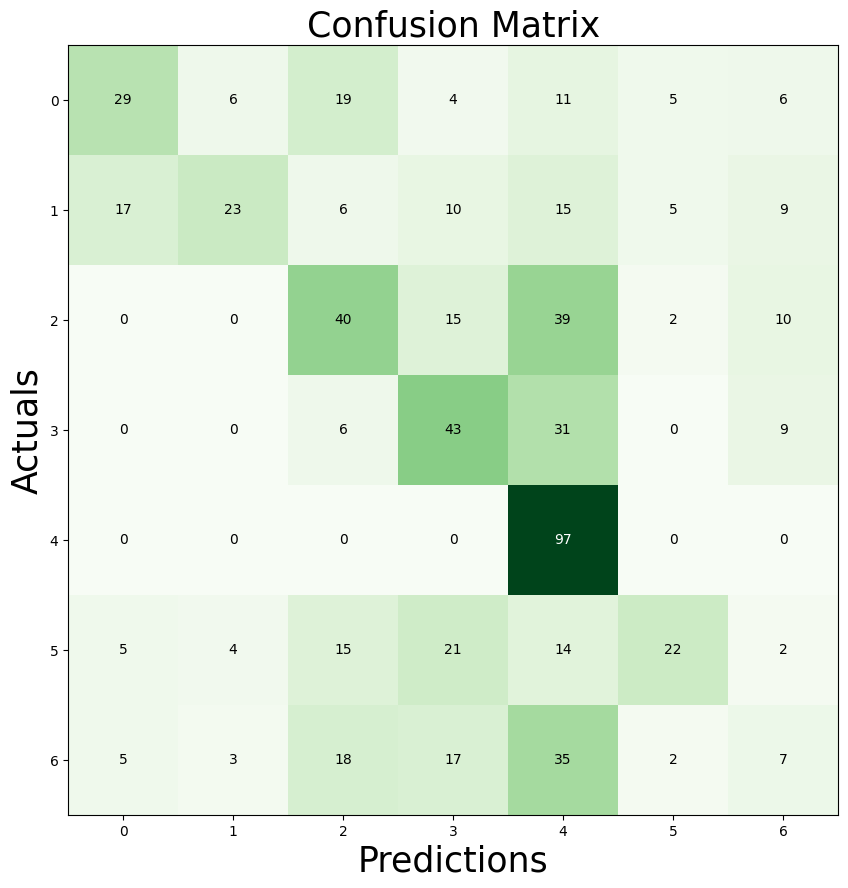

In [ ]:
#applying the best fitted hyperparameters (Ada Boost Model)

abc_model = AdaBoostClassifier(learning_rate = 0.01, n_estimators = 7, estimator = random_forest_model)
abc_model.fit(x_train_pc, y_train.values.ravel())

#working on test data
abc_test_predict = abc_model.predict(x_test_pc)
abc_test_accuracy = accuracy_score(y_test, abc_test_predict)
abc_test_precision = precision_score(y_test, abc_test_predict, average = "weighted")
abc_test_recall = recall_score(y_test, abc_test_predict, average = "weighted")
abc_test_f1 = f1_score(y_test, abc_test_predict, average = "weighted")

print("Test Accuracy Score: ",abc_test_accuracy)
print("Test Precision Score: ",abc_test_precision)
print("Test Recall Score: ",abc_test_recall)
print("Test F1 Score: ",abc_test_f1)
print("\n")

print(classification_report(y_test, abc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = abc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

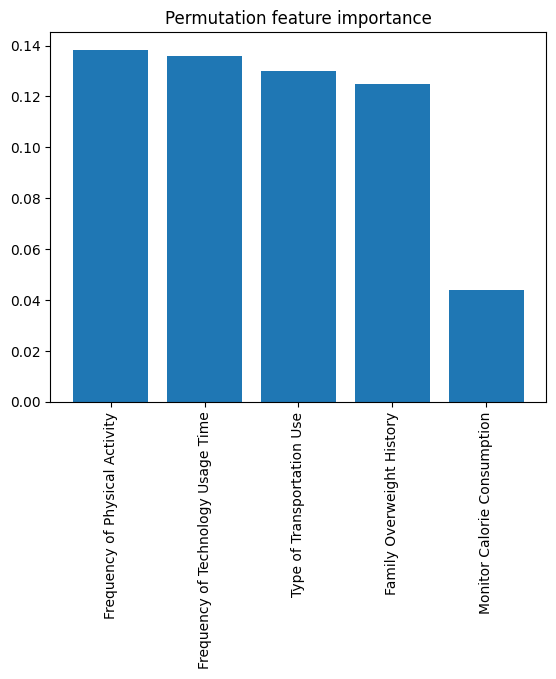

In [ ]:
idx = x_train_pc.columns
pimp = permutation_importance(abc_model, x_train_pc, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.4130781499202552
Test Precision Score:  0.4400418025097497
Test Recall Score:  0.4130781499202552
Test F1 Score:  0.38447152721329436


                     precision    recall  f1-score   support

Insufficient_Weight       0.52      0.36      0.43        80
      Normal_Weight       0.63      0.34      0.44        85
     Obesity_Type_I       0.39      0.31      0.35       106
    Obesity_Type_II       0.39      0.48      0.43        89
   Obesity_Type_III       0.40      1.00      0.57        97
 Overweight_Level_I       0.63      0.23      0.34        83
Overweight_Level_II       0.16      0.10      0.12        87

           accuracy                           0.41       627
          macro avg       0.45      0.40      0.38       627
       weighted avg       0.44      0.41      0.38       627





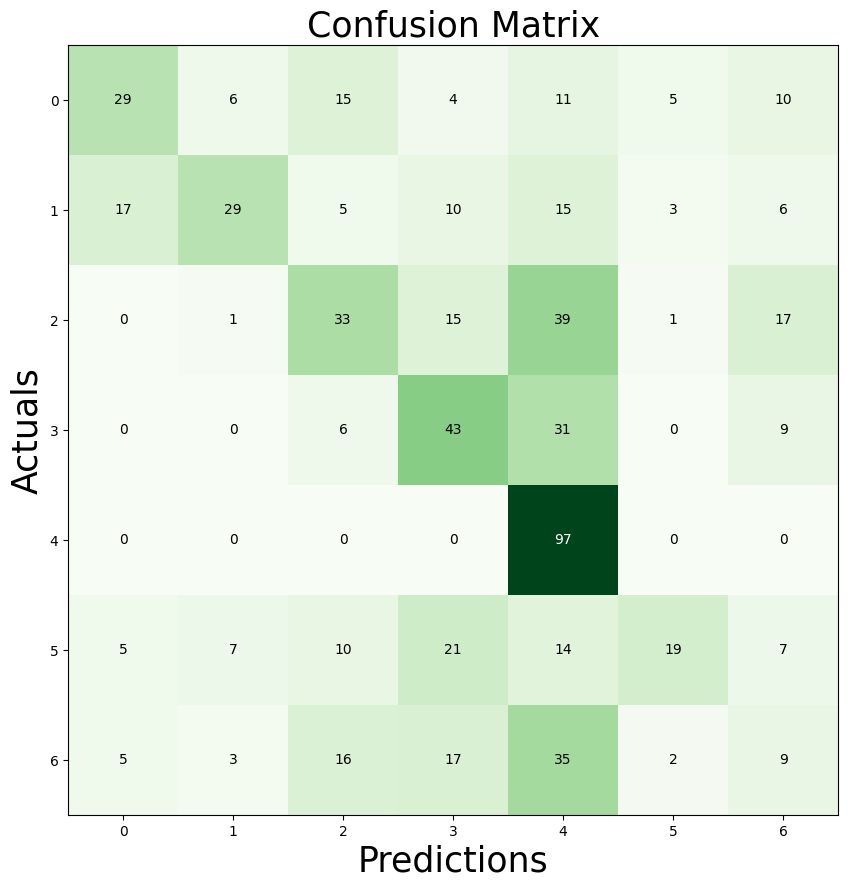

In [ ]:
#applying the best fitted hyperparameters (Ada Boost Model)

abc_model = AdaBoostClassifier(learning_rate = 0.01, n_estimators = 7, estimator = random_forest_model)
abc_model.fit(x_train_pc, y_train.values.ravel())

#working on test data
abc_test_predict = abc_model.predict(x_test_pc)
abc_test_accuracy = accuracy_score(y_test, abc_test_predict)
abc_test_precision = precision_score(y_test, abc_test_predict, average = "weighted")
abc_test_recall = recall_score(y_test, abc_test_predict, average = "weighted")
abc_test_f1 = f1_score(y_test, abc_test_predict, average = "weighted")

print("Test Accuracy Score: ",abc_test_accuracy)
print("Test Precision Score: ",abc_test_precision)
print("Test Recall Score: ",abc_test_recall)
print("Test F1 Score: ",abc_test_f1)
print("\n")

print(classification_report(y_test, abc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = abc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

Test Accuracy Score:  0.41148325358851673
Test Precision Score:  0.42437333522913273
Test Recall Score:  0.41148325358851673
Test F1 Score:  0.37683682582279404


                     precision    recall  f1-score   support

Insufficient_Weight       0.52      0.33      0.40        80
      Normal_Weight       0.55      0.33      0.41        85
     Obesity_Type_I       0.39      0.38      0.38       106
    Obesity_Type_II       0.39      0.48      0.43        89
   Obesity_Type_III       0.40      1.00      0.57        97
 Overweight_Level_I       0.59      0.20      0.30        83
Overweight_Level_II       0.16      0.08      0.11        87

           accuracy                           0.41       627
          macro avg       0.43      0.40      0.37       627
       weighted avg       0.42      0.41      0.38       627





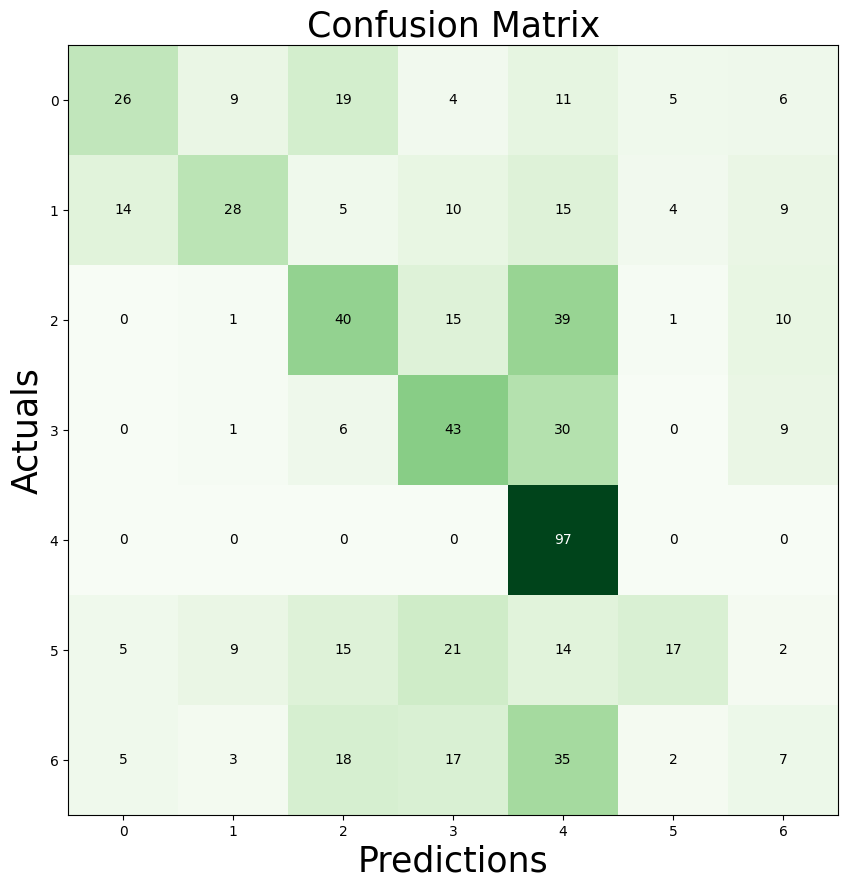

In [ ]:
#applying the best fitted hyperparameters (Gradient Model)

gb_model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 6, n_estimators = 75)
gb_model.fit(x_train_pc, y_train.values.ravel())

#working on test data
gb_test_predict = gb_model.predict(x_test_pc)
gb_test_accuracy = accuracy_score(y_test, gb_test_predict)
gb_test_precision = precision_score(y_test, gb_test_predict, average = "weighted")
gb_test_recall = recall_score(y_test, gb_test_predict, average = "weighted")
gb_test_f1 = f1_score(y_test, gb_test_predict, average = "weighted")

print("Test Accuracy Score: ",gb_test_accuracy)
print("Test Precision Score: ",gb_test_precision)
print("Test Recall Score: ",gb_test_recall)
print("Test F1 Score: ",gb_test_f1)
print("\n")

print(classification_report(y_test, gb_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = gb_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

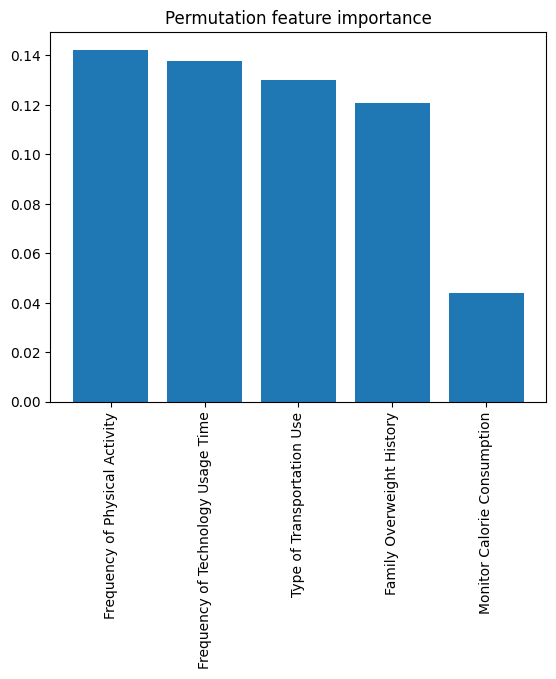

In [ ]:
idx = x_train_pc.columns
pimp = permutation_importance(gb_model, x_train_pc, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

In [ ]:
x_train_eh = x_train[['Frequent High Calory Food Consumption', 'Frequency of Vegetable Consumption', 'Frequency of Main Meals Consumption', 'Food Consumption Between Meals', 'Smoke', 'Frequency of Daily Water Consumption', 'Consumption of Alcohol']]
x_test_eh = x_test[['Frequent High Calory Food Consumption', 'Frequency of Vegetable Consumption', 'Frequency of Main Meals Consumption', 'Food Consumption Between Meals', 'Smoke', 'Frequency of Daily Water Consumption', 'Consumption of Alcohol']]

Test Accuracy Score:  0.5103668261562998
Test Precision Score:  0.49759470092342417
Test Recall Score:  0.5103668261562998
Test F1 Score:  0.48253960663570655


                     precision    recall  f1-score   support

Insufficient_Weight       0.62      0.53      0.57        80
      Normal_Weight       0.51      0.34      0.41        85
     Obesity_Type_I       0.41      0.58      0.48       106
    Obesity_Type_II       0.55      0.61      0.57        89
   Obesity_Type_III       0.61      1.00      0.75        97
 Overweight_Level_I       0.33      0.20      0.25        83
Overweight_Level_II       0.47      0.22      0.30        87

           accuracy                           0.51       627
          macro avg       0.50      0.50      0.48       627
       weighted avg       0.50      0.51      0.48       627





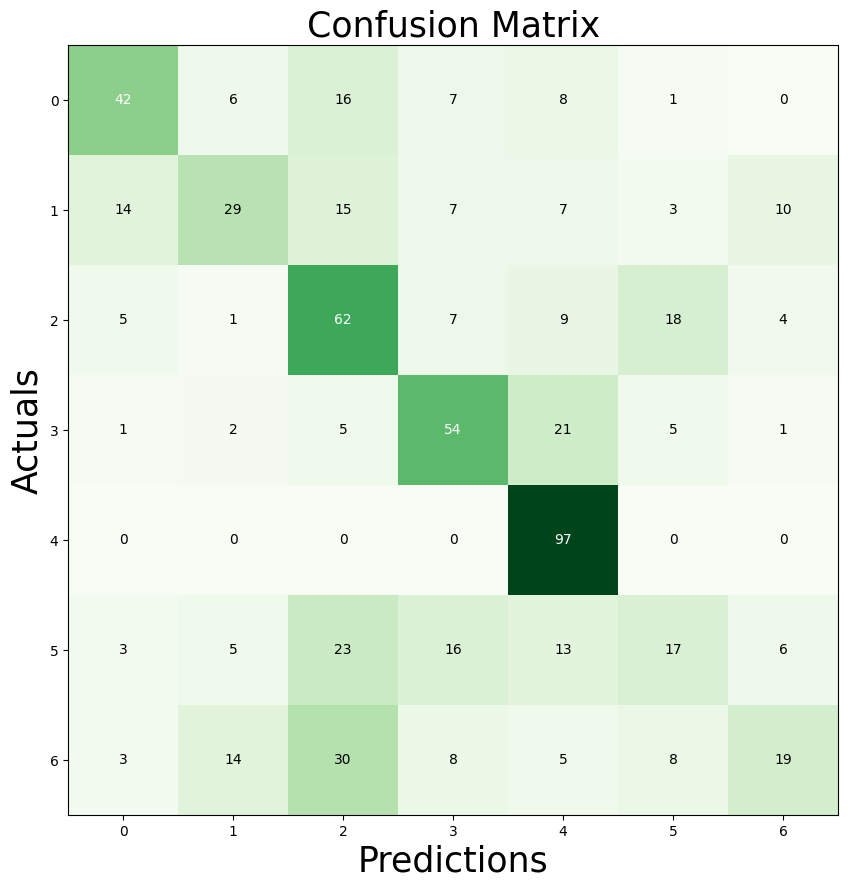

In [ ]:
#applying the best fitted hyperparameters (Decision Tree Model)

decision_tree_model = DecisionTreeClassifier(criterion = 'log_loss', max_depth = 14)
decision_tree_model.fit(x_train_eh, y_train)

#working on test data
decision_tree_test_predict = decision_tree_model.predict(x_test_eh)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_predict)
decision_tree_test_precision = precision_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_recall = recall_score(y_test, decision_tree_test_predict, average = "weighted")
decision_tree_test_f1 = f1_score(y_test, decision_tree_test_predict, average = "weighted")

print("Test Accuracy Score: ",decision_tree_test_accuracy)
print("Test Precision Score: ",decision_tree_test_precision)
print("Test Recall Score: ",decision_tree_test_recall)
print("Test F1 Score: ",decision_tree_test_f1)
print("\n")

print(classification_report(y_test, decision_tree_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = decision_tree_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

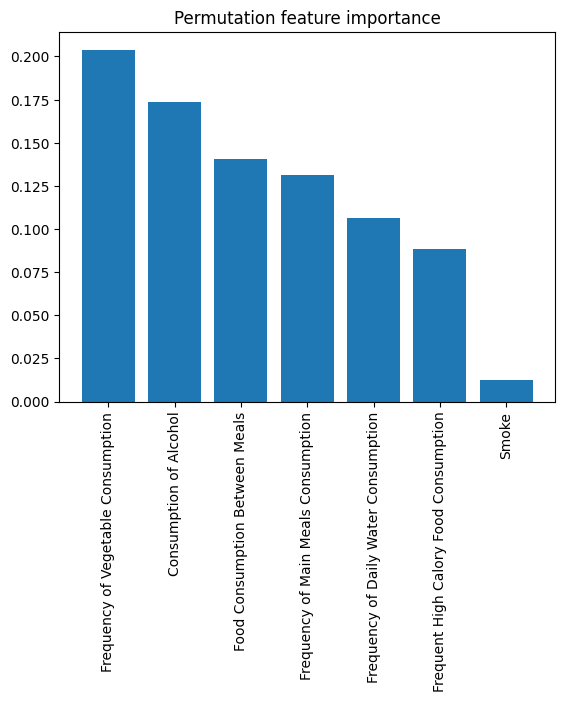

In [ ]:
idx = x_train_eh.columns
pimp = permutation_importance(decision_tree_model, x_train_eh, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.5151515151515151
Test Precision Score:  0.5127548135995991
Test Recall Score:  0.5151515151515151
Test F1 Score:  0.4904036684685226


                     precision    recall  f1-score   support

Insufficient_Weight       0.65      0.53      0.58        80
      Normal_Weight       0.57      0.32      0.41        85
     Obesity_Type_I       0.40      0.57      0.47       106
    Obesity_Type_II       0.52      0.62      0.56        89
   Obesity_Type_III       0.60      1.00      0.75        97
 Overweight_Level_I       0.35      0.23      0.28        83
Overweight_Level_II       0.51      0.26      0.35        87

           accuracy                           0.52       627
          macro avg       0.52      0.50      0.49       627
       weighted avg       0.51      0.52      0.49       627





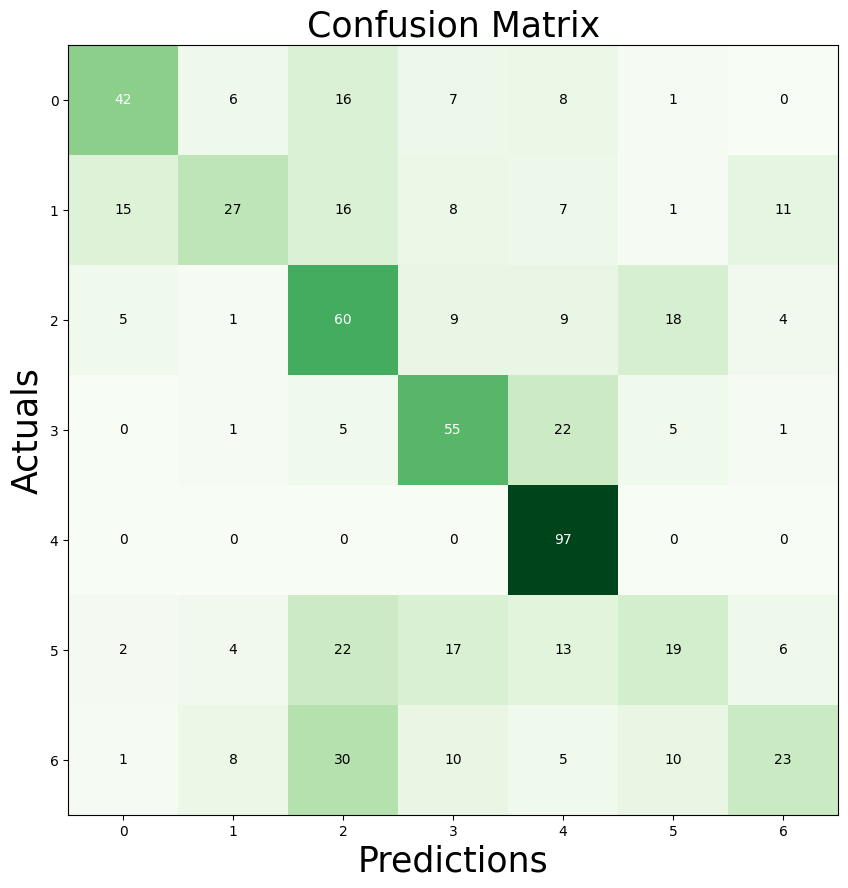

In [ ]:
#applying the best fitted hyperparameters (Random Forest Model)

random_forest_model = RandomForestClassifier(criterion = 'log_loss', max_depth = 13)
random_forest_model.fit(x_train_eh, y_train.values.ravel())

#working on test data
random_forest_test_predict = random_forest_model.predict(x_test_eh)
random_forest_test_accuracy = accuracy_score(y_test, random_forest_test_predict)
random_forest_test_precision = precision_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_recall = recall_score(y_test, random_forest_test_predict, average = "weighted")
random_forest_test_f1 = f1_score(y_test, random_forest_test_predict, average = "weighted")

print("Test Accuracy Score: ",random_forest_test_accuracy)
print("Test Precision Score: ",random_forest_test_precision)
print("Test Recall Score: ",random_forest_test_recall)
print("Test F1 Score: ",random_forest_test_f1)
print("\n")

print(classification_report(y_test, random_forest_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases (instances)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = random_forest_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

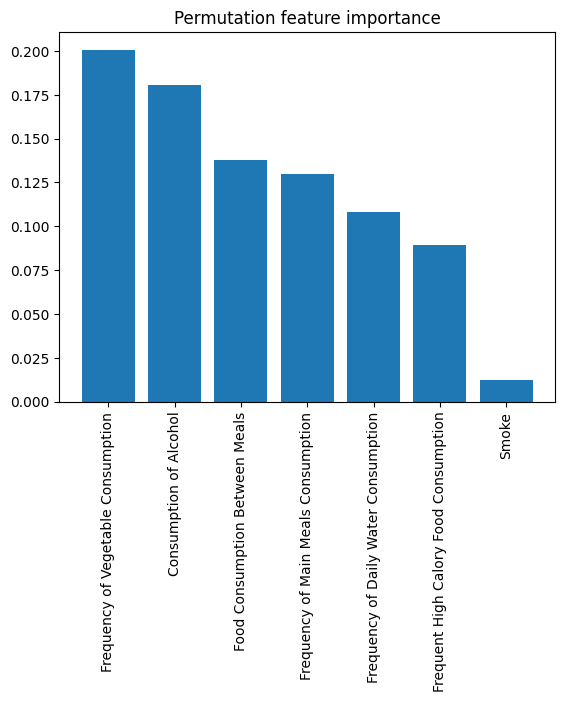

In [ ]:
idx = x_train_eh.columns
pimp = permutation_importance(random_forest_model, x_train_eh, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.5055821371610846
Test Precision Score:  0.49748424583603
Test Recall Score:  0.5055821371610846
Test F1 Score:  0.4768127793711211


                     precision    recall  f1-score   support

Insufficient_Weight       0.63      0.53      0.57        80
      Normal_Weight       0.48      0.31      0.37        85
     Obesity_Type_I       0.39      0.61      0.48       106
    Obesity_Type_II       0.55      0.61      0.57        89
   Obesity_Type_III       0.62      0.99      0.76        97
 Overweight_Level_I       0.29      0.18      0.22        83
Overweight_Level_II       0.53      0.22      0.31        87

           accuracy                           0.51       627
          macro avg       0.50      0.49      0.47       627
       weighted avg       0.50      0.51      0.48       627





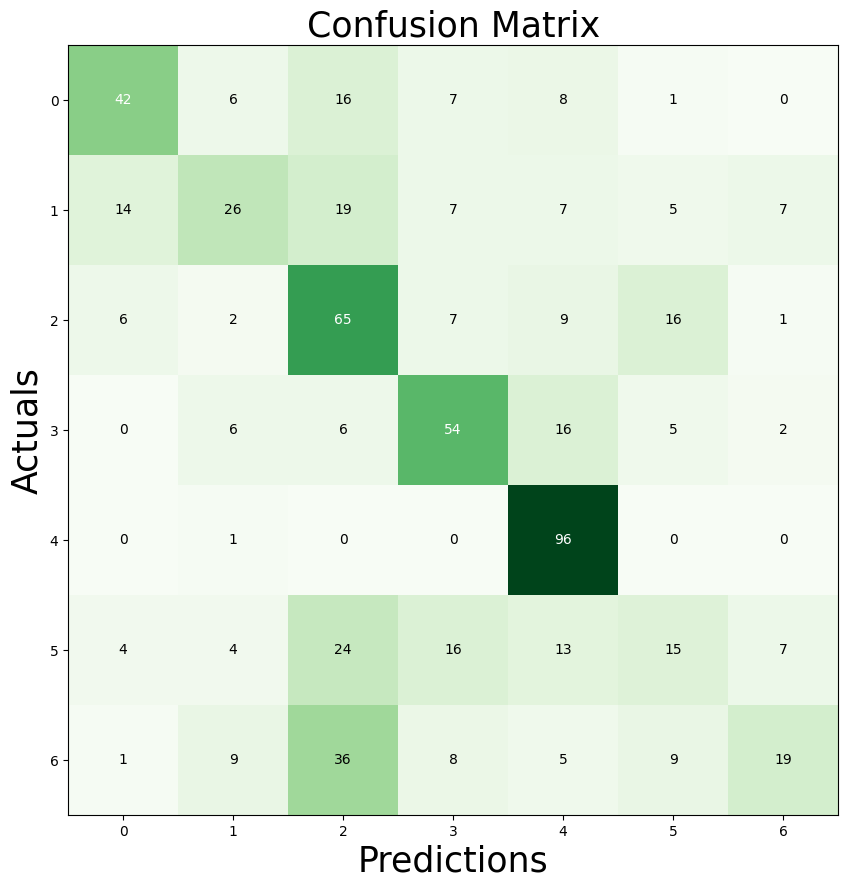

In [ ]:
#applying the best fitted hyperparameters (Support Vector Model)

svc_model = SVC(degree = 5, gamma = 'auto', kernel = 'poly')
svc_model.fit(x_train_eh, y_train.values.ravel())

#working on test data
svc_test_predict = svc_model.predict(x_test_eh)
svc_test_accuracy = accuracy_score(y_test, svc_test_predict)
svc_test_precision = precision_score(y_test, svc_test_predict, average = "weighted")
svc_test_recall = recall_score(y_test, svc_test_predict, average = "weighted")
svc_test_f1 = f1_score(y_test, svc_test_predict, average = "weighted")

print("Test Accuracy Score: ",svc_test_accuracy)
print("Test Precision Score: ",svc_test_precision)
print("Test Recall Score: ",svc_test_recall)
print("Test F1 Score: ",svc_test_f1)
print("\n")

print(classification_report(y_test, svc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = svc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

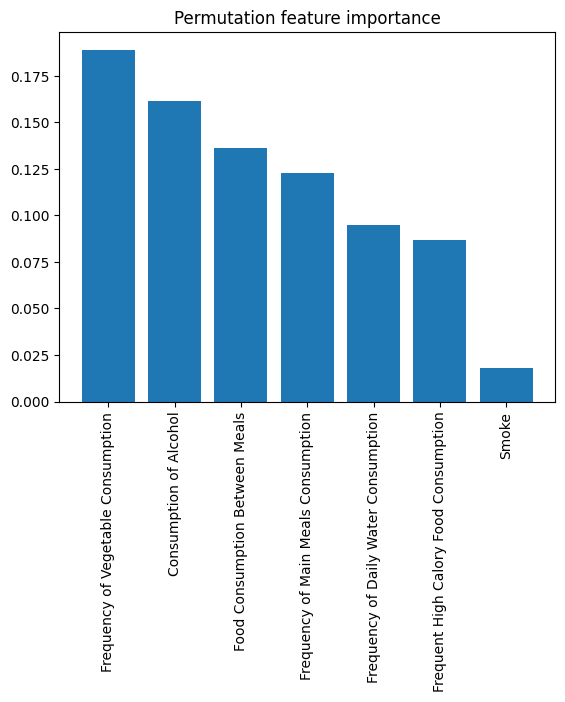

In [ ]:
idx = x_train_eh.columns
pimp = permutation_importance(svc_model, x_train_eh, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.41467304625199364
Test Precision Score:  0.4007623109878235
Test Recall Score:  0.41467304625199364
Test F1 Score:  0.3928158710047322


                     precision    recall  f1-score   support

Insufficient_Weight       0.44      0.47      0.46        80
      Normal_Weight       0.42      0.26      0.32        85
     Obesity_Type_I       0.37      0.32      0.34       106
    Obesity_Type_II       0.41      0.67      0.51        89
   Obesity_Type_III       0.58      0.77      0.66        97
 Overweight_Level_I       0.21      0.20      0.21        83
Overweight_Level_II       0.36      0.16      0.22        87

           accuracy                           0.41       627
          macro avg       0.40      0.41      0.39       627
       weighted avg       0.40      0.41      0.39       627





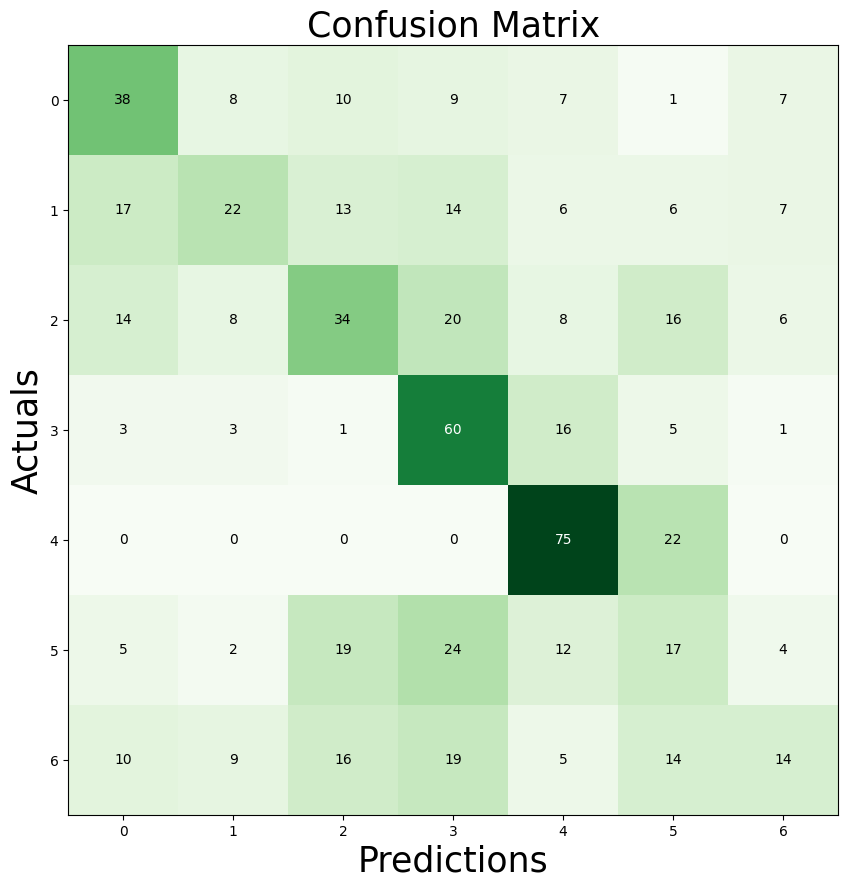

In [ ]:
#applying the best fitted hyperparameters (K Nearest Neighbour Model)

knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1, weights = 'uniform')
knn_model.fit(x_train_eh, y_train.values.ravel())

#working on test data
knn_test_predict = knn_model.predict(x_test_eh)
knn_test_accuracy = accuracy_score(y_test, knn_test_predict)
knn_test_precision = precision_score(y_test, knn_test_predict, average = "weighted")
knn_test_recall = recall_score(y_test, knn_test_predict, average = "weighted")
knn_test_f1 = f1_score(y_test, knn_test_predict, average = "weighted")

print("Test Accuracy Score: ",knn_test_accuracy)
print("Test Precision Score: ",knn_test_precision)
print("Test Recall Score: ",knn_test_recall)
print("Test F1 Score: ",knn_test_f1)
print("\n")

print(classification_report(y_test, knn_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = knn_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

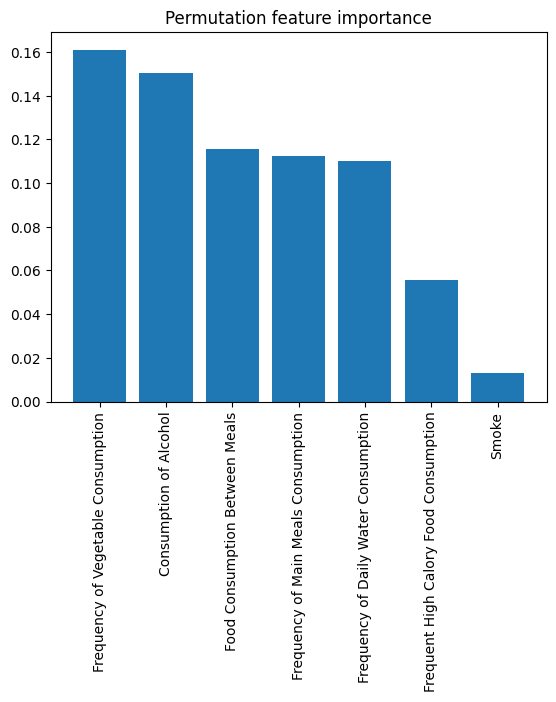

In [ ]:
idx = x_train_eh.columns
pimp = permutation_importance(knn_model, x_train_eh, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.5103668261562998
Test Precision Score:  0.5043581278828625
Test Recall Score:  0.5103668261562998
Test F1 Score:  0.48598111000395783


                     precision    recall  f1-score   support

Insufficient_Weight       0.63      0.54      0.58        80
      Normal_Weight       0.57      0.31      0.40        85
     Obesity_Type_I       0.39      0.55      0.45       106
    Obesity_Type_II       0.53      0.61      0.57        89
   Obesity_Type_III       0.61      1.00      0.75        97
 Overweight_Level_I       0.34      0.22      0.26        83
Overweight_Level_II       0.48      0.28      0.35        87

           accuracy                           0.51       627
          macro avg       0.51      0.50      0.48       627
       weighted avg       0.50      0.51      0.49       627





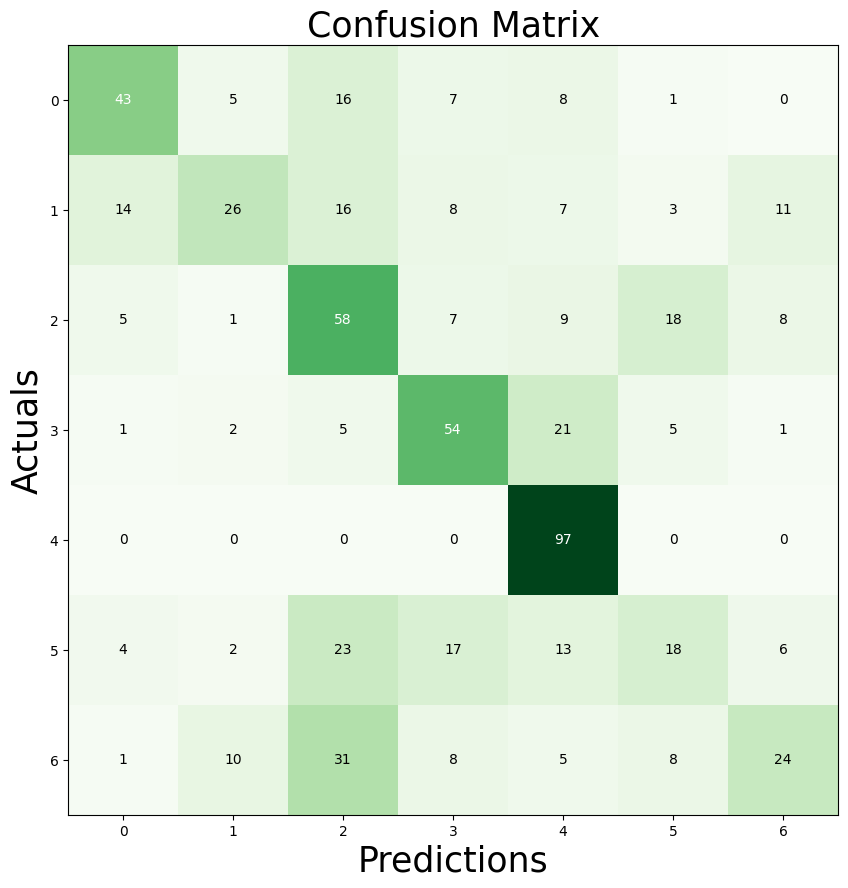

In [ ]:
#applying the best fitted hyperparameters (Ada Boost Model)

abc_model = AdaBoostClassifier(learning_rate = 0.01, n_estimators = 7, estimator = random_forest_model)
abc_model.fit(x_train_eh, y_train.values.ravel())

#working on test data
abc_test_predict = abc_model.predict(x_test_eh)
abc_test_accuracy = accuracy_score(y_test, abc_test_predict)
abc_test_precision = precision_score(y_test, abc_test_predict, average = "weighted")
abc_test_recall = recall_score(y_test, abc_test_predict, average = "weighted")
abc_test_f1 = f1_score(y_test, abc_test_predict, average = "weighted")

print("Test Accuracy Score: ",abc_test_accuracy)
print("Test Precision Score: ",abc_test_precision)
print("Test Recall Score: ",abc_test_recall)
print("Test F1 Score: ",abc_test_f1)
print("\n")

print(classification_report(y_test, abc_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = abc_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

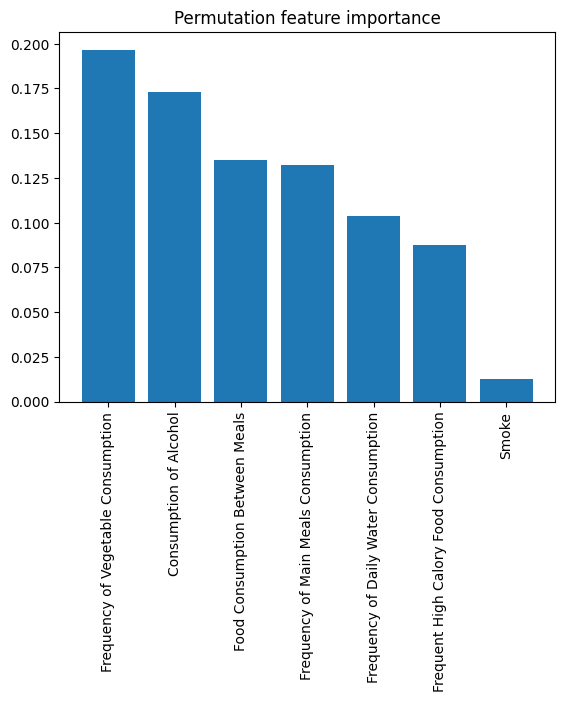

In [ ]:
idx = x_train_eh.columns
pimp = permutation_importance(abc_model, x_train_eh, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

Test Accuracy Score:  0.5103668261562998
Test Precision Score:  0.5024761443171618
Test Recall Score:  0.5103668261562998
Test F1 Score:  0.48930671411218957


                     precision    recall  f1-score   support

Insufficient_Weight       0.66      0.54      0.59        80
      Normal_Weight       0.48      0.31      0.37        85
     Obesity_Type_I       0.40      0.51      0.45       106
    Obesity_Type_II       0.52      0.62      0.56        89
   Obesity_Type_III       0.62      0.99      0.76        97
 Overweight_Level_I       0.33      0.25      0.29        83
Overweight_Level_II       0.52      0.29      0.37        87

           accuracy                           0.51       627
          macro avg       0.50      0.50      0.49       627
       weighted avg       0.50      0.51      0.49       627





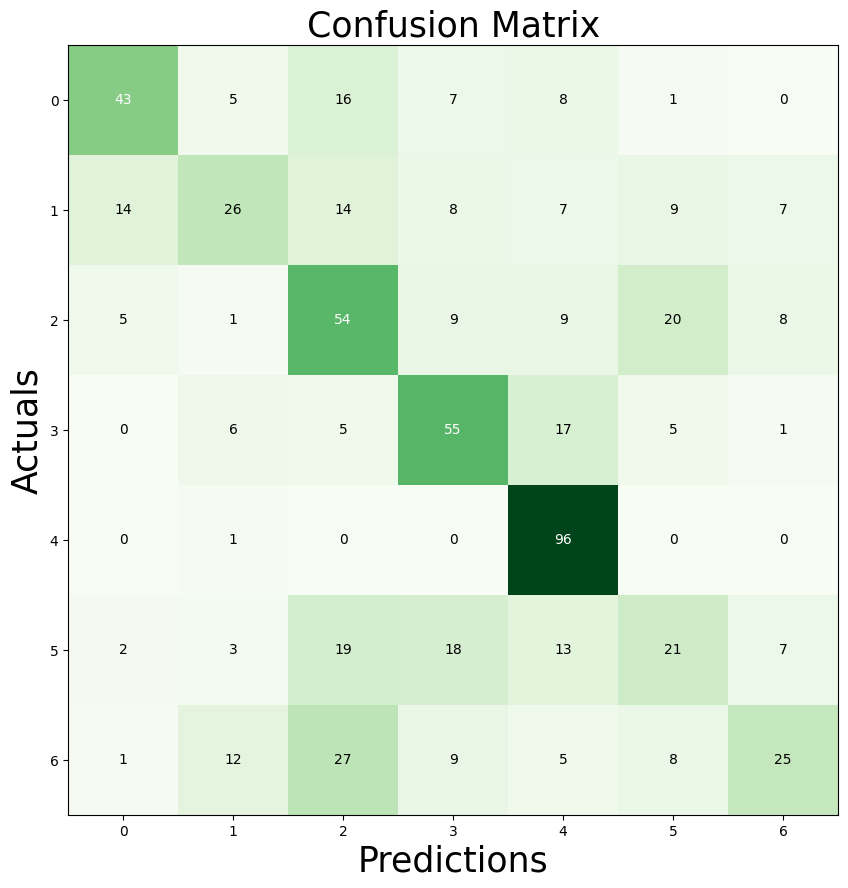

In [ ]:
#applying the best fitted hyperparameters (Gradient Model)

gb_model = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 6, n_estimators = 75)
gb_model.fit(x_train_eh, y_train.values.ravel())

#working on test data
gb_test_predict = gb_model.predict(x_test_eh)
gb_test_accuracy = accuracy_score(y_test, gb_test_predict)
gb_test_precision = precision_score(y_test, gb_test_predict, average = "weighted")
gb_test_recall = recall_score(y_test, gb_test_predict, average = "weighted")
gb_test_f1 = f1_score(y_test, gb_test_predict, average = "weighted")

print("Test Accuracy Score: ",gb_test_accuracy)
print("Test Precision Score: ",gb_test_precision)
print("Test Recall Score: ",gb_test_recall)
print("Test F1 Score: ",gb_test_f1)
print("\n")

print(classification_report(y_test, gb_test_predict, target_names = target_labels))
print("\n")

#confusion matrix for test cases
conf_matrix = confusion_matrix(y_true = y_test, y_pred = gb_test_predict)

fig, ax = plot_confusion_matrix(conf_mat = conf_matrix, figsize=(10, 10), cmap = plt.cm.Greens)
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Actuals', fontsize=25)
plt.title('Confusion Matrix', fontsize=25)
plt.show()

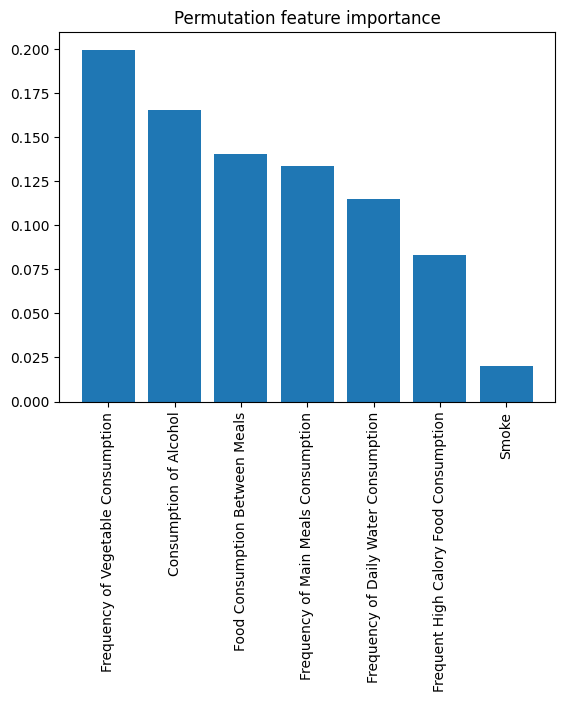

In [ ]:
idx = x_train_eh.columns
pimp = permutation_importance(gb_model, x_train_eh, y_train, n_repeats=10,random_state=0)
pimp_result = pd.DataFrame(pimp.importances_mean,index=idx,columns=['feature importance'])
pimp_result = pimp_result.sort_values('feature importance',ascending=False)



plt.bar(pimp_result.index,pimp_result['feature importance'])
plt.xticks(rotation='vertical')
plt.title('Permutation feature importance')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a list of tuples containing the model name and its accuracy scores
models_bar = [(model_names[0], accuracy_scores_dev[0]*100, accuracy_scores_test[0]*100),
          (model_names[1], accuracy_scores_dev[1]*100, accuracy_scores_test[1]*100),
          (model_names[2], accuracy_scores_dev[2]*100, accuracy_scores_test[2]*100),
          (model_names[3], accuracy_scores_dev[3]*100, accuracy_scores_test[3]*100)]

# Create lists for model names, training accuracies, and testing accuracies
model_names = [model[0] for model in models_bar]
training_accs = [model[1] for model in models_bar]
testing_accs = [model[2] for model in models_bar]

# Plot the accuracies
plt.figure(figsize=(10, 10))
plt.bar(model_names, training_accs, width=0.5, label='Development Accuracy')
plt.bar([name + ' (test)' for name in model_names], testing_accs, width=0.5, label='Testing Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()